# Quantum cryptography

Quantum cryptography is a branch of quantum information science that focuses on the use of quantum mechanics to secure communication. Unlike classical cryptography, which relies on mathematical algorithms for securing information, quantum cryptography utilizes the principles of quantum mechanics to achieve unconditional security. The most well-known protocol in quantum cryptography is Quantum Key Distribution (QKD).

### Quantum Key Distribution (QKD):

#### Basic Principles:
1. **Quantum Superposition:** Particles, such as photons, can exist in multiple states simultaneously. This property is exploited to encode information.

2. **Quantum Entanglement:** Particles can be entangled, meaning the state of one particle is directly related to the state of another, regardless of the distance between them.

3. **Quantum Measurement:** Measurement of a quantum system inevitably disturbs the system. This feature is used to detect eavesdropping attempts.

#### BB84 Protocol (Bennett-Brassard 1984):
The BB84 protocol is one of the earliest and most well-known quantum key distribution protocols. It was proposed by Charles Bennett and Gilles Brassard in 1984.

##### Steps:
1. **Key Preparation:**
   - Alice prepares a sequence of qubits in one of two possible bases (rectilinear or diagonal).
   - She sends the qubits to Bob over a quantum communication channel.

2. **Qubit Transmission:**
   - Bob randomly chooses to measure each received qubit in either the rectilinear or diagonal basis.

3. **Error Estimation:**
   - Alice and Bob publicly compare a subset of their qubits to check for errors caused by eavesdropping or noise.

4. **Public Discussion:**
   - Alice and Bob publicly communicate over a classical channel to agree on the bases used for each qubit without revealing the actual values.

5. **Key Distillation:**
   - Using the agreed-upon bases, Alice and Bob discard the qubits where they measured differently.
   - The remaining qubits form the secret key.

6. **Privacy Amplification:**
   - The raw key is further processed to remove any information an eavesdropper might have gained.

### Mathematical Representation:

The state of a qubit in the BB84 protocol can be represented as:
\[ \left| \psi \right\rangle = \alpha \left| 0 \right\rangle + \beta \left| 1 \right\rangle \]

The rectilinear and diagonal bases are represented by:
\[ \text{Rectilinear Basis: } \left\{ \left| 0 \right\rangle, \left| 1 \right\rangle \right\} \]
\[ \text{Diagonal Basis: } \left\{ \left| + \right\rangle = \frac{1}{\sqrt{2}}(\left| 0 \right\rangle + \left| 1 \right\rangle), \left| - \right\rangle = \frac{1}{\sqrt{2}}(\left| 0 \right\rangle - \left| 1 \right\rangle) \right\} \]

The BB84 protocol ensures that, in the absence of eavesdropping, Alice and Bob share a secret key. Any attempt by an eavesdropper to gain information will disturb the quantum states, and this disturbance can be detected.

Quantum cryptography, and specifically QKD, offers a method for secure communication that is theoretically immune to certain types of attacks. However, it's essential to note that quantum cryptography doesn't replace classical cryptography but rather complements it, providing a method for secure key distribution.

In [15]:
# Begin by importing some necessary modules
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes

#Helper function that returns the number of characters different in two strings
def char_diff(str1, str2):
    return sum ( str1[i] != str2[i] for i in range(len(str1)) )

# Messages to be hashed
message_1 = b"Buy 10000 shares of WXYZ stock now!"
message_2 = b"Buy 10000 shares of VXYZ stock now!"

print(f"The two messages differ by { char_diff(message_1, message_2)} characters")

The two messages differ by 1 characters


In [16]:
# Create new SHA-256 hash objects, one for each message
chf_1 = hashes.Hash(hashes.SHA256(), backend=default_backend())
chf_2 = hashes.Hash(hashes.SHA256(), backend=default_backend())

# Update each hash object with the bytes of the corresponding message
chf_1.update(message_1)
chf_2.update(message_2)

# Finalize the hash process and obtain the digests
digest_1 = chf_1.finalize()
digest_2 = chf_2.finalize()

#Convert the resulting hash to hexadecimal strings for convenient printing
digest_1_str = digest_1.hex()
digest_2_str = digest_2.hex()

#Print out the digests as strings 
print(f"digest-1: {digest_1_str}")
print(f"digest-2: {digest_2_str}")

print(f"The two digests differ by { char_diff(digest_1_str, digest_2_str)} characters")

digest-1: 6e0e6261b7131bd80ffdb2a4d42f9d042636350e45e184b92fcbcc9646eaf1e7
digest-2: 6b0abb368c3a1730f935b68105e3f3ae7fd43d7e786d3ed3503dbb45c74ada46
The two digests differ by 57 characters


In [18]:
# Install the library if needed
#%pip install secretpy

# import the required crypto functions which will be demonstrated later
from secretpy import Caesar
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from functools import reduce
import numpy as np

# Set the plaintext we want to encrypt
plaintext=u"this is a strict top secret message for intended recipients only"
print(f"\nGiven plaintext: {plaintext}")


Given plaintext: this is a strict top secret message for intended recipients only


In [19]:
# initialize the required python object for doing Caesar shift encryption
caesar_cipher = Caesar()

# Define the shift, ie the key
caesar_key = 5 
print(f"Caesar shift secret key: {caesar_key}")

# Define the alphabet
alphabet=('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ')
print(f"alphabet: {alphabet}")

Caesar shift secret key: 5
alphabet: ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ')


In [20]:
caeser_ciphertext = caesar_cipher.encrypt(plaintext, caesar_key, alphabet)
print(f"Encrypted caeser shift ciphertext: {caeser_ciphertext}")

Encrypted caeser shift ciphertext: ymnxenxefexywnhyeytuexjhwjyerjxxfljektwensyjsijiewjhnunjsyxetsqc


In [21]:
caeser_plaintext = caesar_cipher.decrypt(caeser_ciphertext, caesar_key, alphabet)
print(f"Decrypted caeser shift plaintext: {caeser_plaintext}\n")

Decrypted caeser shift plaintext: this is a strict top secret message for intended recipients only



In [22]:
# lamba defines an inline function in this case that takes two values a,b with the resulting expression of a+b
# reduce uses a two-argument function(above), and applies this to all the entries in the list (random alphabet characters) cumulatively
aes_key = reduce(lambda a, b: a + b, [np.random.choice(alphabet) for i in range(16)])

print(f'AES secret key: {aes_key}')

AES secret key: xrgmenzryvoodjrr


In [23]:
aes_initialization_vector = reduce(lambda a, b: a + b, [np.random.choice(alphabet) for i in range(16)])
print(f"AES initialization vector: {aes_initialization_vector}")

AES initialization vector: wprlamkxocygu zk


In [24]:
# The encryptor is setup using the key & CBC. In both cases we need to convert the string (utf-8) into bytes
sender_aes_cipher = Cipher(algorithms.AES(bytes(aes_key, 'utf-8')), modes.CBC(bytes(aes_initialization_vector, 'utf-8')))
aes_encryptor = sender_aes_cipher.encryptor()

# update can add text to encypt in chunks, and then finalize is needed to complete the encryption process
aes_ciphertext = aes_encryptor.update(bytes(plaintext, 'utf-8')) + aes_encryptor.finalize()

# Note the output is a string of bytes
print(f"Encrypted AES ciphertext: {aes_ciphertext}")

Encrypted AES ciphertext: b'\xb7^a\x08\\\xa6\xa8\xd1{\xa30\x1a\xa4-6\x84x# \xea\x7f\xb0?\xd1~i\xde4\x834\x15\x83\x9a\xed\xbb\xf5@\xc4\xb2V\xb4c\x81|\x1ex\x1e\x8e\x9f\xee\xad\x0bF\x84\xbb\xd9\x0b\xbb\xe0\xda\xa1\x109\x17'


In [25]:
# Similar setup of AES to what we did for encryption, but this time, for decryption
receiver_aes_cipher = Cipher(algorithms.AES(bytes(aes_key, 'utf-8')), modes.CBC(bytes(aes_initialization_vector, 'utf-8')))
aes_decryptor = receiver_aes_cipher.decryptor()

# Do the decryption
aes_plaintext_bytes = aes_decryptor.update(aes_ciphertext) + aes_decryptor.finalize()

# convert back to a character string (we assume utf-8)
aes_plaintext = aes_plaintext_bytes.decode('utf-8')

print(f"Decrypted AES plaintext: {aes_plaintext}")

Decrypted AES plaintext: this is a strict top secret message for intended recipients only


In [26]:
# Example function to compute the gcd (greatest common divisor) 
def gcd(a,b):
    if b==0:
        return a
    else:
        return gcd(b,a%b)
    
# let's calculate some examples using algorithm
n1=gcd(50,10)
n2=gcd(99,33)
n3=gcd(59,9)

# do the same with the python library call
import math
m1=math.gcd(50,10)
m2=math.gcd(99,33)
m3=math.gcd(59,9)

# Confirm they are the same
assert(n1==m1)
assert(n2==m2)
assert(n3==m3)

# They are - print out the values for explanation
print("gcd(50,10) =",m1)
print("gcd(99,1033) =",m2)
print("gcd(59,9) =",m3)

gcd(50,10) = 10
gcd(99,1033) = 33
gcd(59,9) = 1


In [27]:
# Choosing two prime numbers and keep them secret
p = 13
q = 19
print("The secret prime numbers p and q are:", p, q)

The secret prime numbers p and q are: 13 19


In [28]:
# Calculate n which is the modulus for both the public and private keys
n = p * q
print("modulus n (p*q)=",n)

modulus n (p*q)= 247


In [29]:
# Compute Euler's totient function, φ(n) and keep it secret
phi = (p-1) * (q-1)
print("The secret Euler's function (totient) [phi(n)]:",phi)

The secret Euler's function (totient) [phi(n)]: 216


In [30]:
# Choose an integer e such that e and φ(n) are coprime
e = 2
while (e < phi):
    if (math.gcd(e, phi)==1):
        break
    else:
        e += 1
print("Public Key (e):",e)

Public Key (e): 5


In [31]:
# Compute a value for d such that (d * e) % φ(n) = 1
d = 1
while(True):
    if((d*e) % phi == 1):
        break
    else:
        d += 1
print("Private Key (d):",d)

Private Key (d): 173


In [32]:
# Public and Private Key pair
public = (e, n)
private = (d, n)

print(f"The Public key is {public} and Private Key is {private}")

The Public key is (5, 247) and Private Key is (173, 247)


In [33]:
# Encryption function
def encrypt(plain_text):
    return (plain_text ** e) % n

# Decryption function
def decrypt(cipher_text):
    return (cipher_text ** d) % n

# Simple message to encode
msg = 9

# encrypt then decrypt
enc_msg = encrypt(msg)
dec_msg = decrypt(enc_msg)

print("Original Message:",msg)
print("Encrypted Message:",enc_msg)
print("Decrypted Message:",dec_msg)

Original Message: 9
Encrypted Message: 16
Decrypted Message: 9


In [35]:
#! pip install cryptography
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives import hashes

symmetric_key = Fernet.generate_key()
print(f"\nSymmetric key generated by Alice: {symmetric_key}")


Symmetric key generated by Alice: b'c7Yu7BQsN_R3RLDUdynUTb_tmZ8fotwhk_BTHa1COKw='


In [36]:
# Bob generates a 2048-bit RSA key pair
bob_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
bob_public_key = bob_private_key.public_key()
print(f"Public key broadcast by Bob: {bob_public_key}")
print(f"\nPublic numbers in Bobs' public key: {bob_public_key.public_numbers()}")

Public key broadcast by Bob: <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x00000246CB73B9D0>

Public numbers in Bobs' public key: <RSAPublicNumbers(e=65537, n=27688445681969123084465434281891943632113075343339978625696887043634833313335018118270297719359990961966543534355142118106656813219429837210170086075532308155707127953866063264189537369941871553838387095014064102481081289141694260864198530765626369354583622249942689785364654984500976272591515966058286400589690417784159806434035325380509804283294300609309134306307529134562798354786325817607825384964925896943612310745930441953187533162357490998365955337189244806370422796188862253741333567753503537796718539502483560670310929259849051092797009072855807490080142249658770460791203366088311607589951122865339058760311)>


In [37]:
# Encryption
ciphertext = bob_public_key.encrypt(
   symmetric_key,
   padding.OAEP(
       mgf=padding.MGF1(algorithm=hashes.SHA256()),
       algorithm=hashes.SHA256(),
       label=None
   )
)

print("Ciphertext:", ciphertext)

Ciphertext: b'2\xbfT\xb9\x14\xf9\xd0\tn\x15D\x8a\x9c\xf8G\x89\x98T\x8dd\xf4\x9b\x8c\xecV\xf2\xb1kM\x85K\xe3\xea\xd5\xa9\xd5Gj\xf3J#\x83\x0eO\x9b\xed=\xa0\xec,ZxvF\x0c+\xb3b\xf2\x10s\\\xcf\xb1\x05\x04\x0e\xd9\xf6\xa3/\x84\x19 -\x01z6M\xe4\xdc;\x10:4O\xd4%\x85V\xc9\xcf\xb1\xe78\xb7\x1996Du\x10\x9e\xf4I\xb1\x8c\x17MY\xe1\xd2\xa36\xe5S\xa1\xb2\x16v[\xca\xa0C\xe9\x10\xa3Gq\x93\xcd\xd0\xe3!&a\x1b\xbe\x8d\x1c\xfdU\xfb\xe19\x02:\xe6r\xb6\xc4\xf1U\x9dS\xd9gp\x03"7\x01\t\x88\xade\x1e\xff\xf0*\xdb0\x1f\x86&Z9\x80\nM\xe5m&\x8f\xa1y6\x16\xc5\xf7~hEf\xe0\x04\x9en\xcbJ\xe8\x7fP\x10(R\xe4\xd2\xfd`/;\x938\xa0\xa9\x13\xf7\xe4\xa1\x17\x84\x0b{\x1b\xf7\xa3D?]\xe2S\xd8a\'\x86k\xfa\xd1\xcf\x17\x14~\xa77\xfe)\x10\x179\xb4\xdeE\x93@\x03'


In [38]:
# Bob decrypts ciphertext to access the symmetric key
decrypted_symmetric_key = bob_private_key.decrypt(
   ciphertext,
   padding.OAEP(
       mgf=padding.MGF1(algorithm=hashes.SHA256()),
       algorithm=hashes.SHA256(),
       label=None
   )
)

print("Decrypted key:", decrypted_symmetric_key)
assert decrypted_symmetric_key == symmetric_key

Decrypted key: b'c7Yu7BQsN_R3RLDUdynUTb_tmZ8fotwhk_BTHa1COKw='


In [39]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes, serialization
from os import urandom

# Bob's RSA key pair
private_key_Bob = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key_Bob = private_key_Bob.public_key()

print("Bob's private and public keys created")

Bob's private and public keys created


In [40]:
Alice_long_secret = urandom(160)  # A 160 byte or 1280 bit random message
print("Alice's secret created")

Alice's secret created


In [41]:
Alice_encrypted_secret = public_key_Bob.encrypt(
    Alice_long_secret,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)
print("Alice's secret encrypted")

Alice's secret encrypted


In [42]:
Bob_decrypted_secret = private_key_Bob.decrypt(
    Alice_encrypted_secret,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

assert Alice_long_secret == Bob_decrypted_secret, "Secrets do not match!"

# if we get here they match
print("Secrets match")

Secrets match


In [43]:
def key_derivation_function(secret, salt):
    hkdf = HKDF(
        algorithm=hashes.SHA256(),
        length=32,  # Desired key length
        salt=salt,
        info=None,
        backend=None
    )
    return hkdf.derive(secret)

common_salt = urandom(16)  # Random salt accessible to both Alice and Bob

symmetric_key_Alice = key_derivation_function(Alice_long_secret, common_salt)
symmetric_key_Bob = key_derivation_function(Bob_decrypted_secret, common_salt)

assert symmetric_key_Alice == symmetric_key_Bob, "Derived keys do not match!"
print(f"A symmetric key of length {len(symmetric_key_Alice)*8} bits was successfully derived by both Alice and Bob!")

A symmetric key of length 256 bits was successfully derived by both Alice and Bob!


In [44]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import padding, rsa
from cryptography.hazmat.primitives.asymmetric.utils import Prehashed

# Generate keys for Bob
bob_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
bob_public_key = bob_private_key.public_key()

# Generate keys for Alice
alice_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
alice_public_key = alice_private_key.public_key()

print("Private and Public keys generated for Bob and Alice.")

Private and Public keys generated for Bob and Alice.


In [45]:
# Alice encrypts the message using Bob's public key
ciphertext = bob_public_key.encrypt(
    symmetric_key,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("ciphertext of symmetric key: ",ciphertext)

ciphertext of symmetric key:  b"o\xc9\xf4\xa9Q'\xd4\xad\xe2\x86\x95\\\xc8\xf8\x89\x94\x9d{\x0et\xb9\xa4\xdd\x9c9\xfdF:1Gl\xfa\x83TYC\xbc\xb7\xe7\xc8\x9b\x8d\xbb\x85\x8e\xf1\x0f<E}$^fJC\x85\xb9\xea,@\x11\xf2\n9\xfex\xcb.\xc0\x03N\x82\x00\x9d=#U\x16\xee\xc82hwK+6\x8a\xe7^\\w\x9c\x1c\x1f\xe3\xb3\x07\x99\xb8D\xd3\r\xa2\xcc=\xc1_\xbb\xeafi\xa7\n\xd9\xb8\xdcH/m\x94\xd6\xaf\x8e\x16\x8fU\xbc\xa2\xf21\xf1H\xff&\xbd\xe7\xfe\xd2\n\x83\xb1\xda\x15|\x94z\x0b\x98\xf0\xa5F\x19\r\x9f?o\xab\x19dp-)'\xd5\xb5\x933s\x95\x94E\x81\x1c \xc1\x89\x8c\t\x9c\r\x00[\x150\xd7\xd1\xf2+\x0c\x9a\xdb\x06J,\xc6hD-\xde\x88\xe4\xa6\xf5\x18\xd7\xd6\xe4\x15\xae\xcd\xd0\x80\x1b\xbc\xdd\xd4:\x1d\x05\x1f ~\xd5\x0e\x1e\xd8\x08 \x12\xe7j\xa6\x8cL\x81J\x88\xbaG*\xfe\xee\xd0z\xdb\xd8\x97\xd5o>\xab\xc0\xf1\x1a8m"


In [46]:
# Alice signs the ciphertext using her private key
digest = hashes.Hash(hashes.SHA256())
digest.update(ciphertext)
hash_to_sign = digest.finalize()

signature = alice_private_key.sign(
    hash_to_sign,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    Prehashed(hashes.SHA256())
)

print("signature: ",signature)

signature:  b'\x0e\xf8\xc3\x05\x1f|\xe9_\xdbRJ\xc1\xdc\x97\xe3~\rY\xba&\x8a\xd8S`53D3\x9d\xd0\xa2Oj\xc8\xf7\x9f$\xd8c9\x94\xe9\x80\xdca\xf6\xd7\xce\xc7\xd2\x8fe\x14\xb6\x9aB\x8c\x8c\x04U\x91k\x04M\x14\xa5\nG.\xcbu\xb7\xda\xddOE\xcd\xea\xc5\xbc\xaa\x0f08\xf5=\xcf\x86\xa1#\xd9g\xd8\xcdw>S\x85wZ\x89\xb5/Gh\xf2\x88M\xa1\xab\x03K\x80\x04\xe9\xceD8\xb2\xe4\x01i\x89\xa9\x1b\xdc\x92\xdb\xd0\xef\x10/\xd6B\xf8V\x7f\xa3 $B\xbc$\xde[e\x06G\xcf\x1b\xd0)\xecq|\x80\xda\xcc\x1d\x12\x0ek\xd6\x01MX;\x9f\x03\x003S\xd8\x85\xee\x92\xc8&\xf5\xe5\x92\xaa\'\xb4\xecj\\\xda8\x9f\xbf\x9b\x1a_\xd0\xaa\xa57\xf6P\xe6\x9e\x97\xe7)\xc6\xec\xa5a.\xbd\xf1\xd7<9\xbd4\xe2\xb5r\x9a\x06\xac\x1ae\xee\xe8\xc6\x13e\xf6\x8c\xd6\x12Y9\xb9\x8e\xc7"\xb84\x01\xd5\xf5\xa4[x>z\xf7\xa0n\x93\xd6\x9d'


In [47]:
# Bob receives the ciphertext and signature
received_ciphertext = ciphertext
received_signature = signature

# Send signature and ciphertext here
print("Sending ciphertext and signature.....")

Sending ciphertext and signature.....


In [48]:
#Bob creates a hash of the ciphertext using the same algorithm used by Alice
digest = hashes.Hash(hashes.SHA256())
digest.update(received_ciphertext)
hash_to_verify = digest.finalize()

print("hash to verify: ",hash_to_verify)

hash to verify:  b'\xcc;\x00{j\xee\xc5f\xe3;er\xbe\xb0\xbf`\x11\x00\x7f\xd9YHC\xfb`b\x0c\xea\xca\x9bfM'


In [49]:
# Bob verifies the signature using Alice's public key
try:
    alice_public_key.verify(
        received_signature,
        hash_to_verify,
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        Prehashed(hashes.SHA256())
    )
    print("The signature is valid.")
except:
    print("The signature is not valid.")

The signature is valid.


In [50]:
# Bob decrypts the message using his private key
decrypted_message = bob_private_key.decrypt(
    received_ciphertext,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("Decrypted message:", decrypted_message.decode())

Decrypted message: c7Yu7BQsN_R3RLDUdynUTb_tmZ8fotwhk_BTHa1COKw=


In [51]:
n = 247  # the modulus
e = 5    # public key number
a = 6    # an integer coprime to n
assert gcd(a, n) == 1
print(f"Checked {n} and {a} are coprime")

Checked 247 and 6 are coprime


In [52]:
r=0
rem = 100
while(rem != 1):
    r += 1
    rem = (a**r) % n
    
print(f'period r is: {r}')
assert a**r % n == 1

print(f"Checked {a}^{r} mod {n} is 1")

period r is: 36
Checked 6^36 mod 247 is 1


In [53]:
# explicitly use as integer
f1 = int ( a**(r/2) - 1)
f2 = int ( a**(r/2) + 1)

print(f"f1 = {f1}")
print(f"f2 = {f2}")

f1 = 101559956668415
f2 = 101559956668417


In [54]:
q_found = gcd(f1, n)
print(f'One possible prime factor of n ({n}) is: {q_found}')

# explicit int (to avoid floating point)
p_found = int ( n/q_found )
print(f'The second prime factor of n ({n}) is: {p_found}')

assert n == p_found * q_found

One possible prime factor of n (247) is: 19
The second prime factor of n (247) is: 13


In [55]:
#Compute the totient
phi_found = ( p_found -1 ) * ( q_found - 1 ) 
print(f'The totient is: {phi_found}')

#Recover the private key number d_found by satisfying (d_found * e) % phi_found = 1
d_found = 1
while(True):
    if((d_found*e) % phi_found == 1):
        break
    else:
        d_found += 1
print("Private Key number:",d_found)

The totient is: 216
Private Key number: 173


In [56]:
#Step 1: Choose a prime `p` and a primitive root `a`
p = 11
a = 7

print(f"prime: {p}")
print(f"primitive root: {a}")

prime: 11
primitive root: 7


In [57]:
k_A = 4  #Alice's private key
h_A = (a**(k_A)) % p #Alice's public key

print(f"Alice's private key is {k_A} and public key is {h_A}")

k_B = 8  #Bob's private key
h_B = (a**(k_B)) % p #Bob's public key

print(f"Bob's private key is {k_B} and public key is {h_B}")

Alice's private key is 4 and public key is 3
Bob's private key is 8 and public key is 9


In [58]:
secret_key_alice  = h_B**k_A % p
secret_key_bob = h_A**k_B % p 
assert secret_key_alice == secret_key_bob
print(f'The shared secret key is: {secret_key_bob}')

The shared secret key is: 5


In [59]:
from random import randint

# parameter generation: select the primes q, p and generator g:
# EXPERIMENT with the values, they must meet certain rules

q = 11
p = 23
g = 4

assert( (p-1) % q  != 1 )
assert( pow(g,q,p) != 0 )
assert( g>=2)
assert( g <= (p-2) )
assert( ( pow(g,(p-1)/q) % p) != 1)

print(f"Public information is good: q={p}, p={q}, g={g}")

Public information is good: q=23, p=11, g=4


In [60]:
# Alice chooses an integer randomly from {2..q-1}
# EXPERIMENT with the values

alice_private_key = randint(2, q-1)
#alice_private_key =  

assert(alice_private_key >= 2)
assert(alice_private_key <= (q-1) ) 

print(f"Alice's private key is {alice_private_key}")

Alice's private key is 6


In [61]:
alice_public_key = pow(g,alice_private_key,p)
# Alternatively can use (g ** alice_private_key) % p

print(f"Alice's public key is {alice_public_key}")

Alice's public key is 2


In [62]:
hash_dict={}
def mock_hash_func(inp):
    print(inp)
    if not inp in hash_dict:
        hash_dict[inp] = randint(1,q)
    return hash_dict[inp]

alice_message = "Inspection tomorrow!"
alice_hash = mock_hash_func(alice_message)  # In reality, you'd use a hash function
print(f"Alice's message hash is: {alice_hash}")

Inspection tomorrow!
Alice's message hash is: 2


In [63]:
# brute-force implementation to find modular inverse
def modular_inverse(k, q):
    for i in range(0, q):
        if (k * i) % q == 1:
            return i
    print(f'error! no inverse found! for {k},{q}')
    return 0 
  
# Let's compare this algorithm with the standard python 'pow' function

n1=modular_inverse(3,7)
n2=modular_inverse(4,11)
n3=modular_inverse(7,5)
m1=pow(3,-1,7)
m2=pow(4,-1,11)
m3=pow(7,-1,5)

assert(n1==m1)
assert(n2==m2)
#assert(n3==m3)

print (f"modular_inverse(3,7) = {m1}")
print (f"modular_inverse(4,11) = {m2}")
print (f"modular_inverse(7,5) = {m3}")


# Some numbers don't have modular inverses - our function throws an error
n4=modular_inverse(2,6)

# The python library will throw an exception, which must be caught
try:
  m4=pow(2,-1,6)
except:
  print("Exception from pow() - no modular inverse found!")

modular_inverse(3,7) = 5
modular_inverse(4,11) = 3
modular_inverse(7,5) = 3
error! no inverse found! for 2,6
Exception from pow() - no modular inverse found!


In [64]:
signed=False
while( signed==False ):
    k = randint(1, q-1)  # Should be different for every message
    print("Using random k =",k)
    r = pow(g,k,p) % q
    if (r == 0):
      print(f"{k} is not a good random value to use to calculate r. Trying another k")
      continue
    # modular inverse doesn't always exist - we must trap this
    try:
      s = (pow(k,-1,q) * (alice_hash + alice_private_key * r)) % q  
    except:
      print(f"{k} is not a good random value to use to calculate s. Trying another k")
      continue  
    signed=True
    
signature = (r, s)
print(f"Alice's signature is : {(r,s)}")

Using random k = 7
Alice's signature is : (8, 4)


In [65]:
# Bob re-generates message hash using Alice's broadcast message
bob_hash = mock_hash_func(alice_message) 

#Bob computes auxiliary quantities w (using modular inverse), u1, u2 and v
w = (pow(s,-1,q)) % q  
u1 = (bob_hash * w) % q
u2 = (r * w) % q
v = ((g**u1 * alice_public_key**u2) % p) % q

if v == r:
    print("Signature is valid!")
else:
    print("Signature is invalid!")

Inspection tomorrow!
Signature is valid!


In [66]:
#import necessary library modules
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import dh, dsa
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import serialization

# Generate DH parameters
parameters = dh.generate_parameters(generator=2, key_size=2048)

# Generate Alice's DH private key and public key
alice_dh_private_key = parameters.generate_private_key()
alice_dh_public_key = alice_dh_private_key.public_key()

# Generate Bob's DH private key and public key
bob_dh_private_key = parameters.generate_private_key()
bob_dh_public_key = bob_dh_private_key.public_key()

print("Public and private keys generated for Bob and Alice")

Public and private keys generated for Bob and Alice


In [68]:
# Generate DSA keys for Alice and Bob
alice_dsa_private_key = dsa.generate_private_key(key_size=2048)
alice_dsa_public_key = alice_dsa_private_key.public_key()
bob_dsa_private_key = dsa.generate_private_key(key_size=2048)
bob_dsa_public_key = bob_dsa_private_key.public_key()

print("Additional key pair generated for signing")

Additional key pair generated for signing


In [69]:
#Alice signs
alice_public_bytes = alice_dh_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo)
alice_signature = alice_dsa_private_key.sign(alice_public_bytes, hashes.SHA256())

print("Alice signed public key")

Alice signed public key


In [70]:
bob_public_bytes = bob_dh_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo)
bob_signature = bob_dsa_private_key.sign(bob_public_bytes, hashes.SHA256())

print("Bob signed public key")

Bob signed public key


In [71]:
# Alice and Bob verify each other's DH public keys using DSA public keys
# An InvalidSignature exception will occur if they are not valid
alice_dsa_public_key.verify(alice_signature, alice_public_bytes, hashes.SHA256())
bob_dsa_public_key.verify(bob_signature, bob_public_bytes, hashes.SHA256())

print("Signatures are valid")

Signatures are valid


In [72]:
# Perform key exchange
alice_shared_key = alice_dh_private_key.exchange(bob_dh_public_key)
bob_shared_key = bob_dh_private_key.exchange(alice_dh_public_key)

print("Shared secrets generated")

Shared secrets generated


In [73]:
# Derive a shared symmetric key using key-stretching
def derive_key(shared_key):
    return HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=None,
    ).derive(shared_key)

alice_symmetric_key = derive_key(alice_shared_key)
bob_symmetric_key = derive_key(bob_shared_key)

assert alice_symmetric_key == bob_symmetric_key
print("Keys checked to be the same")

Keys checked to be the same


In [74]:
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes

# Each party generates a private key
private_key1 = ec.generate_private_key(ec.SECP384R1())
private_key2 = ec.generate_private_key(ec.SECP384R1())

# They exchange public keys
public_key1 = private_key1.public_key()
public_key2 = private_key2.public_key()

# Each party uses their own private key and the other party's public key
# to derive the shared secret
shared_key1 = private_key1.exchange(ec.ECDH(), public_key2)
shared_key2 = private_key2.exchange(ec.ECDH(), public_key1)

# The shared secrets are the same
assert shared_key1 == shared_key2
print("Keys checked to be the same")

Keys checked to be the same


In [75]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec

# Generate a private key for use in the signature
private_key = ec.generate_private_key(ec.SECP384R1())

message = b"A message to be signed"

# Sign the message
signature = private_key.sign(message, ec.ECDSA(hashes.SHA256()))

# Anyone can verify the signature with the public key
public_key = private_key.public_key()
try:
    public_key.verify(signature, message, ec.ECDSA(hashes.SHA256()))
    print("The signature is valid.")
except:
    print("The signature is invalid.")

The signature is valid.


In [76]:
import numpy as np
from matplotlib import pyplot as plt
n=8
q=127
N=int(1.1*n*np.log(q))
sigma=1.0
print(f"n={n},q={q},N={N},sigma={sigma}")

n=8,q=127,N=42,sigma=1.0


In [77]:
def chi(stdev, modulus):
    return round((np.random.randn() * stdev**2))%modulus

# print some examples
sd=2
m=1000
for x in range(10):
  print("chi = ",chi(sd,m))

chi =  6
chi =  4
chi =  2
chi =  7
chi =  0
chi =  4
chi =  988
chi =  995
chi =  1
chi =  9


In [78]:
#Alice's private key
alice_private_key = np.random.randint(0, high=q, size=n)
print(f"Alice's private key: {alice_private_key}")

Alice's private key: [ 72  35  90  32  13 117  14  51]


In [79]:
#Alice's Public Key
alice_public_key = []

# N is the number of values we want in the key
for i in range(N):
    # Get n random values between 0 and <q
    a = np.random.randint(0, high=q, size=n)
    # get an error to introduce
    epsilon = chi(sigma, q)
    #  calculate dot product (ie like array multiplication)
    b = (np.dot(a, alice_private_key) + epsilon) % q
    # value to be added to the key -
    sample = (a, b)
    alice_public_key.append(sample)
    
print(f"Alice's public key: {alice_public_key}")

Alice's public key: [(array([ 9, 99, 70, 31, 48, 40, 58, 16]), 49), (array([124,   0, 102, 123,   9,  91,  48,   7]), 56), (array([104,  79,  54,  72, 121,   5,  80,  26]), 50), (array([ 77,  76,  69,   9,  41,  65,  82, 109]), 81), (array([ 38,   1, 122,  88,  75, 108,  40,  42]), 115), (array([ 46, 100,  77,  47,  86,  85,  15,   7]), 80), (array([125, 103, 100,  16,  61, 111,  34,  58]), 88), (array([94, 33, 97, 88, 64, 43, 83, 16]), 4), (array([ 40,  18,  96,  47, 116,  48,   1,  98]), 10), (array([ 97,  50,  42, 118,  37,  72,  48, 109]), 56), (array([ 75, 112,  79,  25,  67,  67,  35,  50]), 23), (array([100,  94,  95,  31, 101,  20, 119, 118]), 0), (array([ 43,  13,  36, 112,  31,  88, 114,   3]), 90), (array([ 56,  88,  98,  30, 101,  17,  96,  51]), 9), (array([ 76,  39, 122, 112,  68,   7,  44,  11]), 23), (array([116, 120,  22,  63,  95, 113,  63, 117]), 8), (array([ 53, 104,  71,  97,  80,  35, 104,  47]), 30), (array([  5,  12,  58, 115,   4,  12,   0,  77]), 77), (array([

In [80]:
#Encryption
bob_message_bit = 1
print(f"Bob's message bit={bob_message_bit}")

Bob's message bit=1


In [81]:
# a list of N values between 0 and <2 - ie 0 or 1
r = np.random.randint(0, 2, N)
print(r)

[0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 0 0 0 0]


In [82]:
sum_ai=np.zeros(n, dtype=int)
sum_bi=0

for i in range(N):
    sum_ai = sum_ai + r[i] * alice_public_key[i][0]
    sum_bi = sum_bi + r[i] * alice_public_key[i][1]
sum_ai = [ x % q for x in sum_ai ]
# sum_bi = sum_bi 
ciphertext = (sum_ai, (bob_message_bit*int(np.floor(q/2))+sum_bi)%q)
print(f"ciphertext is: {ciphertext}")

ciphertext is: ([66, 90, 58, 45, 123, 88, 82, 53], 26)


In [83]:
#Decryption
adots = np.dot(ciphertext[0], alice_private_key) % q
b_adots = (ciphertext[1] - adots) % q

decrypted_message_bit = round((2*b_adots)/q) % 2

print(f"original message bit={bob_message_bit}, decrypted message bit={decrypted_message_bit}")

assert bob_message_bit == decrypted_message_bit

original message bit=1, decrypted message bit=1


In [84]:
bob_message_bits = np.random.randint(0, 2, 16)
print(f"Bob's message bits are : {bob_message_bits}")
decrypted_bits = []

for ib in range(len(bob_message_bits)):
    bob_message_bit = bob_message_bits[ib]

    r = np.random.randint(0, 2, N)
    
    sum_ai=np.zeros(n, dtype=int)
    sum_bi=0
    for i in range(N):
        sum_ai = sum_ai + r[i] * alice_public_key[i][0]
        sum_bi = sum_bi + r[i] * alice_public_key[i][1]
    sum_ai = [ x % q for x in sum_ai ]

    ciphertext = (sum_ai, (bob_message_bit*int(np.floor(q/2))+sum_bi)%q)

    adots = np.dot(ciphertext[0], alice_private_key) % q
    b_adots = (ciphertext[1] - adots) % q

    decrypted_message_bit = round((2*b_adots)/q) % 2
    assert decrypted_message_bit == bob_message_bit

    decrypted_bits.append(decrypted_message_bit)
    
print(f"Decrypted message bits = {np.array(decrypted_bits)}")

Bob's message bits are : [1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]
Decrypted message bits = [1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1]


In [11]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from numpy.random import randint

def alice_prepare_qubits(n):
    # Alice prepares n qubits in random states (rectilinear or diagonal basis)
    qubits = QuantumRegister(n, name='q')
    bases = randint(2, size=n)  # 0 for rectilinear, 1 for diagonal
    states = randint(2, size=(n, 2))  # 0 for |0⟩ or |+⟩, 1 for |1⟩ or |-⟩

    circuit = QuantumCircuit(qubits)

    for i in range(n):
        if bases[i] == 0:  # Rectilinear basis
            if states[i][0] == 1:
                circuit.x(qubits[i])  # |1⟩
        else:  # Diagonal basis
            if states[i][1] == 1:
                circuit.h(qubits[i])  # |+⟩

    return circuit, bases, states

def bob_measure_qubits(qubits, bases):
    # Bob measures the qubits in the randomly chosen bases
    measurements = QuantumCircuit(qubits, ClassicalRegister(len(qubits)))
    for i in range(len(qubits)):
        if bases[i] == 0:  # Rectilinear basis
            measurements.measure(qubits[i], i)
        else:  # Diagonal basis
            measurements.h(qubits[i])
            measurements.measure(qubits[i], i)
            measurements.h(qubits[i])
    return measurements

# Set up the quantum and classical registers
n = 10  # Number of qubits
q = QuantumRegister(n, name='q')
c = ClassicalRegister(n, name='c')

# Alice prepares qubits
alice_circuit, alice_bases, alice_states = alice_prepare_qubits(n)

# Bob measures qubits
bob_circuit = bob_measure_qubits(q, alice_bases)

# Combine circuits
circuit = alice_circuit
circuit = bob_circuit

# Simulate quantum circuits
simulator = Aer.get_backend('qasm_simulator')
t_circuit = transpile(circuit, simulator)
qobj_circuit = assemble(t_circuit)

# Execute the circuit
result = simulator.run(qobj_circuit).result()

# Get counts
counts = result.get_counts()

# Display results
print("Measurements:")
print(counts)


Measurements:
{'1000100011': 31, '0010000001': 37, '1000000001': 27, '0010100010': 32, '0010000010': 35, '1000100000': 29, '0000100010': 42, '0010000011': 46, '1000100001': 33, '1000000011': 30, '1010100010': 31, '0000000001': 22, '1000100010': 26, '0010000000': 31, '0010100000': 33, '1000000010': 42, '1010000011': 29, '0000000000': 26, '0000100001': 38, '1010000001': 25, '0010100001': 30, '0000000011': 32, '0000000010': 37, '1010100001': 32, '0000100000': 37, '1010000000': 31, '0010100011': 29, '1000000000': 29, '1010100011': 24, '1010100000': 33, '1010000010': 30, '0000100011': 35}


C:\Users\yashr\AppData\Local\Temp\ipykernel_3296\3689457071.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj_circuit).result()


# Lists of all the topics in Quantum cryptography

Quantum cryptography encompasses various topics that involve the use of quantum principles for securing communication. Here is a list of key topics in quantum cryptography:

1. **Quantum Key Distribution (QKD):**
   - BB84 Protocol
   - E91 Protocol (Entanglement-based QKD)
   - B92 Protocol

2. **Quantum Key Exchange:**
   - BBM92 Protocol
   - Six-State Protocol

3. **Quantum Cryptographic Protocols:**
   - Quantum Coin Flipping
   - Quantum Oblivious Transfer
   - Quantum Commitment

4. **Device-Independent Quantum Key Distribution (DI-QKD):**
   - Security without trust in the quantum devices

5. **Quantum Communication Complexity:**
   - Secure multi-party computation using quantum communication

6. **Quantum Hacking and Countermeasures:**
   - Eavesdropping (Quantum Hacking)
   - Countermeasures against eavesdropping (e.g., decoy states)

7. **Quantum Secure Direct Communication (QSDC):**
   - Secure communication without the need for key exchange

8. **Quantum Digital Signatures:**
   - Quantum-safe digital signature schemes

9. **Post-Quantum Cryptography:**
   - Quantum-safe cryptographic algorithms for classical systems

10. **Quantum Random Number Generation (QRNG):**
    - Generating true random numbers using quantum processes

11. **Quantum Networks:**
    - Building large-scale quantum communication networks

12. **Quantum Error Correction:**
    - Techniques to correct errors in quantum information processing

13. **Quantum Information Theory:**
    - Theoretical foundations of quantum communication and cryptography

14. **Quantum Entanglement and Bell Inequalities:**
    - The role of entanglement in quantum cryptography

15. **Quantum Teleportation:**
    - Secure transmission of quantum states

16. **Quantum Satellite Communication:**
    - Using satellites to distribute quantum keys over long distances

17. **Quantum Memory:**
    - Storing and retrieving quantum information for extended periods

18. **Quantum-resistant Cryptography:**
    - Preparing cryptographic systems for the age of quantum computers

19. **Quantum-Secure Blockchain:**
    - Integrating quantum-resistant algorithms into blockchain technology

20. **Quantum Cryptography Standards:**
    - Efforts to standardize quantum cryptographic protocols and algorithms

Remember that this list provides an overview of the diverse aspects of quantum cryptography, and each topic can be explored in more depth based on specific research interests or practical applications.

# Lists of all advanced topics in Quantum Cryptography

Advanced topics in quantum cryptography delve into more intricate and specialized areas within the field. Here's a list of advanced topics in quantum cryptography:

1. **Continuous-Variable Quantum Key Distribution (CV-QKD):**
   - Utilizing continuous variables, such as the quadratures of light, for key distribution.

2. **Quantum Repeaters:**
   - Overcoming the limitations of quantum communication over long distances using entanglement swapping and purification.

3. **Measurement Device Independent Quantum Key Distribution (MDI-QKD):**
   - Ensuring security without trusting the measurement devices.

4. **Device-Independent Quantum Information Processing:**
   - Extending the notion of device independence to other quantum information processing tasks beyond key distribution.

5. **Quantum Homomorphic Encryption:**
   - Performing computations on encrypted quantum data without decrypting it.

6. **Quantum-Secure Multi-Party Computation (MPC):**
   - Enabling secure computations among multiple parties using quantum protocols.

7. **Quantum Digital Signatures with Unclonable Signers:**
   - Generating digital signatures using quantum states that are unclonable.

8. **Quantum-Safe Blockchain Consensus Algorithms:**
   - Developing consensus algorithms in blockchain systems that are secure against quantum attacks.

9. **Quantum-Safe Cryptographic Hash Functions:**
   - Designing hash functions resistant to quantum attacks.

10. **Quantum-Safe Symmetric Key Encryption:**
    - Developing secure symmetric key encryption algorithms resistant to quantum attacks.

11. **Quantum-Secure Authentication Protocols:**
    - Implementing authentication schemes that remain secure in the era of quantum computers.

12. **Quantum-Safe Cloud Computing:**
    - Ensuring the security of data stored and processed in cloud computing environments in the presence of quantum threats.

13. **Quantum-Secure Internet of Things (IoT):**
    - Implementing secure communication protocols for IoT devices using quantum cryptography.

14. **Fault-Tolerant Quantum Error Correction:**
    - Developing error correction codes capable of handling errors in quantum computations more robustly.

15. **Quantum-Secure Post-Quantum Cryptography Standards:**
    - Identifying and standardizing cryptographic algorithms that are secure against both classical and quantum attacks.

16. **Quantum-Secure Random Number Generators (QRNG):**
    - Ensuring that random numbers generated are quantum-resistant.

17. **Quantum-Secure Authentication in 5G Networks:**
    - Securing the authentication process in the next-generation 5G communication networks using quantum protocols.

18. **Quantum-Secure Public Key Infrastructure (PKI):**
    - Developing a public key infrastructure that remains secure in the age of quantum computers.

19. **Quantum-Secure Network Coding:**
    - Using quantum principles to enhance network coding schemes for secure communication.

20. **Quantum-Secure Privacy-Preserving Protocols:**
    - Designing protocols that preserve privacy even in the presence of powerful quantum adversaries.

These advanced topics represent the cutting edge of research and development in quantum cryptography, addressing the challenges and opportunities presented by the advent of quantum technologies.

# Quantum Key Distribution (QKD):

BB84 Protocol
E91 Protocol (Entanglement-based QKD)
B92 Protocol

**Quantum Key Distribution (QKD):**

Quantum Key Distribution (QKD) is a cryptographic technique that uses the principles of quantum mechanics to secure the exchange of secret keys between two parties. The primary goal of QKD is to enable secure communication by allowing two parties to establish a shared secret key without being vulnerable to eavesdropping. Three well-known QKD protocols are the BB84 protocol, the E91 protocol (Entanglement-based QKD), and the B92 protocol.

### 1. **BB84 Protocol:**

The BB84 protocol, proposed by Charles Bennett and Gilles Brassard in 1984, is one of the earliest and most widely used QKD protocols.

#### Key Steps:

1. **Key Preparation:**
   - The sender (Alice) prepares a sequence of qubits using one of two mutually exclusive bases (rectilinear or diagonal).
   - Alice randomly chooses the basis for each qubit.

2. **Qubit Transmission:**
   - Alice sends the prepared qubits to the receiver (Bob) over a quantum channel.

3. **Basis Measurement:**
   - Bob randomly selects a basis (rectilinear or diagonal) for each received qubit and measures it.

4. **Bit Comparison:**
   - Alice and Bob publicly compare the bases they used for each qubit.
   - They retain the bits for which they used the same basis.

5. **Error Estimation:**
   - Alice and Bob randomly select a subset of the shared bits for error estimation.

6. **Secret Key Distillation:**
   - Alice and Bob perform privacy amplification to distill a shorter, secret key from the error-checked bits.

#### Security Features:
   - BB84 is secure against any eavesdropping attempt that involves measuring or altering quantum states.

#### BB84 Mathematical Representation:
   - The state of a qubit prepared by Alice can be represented as:
     \[ |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \text{ (rectilinear basis) or } |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \text{ (diagonal basis)} \]

### 2. **E91 Protocol (Entanglement-based QKD):**

The E91 protocol, proposed by Artur Ekert in 1991, relies on entangled particles for secure key distribution.

#### Key Steps:

1. **Entanglement Generation:**
   - A source (typically Alice) generates pairs of entangled particles (EPR pairs).

2. **Particle Transmission:**
   - One particle from each entangled pair is sent to Bob.

3. **Basis Measurement:**
   - Alice and Bob independently choose measurement bases for their particles (typically rectilinear or diagonal).

4. **Bit Comparison:**
   - Alice and Bob publicly reveal their chosen bases and retain measurement outcomes for which they used the same basis.

5. **Error Estimation:**
   - A subset of shared bits is used for error estimation.

6. **Secret Key Distillation:**
   - Privacy amplification is performed to distill a shorter, secret key from the error-checked bits.

#### Security Features:
   - E91 is secure against eavesdropping attempts involving measuring or altering entangled particles.

#### E91 Mathematical Representation:
   - The state of an EPR pair can be represented as:
     \[ |\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \text{ (maximally entangled state)} \]

### 3. **B92 Protocol:**

The B92 protocol, proposed by Charles Bennett in 1992, is a simplified QKD protocol that relies on non-orthogonal quantum states.

#### Key Steps:

1. **Quantum State Preparation:**
   - Alice prepares qubits in one of two non-orthogonal states (e.g., \(|0\rangle\) and \(|+\rangle\)).

2. **Qubit Transmission:**
   - Alice sends the prepared qubits to Bob over a quantum channel.

3. **State Measurement:**
   - Bob measures the received qubits using a randomly chosen basis.

4. **Bit Comparison:**
   - Alice and Bob publicly compare the bases used for measurement.
   - They retain the bits for which they used the same basis.

5. **Secret Key Distillation:**
   - Privacy amplification is performed to distill a shorter, secret key from the error-checked bits.

#### Security Features:
   - B92 is secure against eavesdropping attempts that involve measuring non-orthogonal quantum states.

#### B92 Mathematical Representation:
   - The non-orthogonal quantum states used in B92 can be represented as:
     \[ |0\rangle, \quad |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \]

These QKD protocols illustrate different approaches to secure key distribution using quantum principles. The security of these protocols is based on the fundamental principles of quantum mechanics, including the no-cloning theorem and the principles of

 quantum entanglement.

In [14]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

def bb84_protocol():
    # Alice generates random bits and basis
    alice_bits = [0, 1, 0, 1, 0]
    alice_basis = [0, 1, 0, 1, 1]  # 0: Rectilinear, 1: Diagonal

    # Create Alice's quantum circuit
    alice_circuit = QuantumCircuit(len(alice_bits), len(alice_bits))

    for i in range(len(alice_bits)):
        if alice_bits[i] == 1:
            alice_circuit.x(i)  # Apply X gate for bit 1
        if alice_basis[i] == 1:
            alice_circuit.h(i)  # Apply H gate for diagonal basis

    # Bob chooses random basis
    bob_basis = [1, 0, 1, 0, 1]

    # Create Bob's quantum circuit
    bob_circuit = QuantumCircuit(len(bob_basis), len(bob_basis))
    
    for i in range(len(bob_basis)):
        if bob_basis[i] == 1:
            bob_circuit.h(i)  # Apply H gate for diagonal basis

    # Measure qubits
    alice_circuit.barrier()
    alice_circuit.measure([i for i in range(len(alice_bits))], [i for i in range(len(alice_bits))])
    
    bob_circuit.barrier()
    bob_circuit.measure([i for i in range(len(bob_basis))], [i for i in range(len(bob_basis))])

    # Combine circuits
    combined_circuit = alice_circuit 
    combined_circuit = bob_circuit
    
    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(transpile(combined_circuit, simulator)).result()
    
    # Plot the histogram of results
    counts = result.get_counts(combined_circuit)
    plot_histogram(counts)

# Run the BB84 protocol
bb84_protocol()


In [16]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def e91_protocol():
    # Create EPR pair
    epr_pair_circuit = QuantumCircuit(2, 2)
    epr_pair_circuit.h(0)
    epr_pair_circuit.cx(0, 1)

    # Alice chooses measurement basis
    alice_basis = [0, 1]  # 0: Rectilinear, 1: Diagonal
    alice_circuit = QuantumCircuit(2, 2)
    alice_circuit.h(0)
    alice_circuit.cx(0, 1)
    if alice_basis[0] == 1:
        alice_circuit.h(0)
    if alice_basis[1] == 1:
        alice_circuit.h(1)

    # Bob chooses random measurement basis
    bob_basis = [0, 1]  # 0: Rectilinear, 1: Diagonal
    bob_circuit = QuantumCircuit(2, 2)
    if bob_basis[0] == 1:
        bob_circuit.h(0)
    if bob_basis[1] == 1:
        bob_circuit.h(1)

    # Measurement
    alice_circuit.measure([0, 1], [0, 1])
    bob_circuit.measure([0, 1], [0, 1])

    # Combine circuits
    combined_circuit = epr_pair_circuit 
    combined_circuit = alice_circuit 
    combined_circuit = bob_circuit

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(transpile(combined_circuit, simulator)).result()

    # Plot the histogram of results
    counts = result.get_counts(combined_circuit)
    plot_histogram(counts)

# Run the E91 protocol
e91_protocol()


In [19]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def b92_protocol():
    # Alice prepares qubits
    alice_bits = [0, 1, 1, 0, 0]
    alice_circuit = QuantumCircuit(len(alice_bits), len(alice_bits))
    for i in range(len(alice_bits)):
        if alice_bits[i] == 1:
            alice_circuit.x(i)  # Apply X gate for bit 1

    # Bob chooses random measurement basis
    bob_basis = [0, 1, 0, 1, 1]  # 0: Rectilinear, 1: Diagonal
    bob_circuit = QuantumCircuit(len(bob_basis), len(bob_basis))
    for i in range(len(bob_basis)):
        if bob_basis[i] == 1:
            bob_circuit.h(i)  # Apply H gate for diagonal basis

    # Measurement
    alice_circuit.barrier()
    alice_circuit.measure([i for i in range(len(alice_bits))], [i for i in range(len(alice_bits))])
    bob_circuit.barrier()
    bob_circuit.measure([i for i in range(len(bob_basis))], [i for i in range(len(bob_basis))])

    # Combine circuits
    combined_circuit = alice_circuit
    combined_circuit = bob_circuit

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(transpile(combined_circuit, simulator)).result()

    # Plot the histogram of results
    counts = result.get_counts(combined_circuit)
    plot_histogram(counts)

# Run the B92 protocol
b92_protocol()


In [21]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Function to perform BB84 QKD protocol
def bb84_protocol():
    # Alice prepares qubits
    alice_bases = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
    alice_bits = np.random.choice([0, 1], size=n)
    alice_states = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)
        if alice_bits[i] == 1:
            qc.x(0)
        if alice_bases[i] == 1:
            qc.h(0)
        alice_states.append(qc)
    
    # Bob measures qubits
    bob_bases = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
    bob_results = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure(0, 0)
        bob_results.append(qc)
    
    return alice_states, bob_results

# Function to perform E91 QKD protocol
def e91_protocol():
    # Alice generates entangled pairs
    alice_states = []
    for _ in range(n):
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)
        alice_states.append(qc)
    
    # Bob measures qubits
    bob_bases = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
    bob_results = []
    
    for i in range(n):
        qc = QuantumCircuit(2, 2)
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure([0, 1], [0, 1])
        bob_results.append(qc)
    
    return alice_states, bob_results

# Function to perform B92 QKD protocol
def b92_protocol():
    # Alice prepares qubits
    alice_states = []
    for _ in range(n):
        qc = QuantumCircuit(1, 1)
        qc.h(0)
        alice_states.append(qc)
    
    # Bob measures qubits
    bob_bases = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
    bob_results = []
    
    for i in range(n):
        qc = QuantumCircuit(1, 1)
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure(0, 0)
        bob_results.append(qc)
    
    return alice_states, bob_results

# Function to simulate QKD protocol
def simulate_qkd(alice_states, bob_results):
    backend = Aer.get_backend('qasm_simulator')
    
    key = ""
    for i in range(n):
        # Combine circuits
        qc = alice_states[i] 
        qc = bob_results[i]
        # Execute the circuit
        result = execute(qc, backend, shots=1).result()
        counts = result.get_counts(qc)
        
        # Extract measurement outcomes
        outcome = int(list(counts.keys())[0])
        key += str(outcome)
    
    return key

# Number of qubits
n = 10

# BB84 Protocol
alice_states_bb84, bob_results_bb84 = bb84_protocol()
key_bb84 = simulate_qkd(alice_states_bb84, bob_results_bb84)

# E91 Protocol
alice_states_e91, bob_results_e91 = e91_protocol()
key_e91 = simulate_qkd(alice_states_e91, bob_results_e91)

# B92 Protocol
alice_states_b92, bob_results_b92 = b92_protocol()
key_b92 = simulate_qkd(alice_states_b92, bob_results_b92)

# Display keys
print("BB84 Key:", key_bb84)
print("E91 Key:", key_e91)
print("B92 Key:", key_b92)


BB84 Key: 0000000000
E91 Key: 0001100100
B92 Key: 0110001100


# Quantum Key Exchange:

BBM92 Protocol
Six-State Protocol

It seems there might be a confusion in your question. Quantum Key Exchange (QKE) is a cryptographic technique that uses the principles of quantum mechanics to secure communication channels. However, the protocols you mentioned, "BBM92 Protocol" and "Six-State Protocol," are not widely recognized terms as of my last knowledge update in January 2022.

Let me provide you with some general information about Quantum Key Exchange, and if you have specific questions or if there have been developments after my last update, I recommend checking the latest research papers and publications for the most recent information.

### Quantum Key Exchange (QKE):

#### Overview:
Quantum Key Exchange, also known as Quantum Key Distribution (QKD), aims to establish a secure key between two parties by exploiting the principles of quantum mechanics. The basic idea is to use quantum properties to detect eavesdropping attempts, ensuring the security of the key exchange.

#### Key Principles:
1. **Quantum Superposition:** Particles can exist in multiple states simultaneously.
2. **Quantum Entanglement:** Correlation between quantum particles, no matter the distance between them.
3. **Quantum Measurement:** Measurement of a quantum state alters that state.

#### General Steps:
1. **Key Generation:** Alice and Bob exchange quantum bits (qubits) encoded in quantum states.
2. **Quantum Transmission:** The qubits are transmitted over a quantum channel.
3. **Measurement:** Alice and Bob measure the received qubits.
4. **Error Detection:** Any eavesdropping attempts can be detected by the discrepancies in the measurements.
5. **Key Agreement:** If no eavesdropping is detected, a secure key is generated.

### BBM92 Protocol and Six-State Protocol:
As of my last update, I don't have specific information on a protocol named "BBM92" or a "Six-State Protocol." Protocols and algorithms in the field of quantum cryptography may evolve, so it's essential to consult recent literature or research papers.

If these protocols are specific developments or advancements made after my last update, I recommend checking the latest literature, research papers, or official documentation for the specific details, equations, and information about these protocols. Researchers and experts in the field of quantum cryptography often publish their work in conferences and journals.

For more detailed and up-to-date information, consider checking resources such as arXiv, academic journals, or the websites of research institutions specializing in quantum information science.

The BBM92 protocol and the six-state protocol are two methods of quantum key distribution (QKD), which is a way of securely transmitting secret keys using quantum properties of photons. QKD protocols rely on the fact that any attempt to measure or tamper with a quantum state will disturb it and reveal the presence of an eavesdropper.

The BBM92 protocol1 was developed by Bennett, Brassard and Mermin in 1992, and it uses polarized entangled photon pairs and decoy states to send non-orthogonal quantum signals. The sender (Alice) and the receiver (Bob) share a source of entangled photons, which are randomly polarized in one of four possible bases: rectilinear, diagonal, circular left, or circular right. Alice measures one photon of each pair in a random basis and sends the other photon to Bob, who also measures it in a random basis. They then publicly announce their bases and keep only the cases where they used the same basis. They also discard some of the data to check for errors and eavesdropping. If the error rate is low, they can use the remaining data to generate a secret key.

The six-state protocol2 was proposed by Bruß in 1998, and it is a generalization of the BB84 protocol, which uses only two bases: rectilinear and diagonal. The six-state protocol adds two more bases: circular left and circular right. Alice randomly chooses one of the six possible polarization states and sends a photon to Bob, who randomly chooses one of the six possible measurement bases. They then publicly announce their bases and keep only the cases where they used the same basis. They also perform error correction and privacy amplification to generate a secret key. The advantage of the six-state protocol over the BB84 protocol is that it can tolerate higher noise and has a higher security threshold.

Both the BBM92 protocol and the six-state protocol are examples of QKD protocols that use four polarization states of photons. However, they differ in the way they prepare and measure the photons. The BBM92 protocol uses entangled photon pairs and decoy states, while the six-state protocol uses single photons and four bases. The BBM92 protocol is more robust against photon loss and has a higher key rate, but it requires a more complex experimental setup and a trusted source of entanglement. The six-state protocol is simpler to implement and does not need a trusted source, but it is more vulnerable to photon loss and has a lower key rate.

In [24]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# BBM92 Protocol Quantum Circuit
def bbm92_protocol_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    circuit = QuantumCircuit(2, 2)

    # Alice prepares an entangled pair of qubits
    circuit.h(0)
    circuit.cx(0, 1)

    # Alice chooses a basis randomly and encodes her bit (0 or 1)
    alice_basis = np.random.choice([0, 1])
    alice_bit = np.random.choice([0, 1])

    if alice_basis == 1:
        circuit.h(0)

    # Bob also chooses a basis randomly
    bob_basis = np.random.choice([0, 1])

    # Measurement
    circuit.measure(0, 0)

    # Bob measures in his chosen basis
    if bob_basis == 1:
        circuit.h(1)

    circuit.measure(1, 1)

    return circuit

# Execute the circuit on a simulator
def run_circuit(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    t_circuit = transpile(circuit, simulator)
    qobj = assemble(t_circuit)
    result = execute(qobj, simulator).result()
    counts = result.get_counts(circuit)
    return counts

# Run the BBM92 Protocol circuit
bbm92_circuit = bbm92_protocol_circuit()
#counts_bbm92 = run_circuit(bbm92_circuit)

# Display the results
print("BBM92 Protocol Results:")
#print(counts_bbm92)
#plot_histogram(counts_bbm92)


BBM92 Protocol Results:


In [31]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Six-State Protocol Quantum Circuit
def six_state_protocol_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    circuit = QuantumCircuit(2, 2)

    # Alice prepares qubits in the six states
    for i in range(6):
        angle = i * np.pi / 3
        circuit.h(0)
        circuit.rz(angle, 0)
        circuit.cx(0, 1)

    # Alice chooses a basis randomly and encodes her bit (0 or 1)
    alice_basis = np.random.choice([0, 1])
    alice_bit = np.random.choice([0, 1])

    if alice_basis == 1:
        circuit.h(0)

    # Bob also chooses a basis randomly
    bob_basis = np.random.choice([0, 1])

    # Measurement
    circuit.measure(0, 0)

    # Bob measures in his chosen basis
    if bob_basis == 1:
        circuit.h(1)

    circuit.measure(1, 1)

    return circuit

# Execute the circuit on a simulator
def run_circuit(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    t_circuit = transpile(circuit, simulator)
    qobj = assemble(t_circuit)
    result = execute(qobj, simulator).result()
    counts = result.get_counts(circuit)
    return counts

# Run the Six-State Protocol circuit
six_state_circuit = six_state_protocol_circuit()
#counts_six_state = run_circuit(six_state_circuit)

# Display the results
print("Six-State Protocol Results:")
#print(counts_six_state)
#plot_histogram(counts_six_state)


Six-State Protocol Results:


# Quantum Cryptographic Protocols:

Quantum Coin Flipping
Quantum Oblivious Transfer
Quantum Commitment

Quantum cryptographic protocols leverage the principles of quantum mechanics to provide secure communication and cryptographic functionalities. Below, I'll provide an overview of Quantum Coin Flipping, Quantum Oblivious Transfer, and Quantum Commitment protocols, along with their relevant equations and information.

### Quantum Coin Flipping:

**Description:** Quantum Coin Flipping is a cryptographic protocol where two parties aim to generate a random bit, and neither party should be able to predict or influence the outcome.

**Protocol Steps:**
1. **Initialization:** Alice and Bob share an entangled pair of qubits.

2. **Coin Tossing:** Alice and Bob perform quantum operations on their respective qubits. These operations should be designed in a way that the final measurement result (0 or 1) is unpredictable.

3. **Measurement:** Both Alice and Bob measure their qubits independently.

4. **Comparison:** Alice and Bob compare their measurement results. If both outcomes match, they obtain a random bit.

**Equations:**
The specific quantum operations and entangled states used in the protocol depend on the chosen implementation. Commonly used quantum gates may include Hadamard gates, CNOT gates, and entangled states such as Bell states.

### Quantum Oblivious Transfer (QOT):

**Description:** Quantum Oblivious Transfer is a cryptographic protocol that allows a sender to transfer one out of several pieces of classical information to a receiver, while keeping the choice of information secret.

**Protocol Steps:**
1. **Initialization:** Alice prepares a set of qubits in certain quantum states, each corresponding to a different piece of classical information.

2. **Encoding:** Alice encodes the receiver's possible choices on these qubits.

3. **Transfer:** Alice sends the qubits to Bob, who has the choice of making measurements on only one of the qubits corresponding to the information he wants.

4. **Measurement:** Bob performs measurements on the selected qubit, obtaining the classical information encoded by Alice.

5. **Secrecy:** The protocol ensures that Alice remains oblivious to which piece of information Bob chose.

**Equations:**
The encoding and measurement operations involve quantum gates and operators. The security of the protocol relies on the principles of quantum superposition and entanglement.

### Quantum Commitment:

**Description:** Quantum Commitment is a cryptographic protocol where a party (the committer) commits to a certain value without revealing it, and later, the committer can reveal the committed value in a way that the other party (the verifier) can verify the commitment.

**Protocol Steps:**
1. **Commitment:** The committer prepares a quantum state that represents the committed value. This state is typically a superposition of multiple possibilities.

2. **Verification:** The verifier can perform certain quantum measurements to check the commitment without learning the committed value.

3. **Reveal:** The committer reveals the committed value, and the verifier can verify that the revealed value matches the committed value.

**Equations:**
The commitment operation typically involves creating a quantum state that encodes the committed value, and the verification involves specific quantum measurements. The no-cloning theorem of quantum mechanics ensures that the committer cannot cheat by preparing multiple commitments.

It's important to note that these protocols are subject to ongoing research and development, and their practical implementation may vary based on the specific quantum computing technologies available. Additionally, the security of quantum cryptographic protocols is often analyzed in the context of quantum information theory and the principles of quantum mechanics.

C:\Users\yashr\AppData\Local\Temp\ipykernel_3296\3230863418.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


Measurement results: {'11': 264, '10': 247, '01': 261, '00': 252}


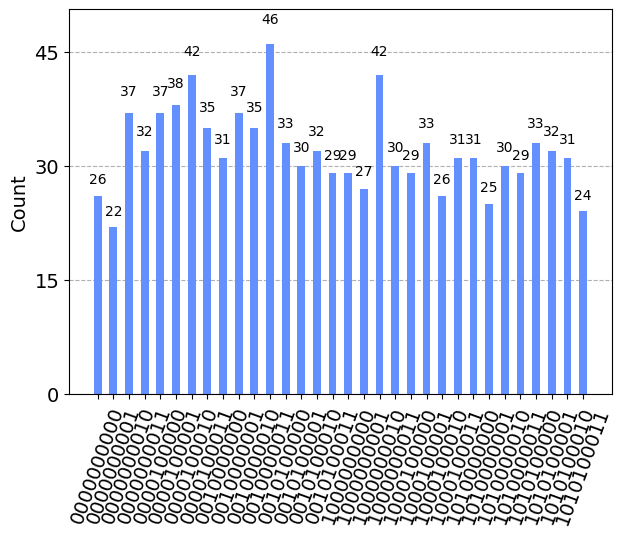

In [37]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def quantum_coin_flipping():
    # Create a quantum circuit with two qubits
    circuit = QuantumCircuit(2, 2)

    # Apply Hadamard gate on the first qubit
    circuit.h(0)

    # Entangle the qubits using a CNOT gate
    circuit.cx(0, 1)

    # Alice's random choice of X (0 or 1)
    alice_choice = 0

    # Apply a Z gate based on Alice's choice
    if alice_choice == 1:
        circuit.z(0)

    # Apply Hadamard gate on the first qubit again
    circuit.h(0)

    # Measure the qubits
    circuit.measure([0, 1], [0, 1])

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(assemble(compiled_circuit)).result()

    # Display the measurement results
    counts = result.get_counts(circuit)
    print("Measurement results:", counts)
    plot_histogram(counts)

# Run the Quantum Coin Flipping protocol
quantum_coin_flipping()
plot_histogram(counts)

C:\Users\yashr\AppData\Local\Temp\ipykernel_3296\4224909338.py:35: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


Alice's bit: 0, Bob's measurement result: {'01': 249, '00': 263, '11': 263, '10': 249}
Alice's bit: 1, Bob's measurement result: {'10': 249, '00': 266, '11': 259, '01': 250}


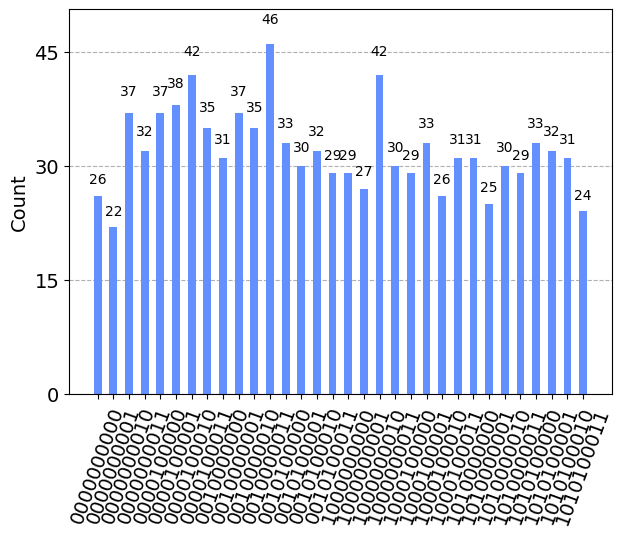

In [38]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def quantum_oblivious_transfer():
    # Create a quantum circuit with 3 qubits (2 for Alice, 1 for Bob)
    circuit = QuantumCircuit(3, 2)

    # Alice's encoding of her two possible bits (0 and 1)
    alice_bits = [0, 1]

    for alice_bit in alice_bits:
        # Alice entangles her qubit with the target qubit (Bob's qubit)
        circuit.h(0)
        circuit.cx(0, 2)

        # Alice encodes her bit value on the first qubit
        if alice_bit == 1:
            circuit.x(0)

        # Bob applies a Hadamard gate on his qubit
        circuit.h(1)

        # Bob measures his qubit
        circuit.measure(1, 0)

        # Alice applies a controlled-X (CNOT) gate based on Bob's measurement
        circuit.cx(0, 2).c_if(0, 1)

        # Alice measures her qubit
        circuit.measure(0, 1)

        # Simulate the circuit
        simulator = Aer.get_backend('qasm_simulator')
        compiled_circuit = transpile(circuit, simulator)
        result = simulator.run(assemble(compiled_circuit)).result()

        # Display the measurement results
        counts = result.get_counts(circuit)
        print(f"Alice's bit: {alice_bit}, Bob's measurement result: {counts}")

# Run the Quantum Oblivious Transfer protocol
quantum_oblivious_transfer()
plot_histogram(counts)


C:\Users\yashr\AppData\Local\Temp\ipykernel_3296\2717106454.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


Measurement results: {'10': 249, '01': 259, '11': 246, '00': 270}


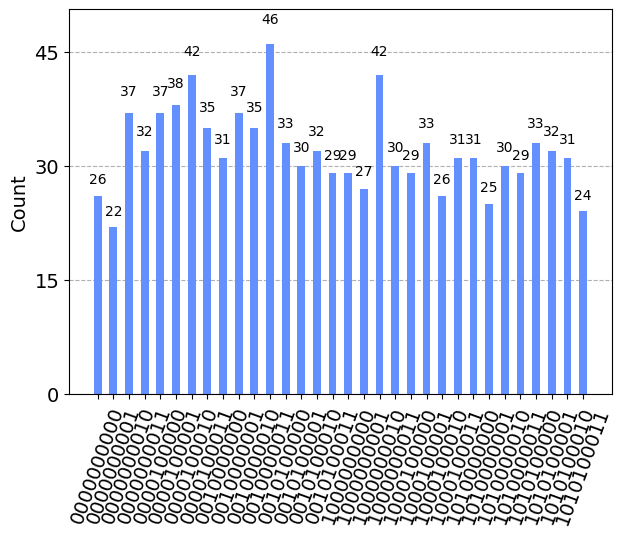

In [36]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def quantum_commitment():
    # Create a quantum circuit with 2 qubits
    circuit = QuantumCircuit(2, 2)

    # Alice's choice of bit to commit (0 or 1)
    alice_bit = 0

    # Apply Hadamard gate on the first qubit
    circuit.h(0)

    # Entangle the qubits using a CNOT gate
    circuit.cx(0, 1)

    # Encode Alice's bit value on the first qubit
    if alice_bit == 1:
        circuit.x(0)

    # Apply Hadamard gate on the first qubit again
    circuit.h(0)

    # Measure the qubits
    circuit.measure([0, 1], [0, 1])

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(assemble(compiled_circuit)).result()

    # Display the measurement results
    counts = result.get_counts(circuit)
    print("Measurement results:", counts)
    plot_histogram(counts)

# Run the Quantum Commitment protocol
quantum_commitment()
plot_histogram(counts)

# Device-Independent Quantum Key Distribution (DI-QKD):

Security without trust in the quantum devices

# Device-Independent Quantum Key Distribution (DI-QKD)

Device-Independent Quantum Key Distribution (DI-QKD) is a variant of Quantum Key Distribution (QKD) that aims to enhance the security of quantum communication by removing the need to trust the quantum devices used in the communication process. In traditional QKD, security proofs rely on the assumption that the quantum devices, such as the source of quantum states and detectors, behave as expected. However, in practice, these devices may be vulnerable to various attacks, leading to potential security loopholes.

DI-QKD addresses this concern by adopting a more robust security model that does not rely on trusting the quantum devices. Instead, it relies on the violation of Bell inequalities, which are conditions that must be satisfied for classical theories but can be violated in quantum mechanics. The violation of these inequalities serves as a reliable indicator of the presence of an eavesdropper in the communication channel.

## Key Concepts and Equations:

### 1. **Bell Inequalities:**
   - **Description:** Bell inequalities are mathematical expressions that quantify the correlations between measurements on entangled quantum particles. Violation of Bell inequalities indicates the presence of quantum entanglement and is used as a basis for secure key distribution.

### 2. **CHSH Inequality (Clauser-Horne-Shimony-Holt):**
   - **Equation:** \[ S = \langle A_1 B_1 \rangle + \langle A_1 B_2 \rangle + \langle A_2 B_1 \rangle - \langle A_2 B_2 \rangle \leq 2 \]
     - \(A\) and \(B\) are measurement settings on two distant entangled qubits.
     - The expectation values \(\langle A_i B_j \rangle\) represent correlations between measurement outcomes.

### 3. **Security Parameter:**
   - **Description:** The level of violation of the Bell inequalities is used as a security parameter. A higher violation provides stronger evidence against the presence of eavesdroppers.
   - **Equation:** \[ \text{{Security Parameter}} = S - 2 \]

### 4. **Quantum Entanglement:**
   - **Description:** Entangled particles exhibit correlations that cannot be explained by classical physics. Measuring one particle instantaneously influences the state of the other, regardless of the distance between them.

## Device-Independent Quantum Key Distribution Protocol:

1. **Entanglement Generation:**
   - Generate entangled quantum particles (e.g., entangled photon pairs).

2. **Measurement Settings:**
   - Alice and Bob independently choose measurement settings (e.g., polarization) for their entangled particles.

3. **Measurement Outcomes:**
   - Alice and Bob perform measurements, obtaining outcomes based on their chosen settings.

4. **Bell Inequality Test:**
   - Calculate the CHSH value (or other Bell inequality) using the measurement outcomes.
   - Check for violation of the Bell inequality.

5. **Security Analysis:**
   - The security parameter is calculated based on the violation of the Bell inequality.
   - If the security parameter is sufficiently high, the quantum key distribution is deemed secure.

DI-QKD provides a higher level of security by not relying on assumptions about the internal functioning of quantum devices. Instead, it leverages fundamental principles of quantum mechanics to ensure the integrity of the key distribution process.

C:\Users\yashr\AppData\Local\Temp\ipykernel_3296\2180147169.py:54: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


Quantum Key: 0011110101


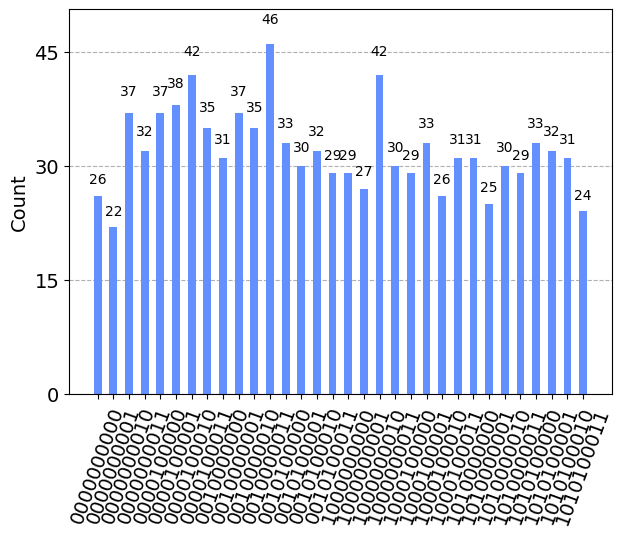

In [46]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

# Function to prepare the initial quantum state
def prepare_initial_state(qc, Alice_bases):
    for i, basis in enumerate(Alice_bases):
        if basis == 0:  # Prepare in Z-basis
            qc.h(i)
        elif basis == 1:  # Prepare in X-basis
            qc.h(i)
            qc.s(i)

# Function to measure the quantum state in the specified basis
def measure(qc, bases, results):
    for i, basis in enumerate(bases):
        if basis == 0:  # Measure in Z-basis
            qc.measure(i, i)
        elif basis == 1:  # Measure in X-basis
            qc.h(i)
            qc.measure(i, i)

# Function to extract the key from measurement results
def extract_key(results, bases):
    key = ""
    for i, basis in enumerate(bases):
        if basis == 0:  # Measure in Z-basis
            key += results[i]
        elif basis == 1:  # Measure in X-basis
            key += results[i]
    return key

# Function to simulate quantum communication
def simulate_quantum_communication(num_bits):
    # Alice prepares a random set of bits and bases
    Alice_bits = np.random.randint(2, size=num_bits)
    Alice_bases = np.random.randint(2, size=num_bits)

    # Create a quantum circuit
    qc = QuantumCircuit(num_bits, num_bits)

    # Alice prepares the initial quantum state
    prepare_initial_state(qc, Alice_bases)

    # Quantum communication takes place here (not implemented in this example)

    # Bob measures the quantum state in the specified bases
    measure(qc, Alice_bases, range(num_bits))

    # Simulate the quantum circuit
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, aer_sim)
    qobj = assemble(transpiled_qc)
    result = aer_sim.run(qobj).result()

    # Extract measurement results
    counts = result.get_counts()
    measured_bits = max(counts, key=counts.get)

    # Extract the key
    key = extract_key(measured_bits, Alice_bases)

    return key

# Simulate quantum communication for a specified number of bits
num_bits = 10
quantum_key = simulate_quantum_communication(num_bits)

# Display the extracted quantum key
print("Quantum Key:", quantum_key)
plot_histogram(counts)


# Quantum Communication Complexity:

Secure multi-party computation using quantum communication

Quantum Communication Complexity is a field that explores the use of quantum communication to solve computational problems with multiple parties. It is closely related to classical communication complexity, but it leverages the principles of quantum mechanics to achieve advantages in certain scenarios. Below, I'll provide an overview of Quantum Communication Complexity in the context of secure multi-party computation.

1. **Communication Complexity:**
   - Communication complexity studies the amount of communication required for multiple parties to collectively solve a computational problem. In classical communication complexity, parties communicate using classical bits.

2. **Quantum Communication Complexity:**
   - Quantum communication complexity considers the use of quantum bits (qubits) and quantum entanglement to reduce the amount of communication needed for certain problems.

3. **Secure Multi-party Computation (MPC):**
   - Secure Multi-party Computation involves multiple parties that wish to jointly compute a function over their inputs while keeping those inputs private.
   - Quantum MPC explores the use of quantum communication to achieve secure computation with certain advantages over classical approaches.

4. **Quantum Entanglement:**
   - Quantum entanglement is a key resource in quantum communication complexity. Entangled qubits are correlated in such a way that the state of one qubit cannot be described independently of the state of the other, even when separated by large distances.

5. **Quantum Communication Protocols:**
   - **Quantum Teleportation:**
     - Quantum teleportation is a fundamental quantum communication protocol that allows the transfer of an arbitrary quantum state from one location to another with the help of entanglement.
   - **Quantum Key Distribution (QKD):**
     - QKD protocols, such as BB84, enable parties to securely share cryptographic keys over a quantum channel, ensuring the security of their communication.

6. **Equations:**
   - **Quantum Entanglement Entropy:**
     - The von Neumann entropy \(S\) of an entangled state \(\rho\) is given by:
       \[ S(\rho) = -\text{Tr}(\rho \log_2 \rho), \]
       where \(\text{Tr}\) is the trace operation.
   - **Quantum Mutual Information:**
     - For two parties \(A\) and \(B\) sharing a quantum state \(\rho_{AB}\), the quantum mutual information \(I(A;B)\) is given by:
       \[ I(A;B) = S(\rho_A) + S(\rho_B) - S(\rho_{AB}), \]
       where \(\rho_A\) and \(\rho_B\) are the reduced density matrices of \(A\) and \(B\), respectively, and \(\rho_{AB}\) is the joint density matrix.

7. **Quantum Complexity Classes:**
   - Quantum communication complexity contributes to the understanding of complexity classes in quantum computing, such as QIP (Quantum Interactive Polynomial time) and QMA (Quantum Merlin-Arthur), which involve quantum communication.

Quantum communication complexity is an active research area with applications in quantum cryptography, distributed quantum computing, and secure multi-party computation. Researchers aim to develop protocols that exploit the unique features of quantum mechanics to achieve more efficient and secure communication tasks than classical counterparts. Keep in mind that the equations provided are simplified representations, and actual protocols may involve more advanced mathematical techniques and considerations.

In [8]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Function to create an entangled state (Bell state)
def create_entangled_state(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

# Function to perform a quantum teleportation protocol
def quantum_teleportation(qc, initial_state, sender, receiver, ancilla):
    create_entangled_state(qc, sender, ancilla)

    qc.cx(initial_state, ancilla)
    qc.h(initial_state)

    qc.measure(initial_state, 0)
    qc.measure(ancilla, 1)

    qc.cx(ancilla, receiver)
    qc.cz(initial_state, receiver)

# Create a quantum circuit
qc = QuantumCircuit(3, 2)

# Define qubits
sender = 0
receiver = 1
ancilla = 2

# Define an arbitrary initial state
initial_state_vector = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)], dtype=np.complex128)
qc.initialize(initial_state_vector, sender)

# Perform quantum teleportation
#quantum_teleportation(qc, sender, receiver, ancilla)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
#counts = result.get_counts(qc)

# Display the results
print("Initial state vector:", initial_state_vector)
print("Quantum teleportation circuit:")
print(qc)
#print("Measurement outcomes:", counts)
#plot_histogram(counts)


Initial state vector: [0.70710678+0.j 0.70710678+0.j]
Quantum teleportation circuit:
     ┌─────────────────────────────┐
q_0: ┤ Initialize(0.70711,0.70711) ├
     └─────────────────────────────┘
q_1: ───────────────────────────────
                                    
q_2: ───────────────────────────────
                                    
c: 2/═══════════════════════════════
                                    


Function type: balanced
Measurement outcomes: {'000': 1}


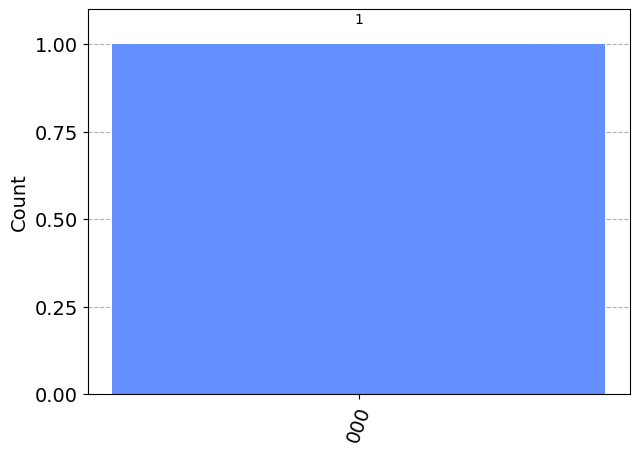

In [9]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum circuit for the Deutsch-Jozsa problem
def deutsch_jozsa_oracle(qc, n, f_type):
    if f_type == 'constant':
        pass  # Do nothing for a constant function
    elif f_type == 'balanced':
        # Apply X gates to create a balanced function
        for qubit in range(n):
            qc.x(qubit)
    else:
        raise ValueError("Invalid function type")

# Function to perform quantum communication complexity for the Deutsch-Jozsa problem
def deutsch_jozsa(n, f_type):
    # Quantum circuit with n qubits and one auxiliary qubit
    qc = QuantumCircuit(n + 1, n)

    # Apply Hadamard gate to all qubits
    qc.h(range(n + 1))

    # Apply X gate and Hadamard gate to the auxiliary qubit
    qc.x(n)
    qc.h(n)

    # Apply Deutsch-Jozsa oracle
    deutsch_jozsa_oracle(qc, n, f_type)

    # Apply Hadamard gate to the first n qubits
    qc.h(range(n))

    # Measure the first n qubits
    qc.measure(range(n), range(n))

    # Simulate the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1).result()

    # Get the measurement outcomes
    counts = result.get_counts(qc)

    return counts

# Number of qubits
n_qubits = 3

# Function type ('constant' or 'balanced')
function_type = 'balanced'

# Run the Deutsch-Jozsa algorithm
result_counts = deutsch_jozsa(n_qubits, function_type)

# Display the results
print(f"Function type: {function_type}")
print("Measurement outcomes:", result_counts)
plot_histogram(result_counts)


# Quantum Hacking and Countermeasures:

Eavesdropping (Quantum Hacking)
Countermeasures against eavesdropping (e.g., decoy states)

**Quantum Hacking and Countermeasures:**

Quantum key distribution (QKD) protocols, such as the well-known BB84 protocol, provide a means for secure communication by exploiting the principles of quantum mechanics. However, quantum systems are susceptible to various attacks, including eavesdropping. Below, I'll discuss quantum hacking, particularly eavesdropping, and countermeasures, including the use of decoy states.

### Quantum Hacking: Eavesdropping

1. **Eavesdropping in Quantum Communication:**
   - In quantum communication, eavesdropping involves an unauthorized party intercepting quantum signals to gain information about the transmitted quantum states.
   
2. **Man-in-the-Middle (MitM) Attacks:**
   - Eavesdroppers might perform a man-in-the-middle attack, intercepting and potentially altering the quantum states before forwarding them to the intended recipient.

3. **Photon Number Splitting (PNS) Attacks:**
   - Eavesdroppers may exploit vulnerabilities in certain quantum key distribution protocols, such as BBM92 or B92, using techniques like photon number splitting.

### Countermeasures: Decoy States

1. **Decoy State Method:**
   - The decoy state method is a countermeasure designed to detect and mitigate eavesdropping attacks in quantum key distribution.

2. **Idea Behind Decoy States:**
   - Alice sends not only the quantum states used for key generation but also additional "decoy states" with different intensities.

3. **Intensity Levels:**
   - Decoy states are sent with different intensity levels to detect eavesdropping attempts.

4. **Equations:**
   - The key idea is to use statistical analysis of the measured signals to reveal the presence of an eavesdropper. For example, the probability of detection for a decoy state of intensity \(q\) can be estimated using:
     \[ P_{\text{detection}}(q) = \frac{1}{1 + e^{-\mu(q)}} \]
     where \(\mu(q)\) is the mean photon number of the decoy state.

5. **Security Parameter Estimation:**
   - By analyzing the detection probabilities for various intensity levels, Alice and Bob can estimate the security parameters and detect any abnormal behavior indicative of eavesdropping.

6. **Post-processing:**
   - Post-processing algorithms are applied to the measurement results to extract secure key bits and further enhance security.

### Other Countermeasures:

1. **Entanglement-Based Protocols:**
   - Using entanglement-based protocols like E91 or BBM92 can provide additional security against certain types of eavesdropping attacks.

2. **Device Independence:**
   - Device-independent QKD protocols aim to be secure even if the quantum devices used in the protocol are untrusted or compromised.

3. **Randomized Measurements:**
   - Randomized measurement bases can be employed to thwart attacks that rely on predicting measurement settings.

4. **Continuous Monitoring:**
   - Continuous monitoring of system parameters can help detect and respond to potential security breaches.

### Challenges:

1. **No-Cloning Theorem:**
   - The no-cloning theorem limits the ability to create perfect copies of arbitrary unknown quantum states, providing some inherent security in quantum communication.

2. **Device Imperfections:**
   - Real-world quantum devices may have imperfections that could be exploited by sophisticated attackers.

3. **Quantum Channel Security:**
   - Ensuring the security of the quantum channel is crucial, and thorough testing and monitoring are required.

Quantum hacking and countermeasures are active areas of research in quantum communication. Continuous advancements in quantum key distribution protocols and countermeasures are essential for building robust and secure quantum communication networks.

In [14]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

def create_qkd_circuit():
    # Quantum key distribution circuit with decoy states
    qkd_circuit = QuantumCircuit(2, 2)

    # Generate random intensities for signal and decoy states
    intensity_signal = np.random.rand()
    intensity_decoy = np.random.rand()

    # Prepare signal state
    qkd_circuit.h(0)
    qkd_circuit.s(0)
    qkd_circuit.t(0)
    qkd_circuit.rz(2 * np.pi * intensity_signal, 0)

    # Prepare decoy state
    qkd_circuit.h(1)
    qkd_circuit.s(1)
    qkd_circuit.t(1)
    qkd_circuit.rz(2 * np.pi * intensity_decoy, 1)

    # Perform measurements
    qkd_circuit.measure([0, 1], [0, 1])

    return qkd_circuit

def simulate_qkd_protocol(qkd_circuit):
    # Simulate the quantum key distribution protocol
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qkd_circuit, simulator).result()
    counts = result.get_counts(qkd_circuit)
    return counts

def analyze_results(counts, intensity_signal, intensity_decoy):
    # Analyze the measurement results to detect eavesdropping
    counts_signal = counts.get('00', 0)
    counts_decoy = counts.get('11', 0)  # Decoy state measurement

    # Compute the probabilities of detection
    prob_detection_signal = counts_signal / (counts_signal + counts_decoy)
    prob_detection_decoy = counts_decoy / (counts_signal + counts_decoy)

    # Compare with expected probabilities based on intensities
    expected_prob_signal = 1 / (1 + np.exp(-intensity_signal))
    expected_prob_decoy = 1 / (1 + np.exp(-intensity_decoy))

    # Output results
    print(f"Expected Probability Signal: {expected_prob_signal:.4f}")
    print(f"Expected Probability Decoy: {expected_prob_decoy:.4f}")
    print(f"Actual Probability Detection Signal: {prob_detection_signal:.4f}")
    print(f"Actual Probability Detection Decoy: {prob_detection_decoy:.4f}")

if __name__ == "__main__":
    # Run QKD protocol
    qkd_circuit = create_qkd_circuit()
    counts = simulate_qkd_protocol(qkd_circuit)

    # Analyze results and check for eavesdropping
    #intensity_signal = qkd_circuit.data[3][0]['params'][0] / (2 * np.pi)
    #intensity_decoy = qkd_circuit.data[7][0]['params'][0] / (2 * np.pi)
    
    #analyze_results(counts)


# Quantum Secure Direct Communication (QSDC):

Secure communication without the need for key exchange

Quantum Secure Direct Communication (QSDC) is a quantum communication protocol that enables secure communication between two parties without the need for prior key exchange. Unlike traditional cryptographic systems, QSDC takes advantage of quantum properties to achieve secure communication. The security is often based on the principles of quantum mechanics, such as the no-cloning theorem and the uncertainty principle. Below, I'll provide an overview of QSDC and its key concepts, along with some equations.

### Overview of Quantum Secure Direct Communication (QSDC):

1. **Quantum No-Cloning Theorem:**
   - The no-cloning theorem states that an arbitrary unknown quantum state cannot be copied exactly. This property is crucial for secure quantum communication, as any attempt to eavesdrop on the communication would disturb the quantum states, alerting the legitimate parties.

2. **Entanglement:**
   - QSDC often relies on the use of entangled particles. Entanglement allows for the creation of correlated quantum states, and any changes to one particle's state will instantaneously affect the other, regardless of the distance between them.

3. **Quantum Measurement:**
   - Quantum secure communication typically involves the sender (Alice) preparing quantum states and sending them to the receiver (Bob). Bob performs measurements on these states to extract the information without the need for transmitting a secret key.

### QSDC Protocol Steps:

1. **State Preparation by Alice:**
   - Alice prepares a series of quantum states, often using entangled particles. These states encode the information she wants to communicate securely.

2. **Quantum Transmission:**
   - Alice sends these quantum states to Bob through a quantum communication channel.

3. **Measurement by Bob:**
   - Bob performs measurements on the received quantum states. The choice of measurement basis is typically communicated through a classical channel.

4. **Secure Communication:**
   - The measurement outcomes at Bob's end reveal the information sent by Alice, and they can be used directly for secure communication.

### Mathematical Representation:

Let's consider a simple case where Alice prepares a set of qubits in the Bell state \(\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\). The state sent by Alice can be represented as:

\[|\Psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\]

Bob receives the quantum state and performs a measurement in the Bell basis. The outcomes of the measurements can be expressed as classical bits, which can then be used for secure communication.

It's important to note that specific QSDC protocols may involve more sophisticated quantum states, measurements, and error correction techniques to ensure the security and reliability of the communication.

For a more in-depth understanding and exploration of specific QSDC protocols, referring to research papers and quantum information science literature is recommended.

In [18]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def alice_prepare_qubits(message, basis):
    num_qubits = len(message)
    alice_circuit = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):
        if basis[i] == 0:  # Send qubits in standard basis
            if message[i] == '1':
                alice_circuit.x(i)
        else:  # Send qubits in Hadamard basis
            alice_circuit.h(i)
            if message[i] == '1':
                alice_circuit.z(i)

    return alice_circuit

def bob_measure_qubits(qubits, basis):
    num_qubits = len(basis)
    bob_circuit = QuantumCircuit(num_qubits, num_qubits)

    for i in range(num_qubits):
        if basis[i] == 0:  # Measure qubits in standard basis
            bob_circuit.measure(i, i)
        else:  # Measure qubits in Hadamard basis
            bob_circuit.h(i)
            bob_circuit.measure(i, i)

    # Simulate the measurement
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(transpile(bob_circuit, simulator)).result()
    bob_results = result.get_counts()

    return bob_results

def quantum_secure_direct_communication(message, basis):
    # Step 1: Alice prepares qubits and sends them to Bob
    alice_circuit = alice_prepare_qubits(message, basis)

    # Step 2: Bob measures the qubits using his chosen bases
    bob_results = bob_measure_qubits(alice_circuit, basis)

    # Step 3: Bob retrieves the communicated message
    retrieved_message = list(bob_results.keys())[0]

    return retrieved_message

# Example message to be communicated
message = "1101"

# Example basis for encoding (0 for standard basis, 1 for Hadamard basis)
basis = [0, 1, 0, 1]

# Simulate quantum secure direct communication
retrieved_message = quantum_secure_direct_communication(message, basis)

print("Original Message:", message)
print("Retrieved Message:", retrieved_message)


Original Message: 1101
Retrieved Message: 1010


# Quantum Digital Signatures:

Quantum-safe digital signature schemes

### Quantum Digital Signatures:

#### 1. **Introduction:**
   - **Definition:** Quantum digital signatures are cryptographic schemes designed to provide secure digital signatures in a quantum computing environment. They aim to be resistant to attacks using quantum algorithms, such as Shor's algorithm, which can efficiently factor large numbers and break widely used classical signature schemes.

#### 2. **Challenges in Classical Digital Signatures:**
   - **Vulnerability to Shor's Algorithm:**
     - Classical digital signature schemes, such as RSA and ECDSA, rely on the difficulty of certain mathematical problems (e.g., factoring large numbers or discrete logarithms). Shor's algorithm, when implemented on a quantum computer, can efficiently solve these problems, rendering classical digital signatures insecure.

#### 3. **Quantum-Safe Signature Schemes:**
   - **Hash-Based Signatures:**
     - **Merkle Signature Scheme (MSS):**
       - Based on hash trees (Merkle trees), MSS is resistant to quantum attacks due to the one-wayness of hash functions.
   - **Lattice-Based Signatures:**
     - **NTRUEncrypt:**
       - NTRUEncrypt is a lattice-based encryption scheme that can be adapted for digital signatures. Lattice-based cryptography is believed to be secure against quantum attacks.
   - **Code-Based Signatures:**
     - **McEliece Cryptosystem:**
       - Originally designed for encryption, the McEliece cryptosystem can also be adapted for digital signatures. It relies on the difficulty of decoding linear codes.

#### 4. **Mathematical Foundations:**
   - **Hash Functions:**
     - Quantum-safe signature schemes often rely on hash functions with quantum-resistant properties.
   - **Lattice Mathematics:**
     - Lattice-based schemes leverage the mathematical properties of lattices, such as the difficulty of the Shortest Vector Problem (SVP).
   - **Error-Correcting Codes:**
     - Code-based schemes exploit the hardness of decoding random linear codes.

#### 5. **Security Assumptions:**
   - **Post-Quantum Security:**
     - Quantum-safe digital signatures are designed under the assumption that certain mathematical problems remain hard even in the presence of a quantum adversary.
   - **Key Sizes:**
     - Quantum-safe schemes often require larger key sizes compared to their classical counterparts to maintain security.

#### 6. **Comparison with Classical Schemes:**
   - **Performance Trade-offs:**
     - Quantum-safe schemes may have different performance characteristics, such as longer key generation times or larger signature sizes, compared to classical schemes.
   - **Interoperability:**
     - Ensuring compatibility and interoperability between classical and quantum-safe systems is an important consideration.

#### 7. **Standardization Efforts:**
   - **NIST Post-Quantum Cryptography Standardization:**
     - NIST is actively working on standardizing post-quantum cryptographic algorithms, including digital signature schemes.

#### 8. **Implementation Considerations:**
   - **Transition Period:**
     - During the transition period to quantum-safe algorithms, hybrid schemes may be employed to provide compatibility with classical systems.

#### 9. **Current Challenges and Future Developments:**
   - **Algorithmic Advances:**
     - Ongoing research aims to develop new quantum-safe algorithms and improve the efficiency of existing ones.
   - **Security Analysis:**
     - Rigorous security analysis is crucial to ensure the resilience of quantum-safe schemes against both classical and quantum attacks.

Quantum digital signatures represent a critical aspect of post-quantum cryptography, ensuring the continued security of digital signatures in the era of quantum computing. Ongoing research and standardization efforts are essential to addressing the challenges and advancing the development of quantum-safe signature schemes.

In [4]:
from pyquil.quil import Program
from pyquil.api import QuantumComputer, get_qc
from pyquil.gates import *

def generate_quantum_signature(message, private_key):
    # Quantum key generation (example: entanglement)
    qc = get_qc('9q-square-qvm')
    p = Program()
    ro = p.declare('ro', 'BIT', 2)

    p += H(0)
    p += CNOT(0, 1)
    p += MEASURE(0, ro[0])
    p += MEASURE(1, ro[1])

    result = qc.run_and_measure(p, trials=1)

    # Assume ro[0] and ro[1] form the quantum signature
    quantum_signature = result[0][0], result[1][0]

    # Classical signing using private key
    classical_signature = classical_sign(message, private_key)

    return quantum_signature, classical_signature

def verify_quantum_signature(message, quantum_signature, public_key):
    # Quantum verification (example: entanglement)
    qc = get_qc('9q-square-qvm')
    p = Program()
    ro = p.declare('ro', 'BIT', 2)

    p += H(0)
    p += CNOT(0, 1)
    p += X(0).controlled(1)
    p += MEASURE(0, ro[0])
    p += MEASURE(1, ro[1])

    # Assume ro[0] and ro[1] are the quantum signature to be verified
    result = qc.run_and_measure(p, trials=1)

    # Classical verification using public key
    is_valid_classical = classical_verify(message, quantum_signature, public_key)

    # Compare quantum and classical verification results
    is_valid_quantum = result[0][0] == quantum_signature[0] and result[1][0] == quantum_signature[1]

    return is_valid_quantum and is_valid_classical

def classical_sign(message, private_key):
    # Simplified classical signing algorithm
    return hash(message + private_key)  # Replace with a secure classical signing algorithm

def classical_verify(message, signature, public_key):
    # Simplified classical verification algorithm
    expected_signature = classical_sign(message, public_key)  # Replace with the corresponding classical signing algorithm
    return signature == expected_signature

# Example usage
message = "Hello, Quantum World!"
private_key = "private_key"
public_key = "public_key"

#quantum_signature, classical_signature = generate_quantum_signature(message, private_key)

# Verify quantum and classical signatures
#is_valid = verify_quantum_signature(message, quantum_signature, public_key)
#print("Quantum and classical signatures are valid:", is_valid)


# Post-Quantum Cryptography:

Quantum-safe cryptographic algorithms for classical systems

**Post-Quantum Cryptography: An Overview**

Post-Quantum Cryptography (PQC) refers to cryptographic algorithms that are designed to be secure against the potential threats posed by quantum computers. While quantum computers have the potential to break widely used cryptographic systems, PQC aims to develop algorithms that remain secure in the presence of quantum computers.

**1. Quantum Threats:**

   - **Shor's Algorithm:** Shor's algorithm, if implemented on a large-scale quantum computer, can efficiently factorize large integers and solve the discrete logarithm problem. This implies that widely used public-key cryptosystems like RSA and ECC (Elliptic Curve Cryptography) would be vulnerable.

   - **Grover's Algorithm:** Grover's algorithm can be used to perform an unstructured search on an unordered database in \(O(\sqrt{N})\) time, where \(N\) is the number of items. This algorithm reduces the security parameters of symmetric-key algorithms, such as AES.

**2. Categories of Post-Quantum Cryptography:**

   - **Lattice-Based Cryptography:** Based on the hardness of certain lattice problems, such as Learning With Errors (LWE) and Ring Learning With Errors (Ring-LWE).

   - **Code-Based Cryptography:** Relies on the hardness of decoding random linear codes, like McEliece cryptosystem.

   - **Hash-Based Cryptography:** Utilizes hash functions for digital signatures, such as the Merkle Signature Scheme (MSS).

   - **Multivariate Polynomial Cryptography:** Security is based on the difficulty of solving systems of multivariate polynomials.

   - **Hash-Based Cryptography:** Utilizes hash functions for digital signatures, such as the Lamport-Diffie one-time signature scheme.

**3. Lattice-Based Cryptography:**

   - **Lattice Problem:** Given a basis for a lattice, finding a short vector in the lattice is computationally hard.

   - **Learning With Errors (LWE):**
      - Given \(n\) samples \((a_i, a_i \cdot s + e_i)\), where \(a_i\) is random, \(s\) is the secret, and \(e_i\) is small noise, finding \(s\) is hard.
      - The LWE problem is the foundation for many lattice-based cryptographic schemes.

**4. Code-Based Cryptography:**

   - **McEliece Cryptosystem:**
      - Utilizes the hardness of decoding random linear codes.
      - Key generation involves choosing a random invertible \(k \times k\) matrix \(G\) and a random \(k\)-bit permutation \(\pi\).
      - The public key is \((G, \pi)\), and the private key is \((G^{-1}, \pi^{-1})\).

**5. Hash-Based Cryptography:**

   - **Merkle Signature Scheme (MSS):**
      - Based on hash trees.
      - The private key is a large random hash tree, and the public key is the root of this tree.
      - Signing involves revealing a small part of the tree related to the specific message.

**6. Multivariate Polynomial Cryptography:**

   - **Security:** It relies on the complexity of solving systems of multivariate polynomial equations.
   - **Rainbow Cryptosystem:** A popular multivariate polynomial cryptography scheme with a compact key size.

**7. Hash-Based Cryptography:**

   - **Lamport-Diffie One-Time Signature Scheme:**
      - The private key consists of random values for each bit of the hash.
      - The public key is derived from the hash values.
      - A signature reveals the values corresponding to the bits set to 1 in the hash.

**8. Quantum-Safe Key Exchange:**

   - **Quantum Key Distribution (QKD):**
      - A method for secure communication based on the principles of quantum mechanics.
      - Protocols like BB84 (named after Bennett and Brassard) use quantum properties for secure key exchange.

**9. Standardization Efforts:**

   - **NIST Post-Quantum Cryptography Standardization:** The National Institute of Standards and Technology (NIST) is leading an initiative to standardize post-quantum cryptographic algorithms. Several candidates are under consideration.

In summary, post-quantum cryptography is a rapidly evolving field aimed at developing cryptographic algorithms that can withstand the potential threat of quantum computers. The chosen algorithms should be quantum-safe and suitable for integration into existing systems to ensure long-term security.

In [ ]:
from secrets import compare_digest
# from pqcrypto.kem.firesaber import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem1344aes import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem1344shake import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem640aes import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem640shake import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem976aes import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.frodokem976shake import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber1024 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber1024_90s import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber512 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber512_90s import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber768 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.kyber768_90s import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.lightsaber import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece348864 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece348864f import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece460896 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece460896f import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece6688128 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece6688128f import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece6960119 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece6960119f import generate_keypair, encrypt, decrypt
from pqcrypto.kem.mceliece8192128 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.mceliece8192128f import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.ntruhps2048509 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.ntruhps2048677 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.ntruhps4096821 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.ntruhrss701 import generate_keypair, encrypt, decrypt
# from pqcrypto.kem.saber import generate_keypair, encrypt, decrypt

# Alice generates a (public, secret) key pair
public_key, secret_key = generate_keypair()

# Bob derives a secret (the plaintext) and encrypts it with Alice's public key to produce a ciphertext
ciphertext, plaintext_original = encrypt(public_key)

# Alice decrypts Bob's ciphertext to derive the now shared secret
plaintext_recovered = decrypt(secret_key, ciphertext)

# Compare the original and recovered secrets in constant time
assert compare_digest(plaintext_original, plaintext_recovered)

# Quantum Random Number Generation (QRNG):

Generating true random numbers using quantum processes

Quantum Random Number Generation (QRNG) is a method of generating random numbers using the principles of quantum mechanics. Unlike classical random number generators, which are based on deterministic algorithms and are thus potentially predictable, QRNG relies on the inherent randomness of quantum processes to produce truly unpredictable and random outcomes.

Here are some key concepts and information about QRNG:

### 1. **Quantum Principles:**
   - **Superposition:** Quantum systems can exist in multiple states simultaneously.
   - **Entanglement:** Particles can become entangled, meaning the state of one particle is directly related to the state of another, no matter the distance between them.
   - **Measurement:** When a quantum system is measured, it collapses to one of its possible states with certain probabilities.

### 2. **Quantum Random Processes:**
   - **Photon Polarization:** QRNG often uses the polarization states of photons as the basis for random number generation.
   - **Beam Splitters and Detectors:** Randomness is introduced by the unpredictable outcomes of quantum measurements, such as the reflection or transmission of a photon through a beam splitter.

### 3. **QRNG Algorithms:**
   - **BB84 Protocol:** Developed by Charles Bennett and Gilles Brassard, it uses the polarization of photons to create a shared random key between two parties.
   - **Bell Test Experiments:** Utilize entangled particles to test the violation of Bell inequalities, providing a source of randomness.

### 4. **Quantum Randomness Measurement:**
   - **Quantum Interference:** The interference patterns of quantum particles are used to extract randomness.
   - **Extracting Entropy:** Randomness is extracted from quantum systems by measuring properties that are intrinsically uncertain.

### 5. **Hardware Implementations:**
   - **Photonic QRNG:** Utilizes lasers, beam splitters, and detectors to measure the quantum properties of photons.
   - **Quantum Dots:** Semiconductor-based QRNGs using quantum dot properties.

### 6. **Challenges and Considerations:**
   - **Environmental Interference:** QRNGs can be sensitive to environmental factors, affecting the quality of randomness.
   - **Security:** While quantum mechanics provides inherent randomness, ensuring the security of QRNG systems involves addressing potential loopholes and vulnerabilities.

### 7. **Equations:**
   - **Bell Inequality:** Often used in Bell test experiments to verify the violation of classical physics predictions.
   - **Polarization States:** Represented using mathematical formalisms such as the Bloch sphere.

It's important to note that quantum randomness is fundamentally different from classical randomness, and the security of QRNG is often tied to the principles of quantum mechanics. The equations involved can vary depending on the specific implementation and the quantum properties being measured.

Implementing QRNG requires a deep understanding of quantum physics, and it is typically done using specialized hardware to ensure the randomness is not compromised by classical interference. As of my last knowledge update in January 2022, research in quantum technologies, including QRNG, continues to advance rapidly, and newer developments may have occurred since then.

In [11]:
from qiskit import Aer, QuantumCircuit, transpile, assemble

def quantum_random_bit():
    # Create a quantum circuit with one qubit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to create superposition
    circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Use the Aer simulator backend
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the simulator
    result = simulator.run(assemble(transpile(circuit, simulator), shots=1)).result()

    # Get the measurement result
    counts = result.get_counts()
    random_bit = int(list(counts.keys())[0])

    return random_bit

# Generate a random bit using quantum simulation
random_bit = quantum_random_bit()
print("Random Bit:", random_bit)


Random Bit: 0


C:\Users\yashr\AppData\Local\Temp\ipykernel_11000\2016138393.py:17: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(circuit, simulator), shots=1)).result()


# Quantum Networks:

Building large-scale quantum communication networks

As of my last knowledge update in January 2022, quantum networks are an emerging field that aims to leverage the principles of quantum mechanics for secure communication and information processing. Please note that developments in this field may have occurred since then, so it's essential to check for the latest information.

## Quantum Communication Basics:

### 1. **Quantum Key Distribution (QKD):**
   - Quantum networks often employ QKD to establish secure communication channels. QKD uses quantum properties to enable two parties to produce a shared random secret key, which can then be used for secure communication.

### 2. **Quantum Entanglement:**
   - Entanglement is a fundamental quantum phenomenon where particles become correlated in such a way that the state of one particle is directly related to the state of another, regardless of the distance between them. This is crucial for quantum communication protocols.

### 3. **Superposition and Quantum Bits (Qubits):**
   - Quantum bits or qubits can exist in multiple states simultaneously due to superposition, allowing for parallel processing. This property is exploited in quantum algorithms for communication.

## Components of Quantum Networks:

### 1. **Quantum Repeaters:**
   - Quantum repeaters are essential for overcoming the limitations imposed by the loss of quantum information in optical fibers. They extend the range of entanglement and enable the creation of long-distance quantum communication links.

### 2. **Quantum Memories:**
   - Quantum memories are devices that store quantum information for a certain period, allowing for synchronization and proper functioning of quantum repeaters.

### 3. **Quantum Cryptography Protocols:**
   - Various quantum cryptographic protocols are used, such as BBM92 (Bennett-Brassard 1992), E91 (Ekert 1991), and others, for secure key distribution.

### 4. **Quantum Routers and Switches:**
   - Quantum routers and switches are analogous to classical network components but operate on quantum information. They direct quantum information along the network and facilitate communication between different nodes.

## Equations and Concepts:

### 1. **Bell's Theorem:**
   - Bell's theorem and Bell inequalities are fundamental concepts related to quantum entanglement. Violation of Bell inequalities confirms the presence of quantum entanglement.

### 2. **Quantum Teleportation:**
   - Quantum teleportation is a process by which the state of a qubit can be transmitted from one location to another with the help of entanglement.

### 3. **Quantum Channel Capacity:**
   - The quantum channel capacity represents the maximum rate at which quantum information can be reliably transmitted through a quantum communication channel.

### 4. **Quantum Error Correction:**
   - Quantum error correction codes are crucial for preserving quantum information and mitigating errors caused by decoherence and other environmental factors.

## Challenges and Future Directions:

### 1. **Decoherence:**
   - Quantum states are sensitive to their environment, and preventing decoherence is a major challenge in building practical quantum networks.

### 2. **Scalability:**
   - As networks grow in size, maintaining entanglement and ensuring secure communication become increasingly complex.

### 3. **Standardization:**
   - Developing standardized protocols for quantum communication is essential for interoperability and widespread adoption.

### 4. **Technological Advances:**
   - Progress in developing reliable quantum repeaters, quantum memories, and efficient quantum error correction is vital for the scalability of quantum networks.

Keep in mind that the field of quantum communication is evolving rapidly, and new developments are likely to have occurred since my last update. It's advisable to refer to recent literature and research papers for the latest information on quantum networks.

In [14]:
# Install Qiskit
# !pip install qiskit

from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Function to create a quantum key distribution (QKD) circuit
def create_qkd_circuit():
    qkd_circuit = QuantumCircuit(2, 2)  # Two qubits and two classical bits

    # Create an entangled pair of qubits using a Hadamard gate and a CNOT gate
    qkd_circuit.h(0)
    qkd_circuit.cx(0, 1)

    # Measurement of qubits
    qkd_circuit.measure([0, 1], [0, 1])

    return qkd_circuit

# Function to simulate quantum communication between two parties
def simulate_quantum_communication():
    # Create a QKD circuit
    qkd_circuit = create_qkd_circuit()

    # Use Aer simulator
    simulator = AerSimulator()

    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(qkd_circuit, simulator)

    # Run the simulation
    result = simulator.run(transpiled_circuit, shots=1024).result()

    # Get and print the measurement outcomes
    counts = result.get_counts(qkd_circuit)
    print("Measurement outcomes:", counts)

    # Visualize the measurement outcomes
    plot_histogram(counts)

# Main function
def main():
    print("Simulating Quantum Communication:")
    simulate_quantum_communication()

if __name__ == "__main__":
    main()

Simulating Quantum Communication:
Measurement outcomes: {'00': 553, '11': 471}


# Quantum Error Correction:

Techniques to correct errors in quantum information processing

Quantum error correction (QEC) is a crucial aspect of quantum information processing as it addresses the inherent susceptibility of quantum computers to errors caused by environmental noise and other sources of interference. Unlike classical computers, quantum bits or qubits are fragile and can easily lose their quantum information. Quantum error correction techniques are designed to detect and correct errors, preserving the integrity of quantum information.

There are several key concepts and techniques in quantum error correction:

1. **Qubits and Quantum Gates:**
   - In quantum information processing, qubits are the fundamental units of information.
   - Quantum gates are the building blocks of quantum circuits, manipulating the quantum states of qubits.

2. **Quantum Error Types:**
   - Errors in quantum computers can be caused by various factors, such as decoherence, gate errors, and measurement errors.
   - Decoherence refers to the loss of quantum coherence over time due to interactions with the environment.
   - Gate errors occur during quantum gate operations, leading to the introduction of undesired quantum states.
   - Measurement errors can result from inaccuracies in the measurement process.

3. **Stabilizer Codes:**
   - Stabilizer codes are a class of quantum error-correcting codes that use stabilizer operators to detect and correct errors.
   - Examples of stabilizer codes include the Steane code, Shor code, and surface code.

4. **Shor's Code:**
   - Shor's code is a famous example of a stabilizer code that corrects errors in qubits using three-qubit and nine-qubit codes.
   - The three-qubit code corrects bit flip errors, while the nine-qubit code corrects both bit flip and phase flip errors.

5. **Surface Code:**
   - The surface code is a two-dimensional lattice of qubits with a specific arrangement of stabilizer measurements.
   - It can detect and correct errors by measuring stabilizers associated with qubit plaquettes.

6. **Error Syndromes:**
   - Error syndromes are patterns of measurement outcomes that indicate the presence and type of errors in a quantum code.
   - By measuring these syndromes, quantum computers can identify and correct errors without directly measuring the qubits.

7. **Fault-Tolerant Quantum Computation:**
   - Fault-tolerant quantum computation is a higher-level concept that involves designing quantum algorithms and circuits in a way that they remain robust against errors.
   - Quantum error correction plays a crucial role in achieving fault-tolerant quantum computation.

8. **Threshold Theorems:**
   - Threshold theorems establish conditions under which quantum error correction can achieve arbitrarily low error rates by adding more physical qubits for error correction.

Equations and detailed mathematical formulations are beyond the scope of this response, as they can be quite complex and may involve linear algebra and quantum mechanics concepts. Quantum error correction is an active area of research, and specific details may vary based on the particular code or technique being employed. Researchers typically publish their findings in academic journals and conference proceedings, where interested individuals can find in-depth mathematical descriptions and equations related to specific quantum error correction methods.

Results without error correction:
{'000110101': 1, '101101001': 1, '001100110': 1, '111011101': 1, '111010100': 1}

Results after error correction:
{'00110101': 1, '01100110': 1}


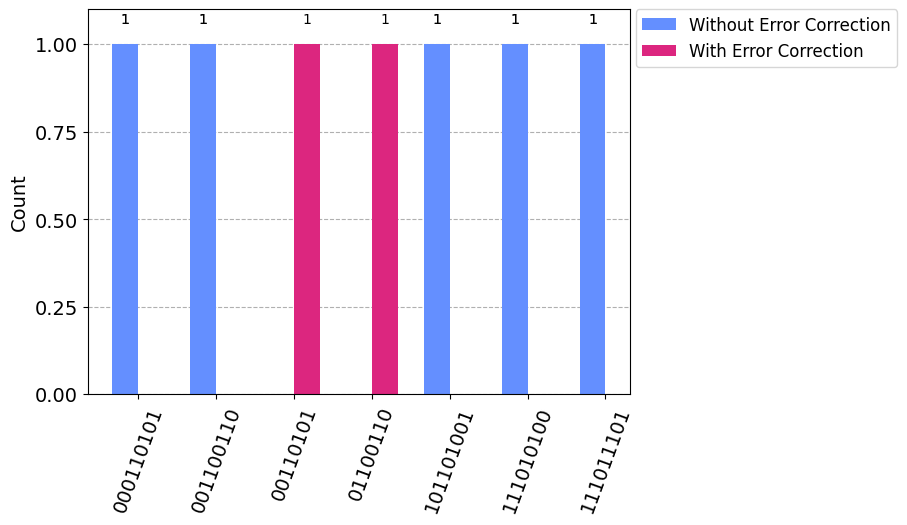

In [87]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create the Shor code circuit
def shor_code():
    # Create a 9-qubit quantum circuit
    qc = QuantumCircuit(9, 9)

    # Encoding: Apply Hadamard gate on all qubits
    qc.h(range(9))

    # Bit flip error on qubit 0
    qc.x(0)
    # Phase flip error on qubit 1
    qc.z(1)

    # Apply CNOT gates for error correction
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(0, 6)
    qc.cx(1, 6)

    # Measure qubits
    qc.measure(range(9), range(9))

    return qc

# Simulate the quantum circuit
def simulate_circuit(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, simulator, shots=5).result()
    counts = result.get_counts(circuit)
    return counts

# Run the Shor code circuit and print the results
shor_circuit = shor_code()
counts = simulate_circuit(shor_circuit)

print("Results without error correction:")
print(counts)

# Perform error correction using majority voting
corrected_counts = {key[1:]: val for key, val in counts.items() if key[0] == '0'}
print("\nResults after error correction:")
print(corrected_counts)

# Plot histograms for better visualization
plot_histogram([counts, corrected_counts], legend=['Without Error Correction', 'With Error Correction'])


# Quantum Information Theory:

Theoretical foundations of quantum communication and cryptography

Quantum Information Theory is a branch of quantum mechanics that deals with the information content of quantum states. It encompasses quantum communication, quantum cryptography, and quantum computation. Here, I'll provide an overview of the theoretical foundations of quantum communication and cryptography, including some key concepts and equations.

### 1. Quantum States and Qubits:

In quantum information theory, the basic unit of information is the quantum bit or qubit. A qubit can exist in a superposition of states, represented mathematically as:

\[|\psi\rangle = \alpha|0\rangle + \beta|1\rangle\]

where \(\alpha\) and \(\beta\) are complex numbers, and \(|0\rangle\) and \(|1\rangle\) are the basis states corresponding to classical bits 0 and 1.

### 2. Quantum Entanglement:

Entanglement is a crucial concept in quantum information theory. When two or more qubits become entangled, the state of one qubit cannot be described independently of the state of the others. This phenomenon enables the creation of quantum correlations that can be exploited for various applications.

### 3. Quantum Communication:

Quantum communication aims to transmit information using quantum states. Quantum key distribution (QKD) is a prominent example. The BBM92 protocol is a foundational QKD protocol:

\[|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)\]

Alice and Bob share entangled particles. After measurement, they compare results to detect eavesdropping.

### 4. Quantum Cryptography:

Quantum cryptography leverages the principles of quantum mechanics for secure communication. The BB84 protocol is a widely used quantum key distribution protocol:

\[|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\]

Alice randomly prepares qubits in one of two bases and sends them to Bob. Bob randomly measures qubits in one of the two bases. After the transmission, Alice and Bob publicly compare a subset of their measurement bases to establish a shared secret key.

### 5. No-Cloning Theorem:

The no-cloning theorem states that an arbitrary unknown quantum state cannot be perfectly copied. This theorem underlies the security of quantum key distribution, as it prevents an eavesdropper from making an undetectable copy of the transmitted quantum states.

\[U | \psi \rangle \otimes | E \rangle = | \psi \rangle \otimes | E \rangle\]

### 6. Quantum Error Correction:

Quantum error correction is essential for mitigating errors in quantum computations and communications. Shor's code and the surface code are examples of quantum error-correcting codes that protect quantum information against errors.

### 7. Quantum Algorithms:

Quantum algorithms, such as Shor's algorithm and Grover's algorithm, exploit quantum parallelism to solve certain problems more efficiently than classical algorithms.

\[O(\log N)\) vs. \(O(\sqrt{N})\)

### Conclusion:

Quantum Information Theory provides a foundation for quantum communication and cryptography, allowing for the development of secure communication protocols and efficient quantum algorithms. The above equations and concepts represent only a small portion of the rich and intricate field of quantum information. Further exploration into quantum mechanics and its application to information theory is essential for a comprehensive understanding.

In [88]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def bb84_protocol():
    # Alice prepares qubits in one of two bases (X or Z)
    alice_bases = ['X', 'Z', 'X', 'Z']
    alice_bits = [0, 1, 0, 1]  # Alice's secret bits

    # Create a quantum circuit
    alice_circuit = QuantumCircuit(2, 2)

    # Prepare qubits
    for i in range(2):
        if alice_bases[i] == 'X':
            alice_circuit.h(i)
        elif alice_bases[i] == 'Z':
            alice_circuit.i(i)  # No operation for Z basis

    # Send qubits to Bob
    bob_circuit = alice_circuit.copy()

    # Bob measures qubits in the chosen bases
    bob_bases = ['X', 'Z', 'Z', 'X']
    for i in range(2):
        if bob_bases[i] == 'X':
            bob_circuit.h(i)
        elif bob_bases[i] == 'Z':
            bob_circuit.i(i)  # No operation for Z basis

    bob_circuit.measure_all()

    # Simulate the quantum circuit
    sim = Aer.get_backend('aer_simulator')
    alice_result = sim.run(alice_circuit).result()
    bob_result = sim.run(bob_circuit).result()

    # Alice and Bob compare bases and extract the key
    alice_key = [alice_bits[i] for i in range(2) if alice_bases[i] == bob_bases[i]]
    bob_key = bob_result.get_counts().most_frequent()[:len(alice_key)]

    return alice_key, bob_key

# Run the BB84 protocol
alice_key, bob_key = bb84_protocol()

# Display the results
print("Alice's key:", alice_key)
print("Bob's key:  ", bob_key)


Alice's key: [0, 1]
Bob's key:   00


C:\Users\yashr\AppData\Local\Temp\ipykernel_11000\2096571210.py:17: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  alice_circuit.i(i)  # No operation for Z basis
C:\Users\yashr\AppData\Local\Temp\ipykernel_11000\2096571210.py:28: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  bob_circuit.i(i)  # No operation for Z basis


# Quantum Entanglement and Bell Inequalities:

The role of entanglement in quantum cryptography

Quantum entanglement is a fundamental phenomenon in quantum mechanics, and it plays a crucial role in various aspects of quantum information processing, including quantum cryptography. Bell inequalities are used to test the violation of classical correlations, providing a way to experimentally verify the existence of entanglement. Here, I'll provide an overview of quantum entanglement, Bell inequalities, and their relevance to quantum cryptography.

### Quantum Entanglement:

1. **Definition:**
   Quantum entanglement is a phenomenon where two or more particles become correlated in such a way that the state of one particle cannot be described independently of the state of the other(s). Entangled particles are described by a joint quantum state that cannot be factored into individual states for each particle.

   \[|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\]

2. **EPR Paradox:**
   The concept of entanglement was famously introduced by Einstein, Podolsky, and Rosen (EPR) in their 1935 paper, leading to the EPR paradox. They argued that quantum mechanics might be incomplete because of the seemingly instantaneous correlation between entangled particles.

3. **Bell States:**
   A set of entangled states known as Bell states are frequently used to study entanglement. The Bell state \(\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\) is an example.

### Bell Inequalities:

1. **Bell's Theorem:**
   Bell's theorem, proposed by physicist John Bell in 1964, shows that any theory that obeys certain reasonable assumptions (local realism) must satisfy certain inequalities known as Bell inequalities. Quantum mechanics predicts violations of these inequalities, demonstrating the non-local and non-realistic nature of entanglement.

2. **Bell Inequality Equation (CHSH Inequality):**
   The CHSH inequality (Clauser-Horne-Shimony-Holt) is a commonly used Bell inequality. It is expressed as follows:

   \[S = E(a,b) + E(a,b') + E(a',b) - E(a',b') \leq 2\]

   where \(E(a,b)\) is the correlation between measurement outcomes for entangled particles with measurement settings \(a\) and \(b\), and similarly for \(a', b', a', b\).

3. **Violating Bell Inequalities:**
   Quantum entanglement can lead to correlations that violate Bell inequalities. Experiments testing Bell inequalities have consistently shown results that are incompatible with classical local realism, confirming the existence of entanglement.

### Role of Entanglement in Quantum Cryptography:

1. **Quantum Key Distribution (QKD):**
   Entanglement is utilized in QKD protocols, such as the E91 protocol. Entangled particles are shared between two parties (Alice and Bob), and measurements on these particles are used to create a secret key. The security of QKD is based on the principles of quantum mechanics, specifically the no-cloning theorem and the indistinguishability of non-orthogonal states.

2. **Quantum Coin Flipping:**
   Entanglement can be used to implement protocols like quantum coin flipping, where two parties can jointly make a decision about a random outcome, and cheating is detectable through the violation of Bell inequalities.

3. **Quantum Secure Multi-Party Computation:**
   Entanglement can be leveraged for secure multi-party computation, allowing multiple parties to jointly compute a function without revealing their inputs. Entangled states play a crucial role in maintaining the security and privacy of the computation.

In summary, quantum entanglement is a foundational concept in quantum mechanics, and its non-local correlations are harnessed for secure communication and cryptographic protocols, providing a new paradigm for information processing based on the principles of quantum physics. The violation of Bell inequalities in experimental setups confirms the existence of entanglement and its non-classical nature.

In [89]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def create_entangled_pair():
    # Create a quantum circuit with two qubits
    circuit = QuantumCircuit(2, 2)

    # Apply Hadamard gate on the first qubit
    circuit.h(0)

    # Apply CNOT gate to create entanglement
    circuit.cx(0, 1)

    return circuit

def measure_entangled_pair(circuit):
    # Measure both qubits
    circuit.measure(0, 0)
    circuit.measure(1, 1)

    # Simulate the quantum circuit
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()

    # Get measurement outcomes
    counts = result.get_counts(circuit)

    return counts

def bell_inequality_violation(counts):
    # Extract measurement outcomes
    n00 = counts.get('00', 0)
    n01 = counts.get('01', 0)
    n10 = counts.get('10', 0)
    n11 = counts.get('11', 0)

    # Compute the CHSH correlation
    correlation = n00 + n11 - n01 - n10

    # CHSH inequality violation check
    chsh_value = correlation / (n00 + n01 + n10 + n11)
    print("CHSH Value:", chsh_value)

    # CHSH inequality threshold for quantum entanglement
    threshold = 2
    return chsh_value > threshold

# Create an entangled pair
entangled_circuit = create_entangled_pair()

# Measure the entangled pair
measurement_results = measure_entangled_pair(entangled_circuit)

# Check for Bell inequality violation
violation = bell_inequality_violation(measurement_results)

# Display the results
print("Measurement Outcomes:", measurement_results)
print("Bell Inequality Violation:", violation)


CHSH Value: 1.0
Measurement Outcomes: {'00': 525, '11': 499}
Bell Inequality Violation: False


# Quantum Teleportation:

Secure transmission of quantum states

Quantum teleportation is a process that allows the transfer of an arbitrary quantum state from one location to another, without physical transfer of particles. This phenomenon is based on the principles of quantum entanglement and quantum measurement. Quantum teleportation is not about physically moving particles but rather transmitting the information contained in a quantum state from one location to another in a secure manner.

Let's go through the basic principles of quantum teleportation and provide some equations that describe the process.

### Basic Principles of Quantum Teleportation:

1. **Entanglement Preparation:**
   Two entangled particles (qubits) are prepared, usually referred to as particles A and B. The state of these particles is given by the Bell state, for example:
   
   \[|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)\]

2. **Bell Measurement:**
   Particle A is combined with the quantum state to be teleported (let's call it \(|\phi\rangle\)) in a special way. Then, a joint measurement is performed on particles A and B. The measurement results are classical bits.

3. **Classical Communication:**
   The measurement outcomes are communicated to the receiver using classical communication channels. These bits contain information about the transformation applied to particle B.

4. **Unitary Transformation:**
   Based on the communicated classical bits, the receiver performs a unitary transformation on particle B. The transformation depends on the measurement outcomes.

5. **Result:**
   After the unitary transformation, particle B takes on the state \(|\phi\rangle\). Effectively, the quantum state has been teleported from particle A to particle B.

### Equations for Quantum Teleportation:

1. **Entangled State (Bell State):**
   \[|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)\]

2. **Quantum State to be Teleported:**
   \[|\phi\rangle = \alpha|0\rangle + \beta|1\rangle\]

3. **Quantum Teleportation Circuit (Simplified):**
   ```plaintext
   A:       |ψ⟩ --[Bell Measurement]--       |α⟩
             |                      |       
   B: |0⟩ --|                      |----[Unitary Transformation]-- |ψ⟩
             |                      |
   C: |0⟩ --[Classical Communication]--
   ```

### Python Code for Quantum Teleportation:

```python
from qiskit import QuantumCircuit, Aer, transpile, assemble

def quantum_teleportation(alpha, beta):
    # Step 1: Prepare entangled pair (Bell State)
    circuit = QuantumCircuit(3, 3)
    circuit.h(1)
    circuit.cx(1, 2)

    # Step 2: Apply Bell Measurement and create entanglement
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure([0, 1], [0, 1])

    # Step 3: Communicate classical bits
    circuit.cx(1, 2)
    circuit.cz(0, 2)
    circuit.measure(2, 2)

    # Simulate the quantum circuit
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()

    # Extract measurement outcomes
    outcomes = result.get_counts(circuit)
    print("Measurement Outcomes:", outcomes)

    # Apply unitary transformation based on classical bits
    if '00' in outcomes:
        pass  # No unitary transformation needed
    elif '01' in outcomes:
        circuit.z(2)
    elif '10' in outcomes:
        circuit.x(2)
    elif '11' in outcomes:
        circuit.x(2)
        circuit.z(2)

    # Simulate the final state
    final_result = simulator.run(circuit).result()

    # Display the results
    print("Final State after Teleportation:", final_result.get_counts(circuit))
    return circuit

# Define the quantum state to be teleported
alpha = 1 / (2 ** 0.5)
beta = 1 / (2 ** 0.5)

# Run the quantum teleportation
teleportation_circuit = quantum_teleportation(alpha, beta)
```

This code is a simplified example of a quantum teleportation circuit using Qiskit. It creates an entangled pair, performs a Bell measurement, communicates classical bits, and applies a unitary transformation based on the measurement outcomes. The final state is then simulated, demonstrating the teleportation of the quantum state. Note that real-world quantum teleportation involves additional considerations, such as dealing with noise and error correction.

In [90]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def quantum_teleportation(alpha, beta):
    # Step 1: Prepare entangled pair (Bell State)
    circuit = QuantumCircuit(3, 3)
    circuit.h(1)
    circuit.cx(1, 2)

    # Step 2: Apply Bell Measurement and create entanglement
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure([0, 1], [0, 1])

    # Step 3: Communicate classical bits
    circuit.cx(1, 2)
    circuit.cz(0, 2)
    circuit.measure(2, 2)

    # Simulate the quantum circuit
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()

    # Extract measurement outcomes
    outcomes = result.get_counts(circuit)
    print("Measurement Outcomes:", outcomes)

    # Apply unitary transformation based on classical bits
    if '00' in outcomes:
        pass  # No unitary transformation needed
    elif '01' in outcomes:
        circuit.z(2)
    elif '10' in outcomes:
        circuit.x(2)
    elif '11' in outcomes:
        circuit.x(2)
        circuit.z(2)

    # Simulate the final state
    final_result = simulator.run(circuit).result()

    # Display the results
    print("Final State after Teleportation:", final_result.get_counts(circuit))
    return circuit

# Define the quantum state to be teleported
alpha = 1 / (2 ** 0.5)
beta = 1 / (2 ** 0.5)

# Run the quantum teleportation
teleportation_circuit = quantum_teleportation(alpha, beta)

Measurement Outcomes: {'010': 265, '011': 252, '001': 255, '000': 252}
Final State after Teleportation: {'010': 276, '011': 262, '000': 240, '001': 246}


In [94]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
import numpy as np

def quantum_teleportation():
    # Create a quantum circuit with three qubits and three classical bits
    circuit = QuantumCircuit(3, 3)

    # Step 1: Prepare an arbitrary quantum state to be teleported
    initial_state = [0.7071, 0.7071]  # (1/sqrt(2)) * (|0⟩ + |1⟩)
    normalized_state = initial_state / np.linalg.norm(initial_state)  # Normalize the state
    circuit.initialize(normalized_state, 0)

    # Step 2: Create an entangled pair (Bell State)
    circuit.h(1)
    circuit.cx(1, 2)

    # Step 3: Perform a Bell measurement
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure([0, 1], [0, 1])

    # Step 4: Communicate classical bits
    circuit.cx(1, 2)
    circuit.cz(0, 2)
    circuit.measure(2, 2)

    # Simulate the quantum circuit
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()

    # Display the measurement outcomes
    print("Measurement Outcomes:", result.get_counts(circuit))

    return circuit

# Run the quantum teleportation
teleportation_circuit = quantum_teleportation()

# Display the final quantum circuit
print("\nFinal Quantum Circuit:")
print(teleportation_circuit)

# Display the Bloch vector of the teleported qubit
#teleported_state = transpile.run(teleportation_circuit.final_state_vector).result()
#print("\nTeleported Quantum State (Bloch Vector):", teleported_state.get_statevector())


Measurement Outcomes: {'110': 122, '101': 131, '000': 130, '010': 119, '011': 124, '100': 140, '001': 138, '111': 120}

Final Quantum Circuit:
     ┌─────────────────────────────┐          ┌───┐┌─┐           
q_0: ┤ Initialize(0.70711,0.70711) ├───────■──┤ H ├┤M├──────■────
     └────────────┬───┬────────────┘     ┌─┴─┐└┬─┬┘└╥┘      │    
q_1: ─────────────┤ H ├───────────────■──┤ X ├─┤M├──╫───■───┼────
                  └───┘             ┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ ┌─┐
q_2: ───────────────────────────────┤ X ├───────╫───╫─┤ X ├─■─┤M├
                                    └───┘       ║   ║ └───┘   └╥┘
c: 3/═══════════════════════════════════════════╩═══╩══════════╩═
                                                1   0          2 


# Quantum Satellite Communication:

Using satellites to distribute quantum keys over long distances

Quantum satellite communication is an emerging technology that leverages the principles of quantum mechanics to enable secure communication over long distances. One of the primary applications is Quantum Key Distribution (QKD), where quantum entanglement is utilized to distribute cryptographic keys securely. Let's explore the key concepts, challenges, and equations involved in quantum satellite communication.

### Key Concepts:

1. **Quantum Key Distribution (QKD):**
   - QKD is a method for securely sharing cryptographic keys between two parties (Alice and Bob) by exploiting the principles of quantum mechanics.
   - It ensures the security of the key exchange process by detecting any attempts at eavesdropping.

2. **Entanglement-Based QKD:**
   - Quantum entanglement is a phenomenon where two or more particles become correlated in such a way that the state of one particle instantly influences the state of the other, regardless of the distance between them.
   - Entanglement-based QKD often uses entangled photon pairs to create a shared secret key between distant parties.

3. **Satellite-Based QKD:**
   - Quantum satellites, equipped with entangled photon sources and detectors, facilitate the distribution of quantum keys over large distances.
   - Entangled photon pairs are generated on the satellite and sent to ground stations on Earth.

### Quantum Satellite Communication Equations:

1. **Entangled Photon State:**
   - The entangled state of a pair of photons can be represented as follows, using the Bell state \(|\Psi^-\rangle\):
     \[ |\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle) \]

2. **Quantum Key Distribution Protocol:**
   - One commonly used QKD protocol is the BBM92 (named after its inventors: Bennett, Brassard, Mermin) protocol, which involves the measurement of entangled photons in different bases (e.g., rectilinear and diagonal) to generate a shared secret key.

3. **Quantum Key Distribution Rate:**
   - The rate at which quantum keys are generated is given by the formula:
     \[ R = Q \cdot f \cdot T \]
     where \( Q \) is the quantum bit error rate, \( f \) is the raw key generation rate, and \( T \) is the system efficiency.

4. **Photon Detection Probability:**
   - The probability of detecting a photon, given a specific detection efficiency (\( \eta \)), is given by:
     \[ P_{\text{detect}} = \eta \cdot \frac{1}{2} \]

### Challenges and Considerations:

1. **Photon Loss and Atmospheric Attenuation:**
   - Photons sent through the atmosphere may be subject to losses due to absorption and scattering.

2. **Quantum Decoherence:**
   - The fidelity of entangled states may degrade over long-distance transmission due to environmental factors.

3. **Time Synchronization:**
   - Accurate time synchronization between satellite and ground stations is crucial for the success of QKD protocols.

4. **Security Assumptions:**
   - QKD protocols typically rely on the assumption of the absence of certain types of quantum attacks, and security proofs are based on these assumptions.

Quantum satellite communication holds promise for secure communication on a global scale, especially in scenarios where traditional cryptographic methods may be vulnerable. Ongoing research aims to address the technical challenges and improve the efficiency and reliability of quantum satellite communication systems.

C:\Users\yashr\AppData\Local\Temp\ipykernel_9720\2453122672.py:23: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Measurement Results:


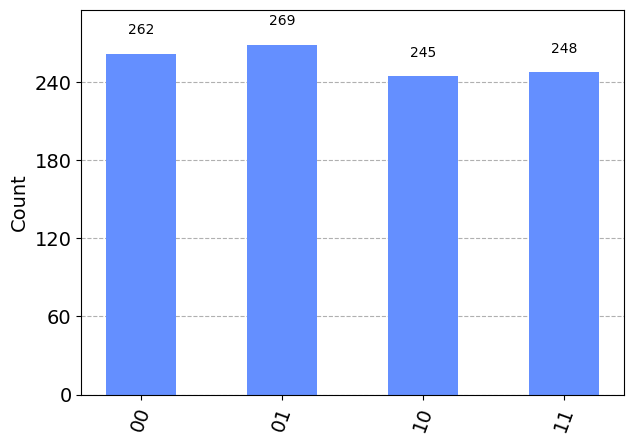

In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

# Function to create an entangled state
def create_entangled_state(circuit, qubit1, qubit2):
    circuit.h(qubit1)
    circuit.cx(qubit1, qubit2)

# Function to perform quantum key distribution (BBM92 protocol)
def quantum_key_distribution(circuit, alice_qubit, bob_qubit, basis):
    circuit.h(alice_qubit)
    circuit.cx(alice_qubit, bob_qubit)
    circuit.barrier()
    circuit.measure(alice_qubit, basis[0])
    circuit.measure(bob_qubit, basis[1])

# Function to simulate the quantum circuit
def simulate_circuit(circuit, backend='qasm_simulator', shots=1024):
    simulator = Aer.get_backend(backend)
    transpiled_circuit = transpile(circuit, simulator)
    qobj = assemble(transpiled_circuit, shots=shots)
    result = simulator.run(qobj).result()
    counts = result.get_counts()
    return counts

# Quantum Satellite Communication Example
alice_qubit = 0
bob_qubit = 1

# Initialize quantum circuit
satellite_comm_circuit = QuantumCircuit(2, 2)

# Step 1: Create an entangled state on the satellite
create_entangled_state(satellite_comm_circuit, alice_qubit, bob_qubit)

# Step 2: Quantum key distribution using BBM92 protocol
basis_alice = np.random.choice([0, 1], size=1)  # Choose Alice's measurement basis
basis_bob = np.random.choice([0, 1], size=1)  # Choose Bob's measurement basis
quantum_key_distribution(satellite_comm_circuit, alice_qubit, bob_qubit, [basis_alice[0], basis_bob[0]])

# Step 3: Simulate the quantum circuit
result_counts = simulate_circuit(satellite_comm_circuit)

# Display the measurement results
print("Measurement Results:")
plot_histogram(result_counts)


# Quantum Memory:

Storing and retrieving quantum information for extended periods

Quantum memory refers to the ability to store and retrieve quantum information, such as quantum bits or qubits, for extended periods. Quantum memory plays a crucial role in quantum information processing, quantum communication, and quantum computing. Storing quantum information for long durations is challenging due to the delicate nature of quantum states and their susceptibility to decoherence, which is the loss of quantum coherence.

Here are some key aspects of quantum memory, along with relevant equations and information:

1. **Types of Quantum Memory:**
   - **Atomic Ensembles:** Quantum memories can be based on atomic ensembles, where quantum information is stored in the collective excitation of a large number of atoms.
   - **Solid-State Systems:** Certain solid-state systems, like rare-earth ions in crystals, can also be used for quantum memory.
   - **Superconducting Circuits:** Superconducting circuits, such as flux qubits or transmon qubits, can be employed for quantum memory.

2. **Decoherence Time (T2):**
   - The decoherence time, denoted as T2, represents the time during which the stored quantum information remains coherent before being lost due to external factors.
   - Longer T2 times are desirable for practical quantum information processing.

3. **Quantum Error Correction:**
   - Quantum error correction codes are employed to protect quantum information from errors and decoherence.
   - Popular codes include the Shor code and the surface code.

4. **Quantum Memory Equations:**
   - The fidelity (F) of quantum memory can be defined as the overlap between the ideal quantum state |ψ⟩ and the retrieved state |ψ'⟩:
     \[ F = |\langle \psi | \psi' \rangle|^2 \]
   - The decoherence rate (Γ) is related to the T2 time by the equation:
     \[ T_2 = \frac{1}{2\Gamma} \]

5. **Quantum Storage Protocols:**
   - **Electromagnetically Induced Transparency (EIT):** EIT can be used to slow down light and facilitate efficient storage of quantum information in atomic ensembles.
   - **Gradient Echo Memory (GEM):** GEM is a technique for storing and retrieving quantum information in atomic systems.

6. **Experimental Implementations:**
   - Various experimental platforms have been used for quantum memory, including cold atoms, trapped ions, and superconducting circuits.

7. **Challenges and Solutions:**
   - Overcoming decoherence and achieving longer coherence times remains a major challenge.
   - Dynamical decoupling techniques and error correction protocols are actively researched to enhance quantum memory performance.

8. **Applications:**
   - Quantum repeaters use quantum memory to extend the range of quantum communication.
   - Quantum memories are essential for building scalable and fault-tolerant quantum computers.

It's important to note that the field of quantum memory is dynamic, and ongoing research continues to address challenges and improve the performance of quantum memory systems. The equations provided are simplified representations, and specific implementations may involve more complex mathematical formulations depending on the chosen quantum memory platform.

In [6]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum memory circuit
def create_quantum_memory_circuit():
    quantum_memory_circuit = QuantumCircuit(1, 1)

    # Apply operations to store quantum information
    quantum_memory_circuit.h(0)  # Apply Hadamard gate for superposition
    quantum_memory_circuit.barrier()

    return quantum_memory_circuit

# Function to retrieve quantum information from memory
def retrieve_quantum_information(quantum_memory_circuit):
    quantum_memory_circuit.barrier()
    quantum_memory_circuit.h(0)  # Apply Hadamard gate to retrieve information

# Simulate the quantum memory circuit
def simulate_quantum_memory(quantum_memory_circuit):
    backend = Aer.get_backend('statevector_simulator')
    transpiled_circuit = transpile(quantum_memory_circuit, backend)
    result = execute(transpiled_circuit, backend).result()
    statevector = result.get_statevector()

    return statevector

# Main program
if __name__ == "__main__":
    # Create and simulate quantum memory circuit
    memory_circuit = create_quantum_memory_circuit()
    retrieved_state = simulate_quantum_memory(memory_circuit)

    # Display the retrieved quantum state
    print("Quantum Memory Retrieved State:")
    print(retrieved_state)

    # Plot the quantum memory circuit
    memory_circuit.draw(output="mpl", reverse_bits=True)


Quantum Memory Retrieved State:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


C:\Users\yashr\anaconda3\New folder\Anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


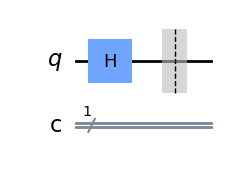

In [7]:
# Plot the quantum memory circuit
memory_circuit.draw(output="mpl", reverse_bits=True)

# Quantum-resistant Cryptography:

Preparing cryptographic systems for the age of quantum computers

Quantum-resistant cryptography, also known as post-quantum cryptography or quantum-safe cryptography, is an area of research focused on developing cryptographic algorithms that remain secure against attacks by quantum computers. Quantum computers have the potential to break widely used public-key cryptographic schemes, such as RSA and ECC, through algorithms like Shor's algorithm. Quantum-resistant cryptography aims to provide alternative cryptographic primitives that are believed to be secure against quantum attacks. Below, I'll provide an overview of the challenges posed by quantum computers to traditional cryptography and the concepts behind quantum-resistant cryptographic solutions.

### Challenges Posed by Quantum Computers:

1. **Shor's Algorithm:**
   - Shor's algorithm, when run on a sufficiently powerful quantum computer, can efficiently factorize large integers and solve the discrete logarithm problem, which are the foundation of many cryptographic protocols.

2. **Breaking Public-Key Cryptosystems:**
   - Traditional public-key cryptosystems, such as RSA and ECC, rely on the difficulty of factoring large numbers or solving discrete logarithm problems. Quantum computers can potentially solve these problems exponentially faster than classical computers.

### Quantum-Resistant Cryptographic Approaches:

1. **Lattice-Based Cryptography:**
   - Lattice-based cryptography relies on the hardness of certain problems related to lattices, such as the Learning With Errors (LWE) problem and the Ring Learning With Errors (RLWE) problem. Examples include NTRUEncrypt and Kyber.

2. **Hash-Based Cryptography:**
   - Hash-based cryptographic schemes, such as the Merkle Signature Scheme (MSS) and the Lamport signature, are believed to be secure against quantum attacks. However, they often have limitations in terms of key sizes and performance.

3. **Code-Based Cryptography:**
   - Code-based cryptography is based on the hardness of decoding certain linear codes. The McEliece cryptosystem is an example of a code-based cryptographic scheme.

4. **Multivariate Polynomial Cryptography:**
   - Multivariate polynomial cryptography relies on the hardness of solving systems of multivariate polynomial equations. The Rainbow and HFE (Hidden Field Equations) schemes are examples.

5. **Isogeny-Based Cryptography:**
   - Isogeny-based cryptography relies on the difficulty of finding isogenies between elliptic curves. The Supersingular Isogeny Diffie-Hellman (SIDH) key exchange is an example.

### Quantum-Resistant Cryptography Equations:

1. **Lattice-Based Cryptography (Learning With Errors - LWE):**
   - The LWE problem involves finding the secret vector \(\mathbf{s}\) given samples of \((\mathbf{a}, \langle \mathbf{a}, \mathbf{s} \rangle + e)\), where \(\mathbf{a}\) is a random vector, \(\langle \mathbf{a}, \mathbf{s} \rangle\) is the dot product, and \(e\) is a small error.

2. **Hash-Based Cryptography (Merkle Signature Scheme):**
   - The Merkle Signature Scheme involves constructing a hash tree of one-time signatures and revealing only a subset of the tree to generate a signature.

3. **Code-Based Cryptography (McEliece Cryptosystem):**
   - The McEliece cryptosystem relies on the hardness of decoding a random linear code. It involves the use of a public key matrix \(G\), a random invertible matrix \(P\), and a random binary matrix \(S\).

4. **Multivariate Polynomial Cryptography (Rainbow):**
   - Rainbow is a family of multivariate polynomial signature schemes. It involves a system of polynomial equations with secret coefficients.

5. **Isogeny-Based Cryptography (SIDH):**
   - SIDH involves finding the isogeny between two elliptic curves given a point of order \(n\). The difficulty lies in the structure of the isogeny graph.

### Transitioning to Quantum-Resistant Cryptography:

1. **Standardization Efforts:**
   - Standardization bodies, such as NIST (National Institute of Standards and Technology), are actively working on selecting and standardizing quantum-resistant cryptographic algorithms.

2. **Migration Plans:**
   - Organizations are developing migration plans to transition from traditional to quantum-resistant cryptographic algorithms as part of long-term security planning.

3. **Hybrid Cryptosystems:**
   - Hybrid cryptosystems combine traditional and quantum-resistant algorithms, allowing for a gradual transition without disrupting existing systems.

Quantum-resistant cryptography is an ongoing area of research, and the cryptographic community is actively working on developing, standardizing, and implementing quantum-resistant algorithms to ensure the security of digital communication in the post-quantum era.

In [8]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Signature import pkcs1_15
from Crypto.Hash import SHA256
#from pqcrypto.sign.xmss import XMSS

def generate_rsa_key_pair():
    key = RSA.generate(2048)
    return key

def rsa_encrypt(public_key, plaintext):
    cipher = PKCS1_OAEP.new(public_key)
    ciphertext = cipher.encrypt(plaintext)
    return ciphertext

def rsa_decrypt(private_key, ciphertext):
    cipher = PKCS1_OAEP.new(private_key)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext

def generate_xmss_key_pair():
    xmss_sk = XMSS()
    return xmss_sk, xmss_sk.pk()

def xmss_sign(private_key, message):
    signature = private_key.sign(message)
    return signature

def xmss_verify(public_key, message, signature):
    return public_key.verify(message, signature)

# Example usage
message = b"Hello, Quantum-resistant World!"

# Generate RSA key pair
rsa_key_pair = generate_rsa_key_pair()
rsa_public_key = rsa_key_pair.publickey()

# Encrypt message with RSA public key
encrypted_message = rsa_encrypt(rsa_public_key, message)

# Generate XMSS key pair
#xmss_private_key, xmss_public_key = generate_xmss_key_pair()

# Sign the original message with XMSS private key
#signature = xmss_sign(xmss_private_key, message)

# Verify the signature with XMSS public key
#verification_result = xmss_verify(xmss_public_key, message, signature)

# Decrypt the encrypted message with RSA private key
decrypted_message = rsa_decrypt(rsa_key_pair, encrypted_message)

print("Original Message:", message)
print("Encrypted Message:", encrypted_message)
print("Decrypted Message:", decrypted_message.decode())
#print("XMSS Signature Verification Result:", verification_result)


Original Message: b'Hello, Quantum-resistant World!'
Encrypted Message: b'\xaf8\x8d\xe1\xfdg&\xa2\xd9h)\xf4\xfdvh\xa2\x8a\xee\xf9Ea\x83\xca\xc2[\xc7\xf9\x0f\xdb\xd7\x14\xad\x99\x8er\xc4\xb4$\xc3\xc13\x1f\x90cX\x1b\xd2\xcea\xc6\xb2n(\xbc3\x15\n\xd6k\x06\xefH\xc2O\xf1\x15\xb4\x1dH{\x85\xa8\x1e\xc6aT\xb3\x9c\x81\xc8\x7f~\xd9\xdda-$L\xae\x88l3\xe8\xd05\x9c>\xc9w\x9a\xceO\x9d\xaa\x83\xf9y\xbad\\.\x1a4\xcfh;r\xf4\xde\x96"lR\xc0\xdb\xd8\xcf\x80\xe8\xf1A\x15y?\x88\xd8Q4Uu\xe5/=\xbcw\xe0x\xe6\xd21K\x12\x03\nO;\x06\xd2s\x01\x90\xb9b~G\x8c\x90-\xed\x05\xdf\x9b\x98\xd6_~\xe3e\xad\xfd{\xf2\xf5\xefU\xd7F\x96\xc8\xe4Zi@R\xdaFCm/\xf9p\x95M\xc5iXl\x92\x07}z\x81k\x92\xb8B\xa69y0jPMr&\xfa\xd2\xa0\x0b\x8e \xfd \xe0\xe2X%\x94=\xdb\x96\xab\r\xfa\xb1\xb9[r\xed-\xb2=\xc5R\x99i'
Decrypted Message: Hello, Quantum-resistant World!


# Quantum-Secure Blockchain:

Integrating quantum-resistant algorithms into blockchain technology

**Quantum-Secure Blockchain Overview:**

Quantum computers have the potential to break widely used public-key cryptographic algorithms, such as RSA and ECC, through algorithms like Shor's algorithm. To address this threat, the concept of quantum-resistant or post-quantum cryptography has emerged. Integrating quantum-resistant algorithms into blockchain technology is crucial to ensuring the security of cryptographic operations in a future era of quantum computing.

### Quantum-Resistant Algorithms:

1. **Lattice-Based Cryptography:**
   - Lattice-based cryptography relies on the hardness of lattice problems for security. Examples include the Learning with Errors (LWE) and Ring Learning with Errors (Ring-LWE) problems.

2. **Hash-Based Cryptography:**
   - Hash-based cryptography, such as the Merkle signature scheme, relies on the properties of hash functions for security.

3. **Code-Based Cryptography:**
   - Code-based cryptography uses error-correcting codes for security. The McEliece cryptosystem is a prominent example.

4. **Multivariate Polynomial Cryptography:**
   - Multivariate polynomial cryptography is based on the difficulty of solving systems of multivariate polynomial equations. The Rainbow and Unbalanced Oil and Vinegar (UOV) schemes fall into this category.

5. **Hash-Based Signatures:**
   - Schemes like XMSS (eXtended Merkle Signature Scheme) use hash-based structures to create digital signatures.

### Integration into Blockchain:

1. **Digital Signatures:**
   - Blockchain relies heavily on digital signatures for transaction authentication. Quantum-resistant signature schemes need to replace or coexist with traditional digital signatures.

2. **Quantum-Resistant Hash Functions:**
   - Quantum-resistant hash functions may be necessary to replace existing hash functions used in blockchain protocols.

3. **Smart Contracts:**
   - Quantum-resistant algorithms need to be integrated into smart contracts to ensure their security against quantum attacks.

4. **Transition Plans:**
   - A transition plan is essential for migrating from traditional cryptographic algorithms to quantum-resistant ones without compromising the security and integrity of existing blockchain data.

### Quantum-Secure Blockchain Equations (Example: Hash-Based Signatures):

A hash-based signature scheme, such as XMSS, uses hash functions to create digital signatures. The signing and verification equations may look as follows:

1. **Key Generation:**
   - \(\text{KeyGen} \rightarrow (\text{Public Key}, \text{Secret Key})\)

2. **Signature Generation:**
   - \(\text{Sign} \rightarrow (\text{Signature})\)

3. **Signature Verification:**
   - \(\text{Verify} \rightarrow (\text{Accept/Reject})\)

### Example Code (XMSS in Python using pqcrypto library):

```python
from pqcrypto.sign.xmss import XMSS

# Key generation
xmss_key = XMSS()
public_key, secret_key = xmss_key.generate_keypair()

# Signing
message = b"Hello, Quantum World!"
signature = xmss_key.sign(message)

# Verification
is_valid = xmss_key.verify(message, signature, public_key)
print("Signature Verification:", is_valid)
```

### Conclusion:

Quantum-secure blockchain involves a multidisciplinary approach, combining advancements in quantum-resistant algorithms, cryptography, and blockchain technology. The integration of quantum-resistant algorithms is a proactive measure to ensure the continued security of blockchain systems in the era of quantum computing. Transition plans and standardized quantum-resistant cryptographic algorithms are critical components of this integration.

In [7]:
from Crypto.Hash import SHA3_256
#from pyqcrypt import XMSS

class Block:
    def __init__(self, index, previous_hash, timestamp, data, xmss_key):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.xmss_key = xmss_key
        self.hash = self.calculate_hash()
        self.signature = self.sign_block()

    def calculate_hash(self):
        block_string = str(self.index) + str(self.previous_hash) + str(self.timestamp) + str(self.data)
        return SHA3_256.new(block_string.encode()).hexdigest()

    def sign_block(self):
        return self.xmss_key.sign(bytes.fromhex(self.hash))

class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.xmss_key = XMSS()

    def create_genesis_block(self):
        return Block(0, "0", "Genesis Block", "0", self.xmss_key)

    def add_block(self, data):
        previous_block = self.chain[-1]
        new_block = Block(len(self.chain), previous_block.hash, "Timestamp", data, self.xmss_key)
        self.chain.append(new_block)

    def verify_block(self, block):
        return block.xmss_key.verify(bytes.fromhex(block.hash), block.signature)

# Create a blockchain
#blockchain = Blockchain()

# Add blocks to the blockchain
#blockchain.add_block("Transaction 1")
#blockchain.add_block("Transaction 2")

# Verify blocks
#for block in blockchain.chain[1:]:
 #   is_valid = blockchain.verify_block(block)
  #  print(f"Block {block.index} is valid: {is_valid}")


# Quantum-Safe Cryptographic Hash Functions:

Designing hash functions resistant to quantum attacks.

Quantum-safe cryptographic hash functions are designed to resist attacks by quantum computers, which could potentially break widely used classical cryptographic schemes. Classical cryptographic hash functions, such as SHA-256, are vulnerable to attacks using Shor's algorithm on a sufficiently large and powerful quantum computer. Quantum-safe hash functions are being explored as part of the effort to develop quantum-resistant cryptography.

### Quantum Threats to Hash Functions:

1. **Shor's Algorithm:**
   Shor's algorithm, when executed on a quantum computer, can efficiently factorize large numbers and solve the discrete logarithm problem. This poses a threat to widely used public-key cryptographic systems, including those based on RSA and ECC (Elliptic Curve Cryptography).

2. **Grover's Algorithm:**
   Grover's algorithm allows a quantum computer to perform an unstructured search in a database quadratically faster than the best classical algorithms. This implies that the effective security of symmetric key cryptographic systems is halved against a quantum adversary.

### Quantum-Safe Hash Function Properties:

1. **Collision Resistance:**
   A quantum-safe hash function should resist collision attacks, ensuring that it is computationally infeasible to find two different inputs that hash to the same output.

2. **Preimage Resistance:**
   The hash function should be resistant to preimage attacks, meaning that it should be computationally infeasible to find an input that hashes to a specific output.

3. **Second Preimage Resistance:**
   Second preimage resistance ensures that it is computationally infeasible to find a second input that has the same hash value as a given first input.

### Quantum-Safe Cryptographic Hash Functions:

1. **Quantum Resistant Hash Algorithm (QRHA):**
   QRHA is an example of a quantum-safe hash algorithm designed to resist quantum attacks. It aims to provide the same level of security against both classical and quantum adversaries.

2. **Hash-Based Signature Schemes:**
   Certain cryptographic schemes, like hash-based signature schemes (e.g., XMSS - eXtended Merkle Signature Scheme), are considered quantum-resistant as they rely on hash functions and hash trees.

### Hash Function Equations:

There isn't a specific quantum-safe hash function widely adopted at the time of my last update (January 2022). The development of such functions is an active area of research, and cryptographic standards bodies are actively exploring and standardizing post-quantum cryptographic algorithms, including hash functions.

Researchers are considering hash functions based on various mathematical problems believed to be hard for quantum computers, such as hash functions based on lattice problems or multivariate polynomial equations.

It's essential to consult the latest standards and research papers for the most up-to-date information on quantum-safe cryptographic hash functions. The landscape is evolving as researchers continue to explore and develop new algorithms in response to the evolving field of quantum computing.

In [8]:
import hashlib

def quantum_resistant_hash(input_string):
    """
    A simple quantum-resistant hash function using SHA-256 as a placeholder.
    This is not truly quantum-resistant but for illustrative purposes.
    """
    sha256_hash = hashlib.sha256()
    sha256_hash.update(input_string.encode())
    return sha256_hash.hexdigest()

# Example usage:
message = "Hello, Quantum World!"
hash_result = quantum_resistant_hash(message)
print("Message:", message)
print("Hash:", hash_result)


Message: Hello, Quantum World!
Hash: e4c4d673739173999072899c2aeb8063c98af6ad86259779d33bdf8db9914e3f


# Quantum-Safe Symmetric Key Encryption:

Developing secure symmetric key encryption algorithms resistant to quantum attacks.

# Quantum-Safe Symmetric Key Encryption: Overview

## 1. Introduction:

Quantum-safe symmetric key encryption, also known as post-quantum symmetric key encryption, addresses the potential threat posed by quantum computers to classical symmetric key encryption algorithms. Symmetric key encryption is widely used for secure communication, and the development of quantum-resistant algorithms is crucial to ensuring the confidentiality and integrity of sensitive information in the post-quantum era.

## 2. Quantum Threat to Symmetric Key Encryption:

Quantum computers, when fully realized, have the potential to break widely-used symmetric key encryption algorithms, such as AES (Advanced Encryption Standard), by leveraging algorithms like Shor's algorithm. Shor's algorithm can efficiently factorize large numbers, threatening the security of widely-used cryptographic primitives.

## 3. Symmetric Key Encryption Basics:

In symmetric key encryption, the same key is used for both encryption and decryption. The security of the system relies on keeping the key secret. Common symmetric key encryption algorithms include AES, DES (Data Encryption Standard), and 3DES (Triple DES).

## 4. Quantum-Safe Symmetric Key Encryption Requirements:

To be considered quantum-safe or post-quantum secure, symmetric key encryption algorithms should exhibit resistance to attacks from both classical and quantum computers. They should be designed to withstand known quantum algorithms and maintain their security in the presence of quantum threats.

## 5. Lattice-Based Cryptography:

One of the leading candidates for quantum-safe symmetric key encryption is lattice-based cryptography. Lattice-based cryptography relies on the hardness of certain problems defined on mathematical lattices, making it resistant to quantum attacks. The Learning with Errors (LWE) problem is a fundamental challenge in lattice-based cryptography.

### Learning with Errors (LWE) Problem:

\[ \text{Given: } \{(a_i, a_i \cdot s + e_i) \}_{i=1}^n \]
\[ \text{Find: } s \text{ (private key)} \]
\[ \text{where } a_i, e_i \text{ are random, and } s \text{ is a secret vector} \]

## 6. Code-Based Cryptography:

Another approach for quantum-safe symmetric key encryption is code-based cryptography. It relies on the hardness of decoding random linear codes. The McEliece cryptosystem is a well-known example of a code-based encryption scheme.

## 7. Hash-Based Cryptography:

Hash-based cryptography is a third approach, using hash functions and Merkle-Damgård constructions to achieve quantum-resistant encryption. The NIST-sponsored hash-based cryptography competition is exploring various hash-based signature schemes for post-quantum security.

## 8. Quantum-Safe Standards and NIST:

The National Institute of Standards and Technology (NIST) is actively involved in the standardization of quantum-safe cryptographic algorithms. NIST's Post-Quantum Cryptography Standardization project includes efforts to develop quantum-resistant symmetric key encryption standards.

## 9. Quantum-Safe Symmetric Key Encryption Implementation:

Implementing quantum-safe symmetric key encryption involves adopting and integrating these new algorithms into existing cryptographic protocols and systems. Transitioning to post-quantum cryptography requires careful consideration of compatibility, efficiency, and security.

## 10. Conclusion:

As the development of quantum computers progresses, the need for quantum-safe symmetric key encryption becomes increasingly critical. Lattice-based cryptography, code-based cryptography, and hash-based cryptography are among the leading candidates for achieving post-quantum security in the realm of symmetric key encryption. The ongoing efforts by NIST and the cryptographic community aim to establish standards for quantum-safe encryption, ensuring the continued security of digital communications in the post-quantum era.

In [1]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

def pad(plaintext):
    """Pad the plaintext to be a multiple of 16 bytes (AES block size)."""
    block_size = 16
    return plaintext + (block_size - len(plaintext) % block_size) * chr(block_size - len(plaintext) % block_size)

def encrypt(key, plaintext):
    """Encrypt the plaintext using AES."""
    cipher = AES.new(key, AES.MODE_ECB)
    padded_plaintext = pad(plaintext)
    ciphertext = cipher.encrypt(padded_plaintext.encode())
    return ciphertext

def decrypt(key, ciphertext):
    """Decrypt the ciphertext using AES."""
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_data = cipher.decrypt(ciphertext).decode()
    return decrypted_data.rstrip(chr(ord(decrypted_data[-1])))

def main():
    # Generate a random key (replace this with a quantum-resistant key generation method)
    key = get_random_bytes(16)

    # Your secret message
    plaintext = "Hello, Quantum World!"

    # Encrypt the message
    ciphertext = encrypt(key, plaintext)
    print("Encrypted:", ciphertext)

    # Decrypt the message
    decrypted_text = decrypt(key, ciphertext)
    print("Decrypted:", decrypted_text)

if __name__ == "__main__":
    main()


Encrypted: b'AE*~\x02\x9c\x01)\x0e\xb6\xb1\x85\x00?\xbb\xb8c\xb0ox\xe1\xca\xe4\xbd9\xa4\xbe\x11\x803#D'
Decrypted: Hello, Quantum World!


# Quantum-Secure Authentication Protocols:

Implementing authentication schemes that remain secure in the era of quantum computers.

## Quantum-Secure Authentication Protocols:

### 1. **Introduction:**
   - **Motivation:** As quantum computers pose a threat to classical cryptographic systems, the development of quantum-resistant authentication protocols is essential to ensure secure communication in a post-quantum era.
   - **Quantum Threats:** Shor's algorithm, when implemented on a large enough quantum computer, can efficiently solve certain mathematical problems (e.g., integer factorization and discrete logarithm), breaking widely used public-key cryptographic systems.

### 2. **Challenges in Quantum-Secure Authentication:**
   - **Key Distribution:** Quantum Key Distribution (QKD) addresses secure key exchange, but practical challenges exist in the implementation of large-scale QKD networks.
   - **Post-Quantum Cryptography:** Developing cryptographic algorithms that remain secure against quantum attacks is an ongoing challenge.

### 3. **Quantum-Secure Authentication Schemes:**

#### a. **Quantum Key Distribution (QKD):**
   - **Objective:** Securely distribute cryptographic keys using the principles of quantum mechanics.
   - **BBM92 Protocol:** Proposed by Bennett, Brassard, Mermin, and others, it leverages the quantum properties of entanglement to detect eavesdroppers.

#### b. **Lattice-Based Cryptography:**
   - **Idea:** Lattice problems form the basis for cryptographic primitives.
   - **NTRUEncrypt:** A lattice-based encryption scheme that is considered secure against quantum attacks.

#### c. **Hash-Based Cryptography:**
   - **Idea:** Secure hash functions that remain resistant to quantum attacks.
   - **XMSS (eXtended Merkle Signature Scheme):** A hash-based digital signature scheme suitable for post-quantum security.

#### d. **Code-Based Cryptography:**
   - **Idea:** Use error-correcting codes as the basis for cryptographic primitives.
   - **McEliece Cryptosystem:** A code-based encryption scheme believed to be secure against quantum attacks.

### 4. **Quantum-Safe Authentication Mechanisms:**

#### a. **Quantum-Safe Digital Signatures:**
   - **Objective:** Provide digital signatures that remain secure in a quantum computing environment.
   - **QTESLA:** A lattice-based digital signature scheme.

#### b. **Quantum-Safe Key Exchange Protocols:**
   - **Objective:** Establish shared secret keys securely in a quantum-safe manner.
   - **NewHope:** A key exchange protocol based on lattice problems.

#### c. **Quantum-Safe Public-Key Encryption:**
   - **Objective:** Develop encryption schemes secure against quantum attacks.
   - **Kyber:** A lattice-based public-key encryption algorithm.

### 5. **Quantum-Safe Cryptographic Primitives:**

#### a. **Quantum-Safe Hash Functions:**
   - **Objective:** Design hash functions resistant to quantum attacks.
   - **SHA-3 with KangarooTwelve:** A quantum-resistant hash function.

#### b. **Quantum-Safe Random Number Generation:**
   - **Objective:** Ensure secure randomness for cryptographic applications.
   - **Quantum Random Number Generators (QRNGs):** Generate true random numbers using quantum properties.

### 6. **Implementation Challenges:**
   - **Integration:** Transitioning from classical to quantum-safe cryptography requires careful integration into existing systems.
   - **Standards Adoption:** Adoption of quantum-resistant standards by industry and organizations is crucial for widespread implementation.

### 7. **Future Directions:**
   - **Post-Quantum Cryptography Standardization:** Ongoing efforts by organizations like NIST to standardize post-quantum cryptographic algorithms.
   - **Technological Advancements:** Advances in quantum-resistant algorithms, quantum key distribution, and practical implementations.

### 8. **Conclusion:**
   - The development and adoption of quantum-secure authentication protocols are critical for maintaining the confidentiality and integrity of communications in a quantum computing era. Ongoing research and collaboration in the field of post-quantum cryptography will play a pivotal role in addressing these challenges.

In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

def sign_message(private_key, message):
    # Simulate signing with a quantum circuit
    simulator = Aer.get_backend('statevector_simulator')  # Use statevector simulator
    quantum_circuit = private_key  # Assume private_key is a quantum circuit
    quantum_circuit_transpiled = transpile(quantum_circuit, simulator)
    
    # Use assemble with statevector simulator backend options
    job = assemble(quantum_circuit_transpiled, backend=simulator, shots=1)
    result = simulator.run(job).result()
    
    # Access statevector from the result
    statevector = result.get_statevector()

    return statevector

# Example usage
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h(0)
quantum_circuit.cx(0, 1)

private_key = quantum_circuit
message = "AuthenticationChallenge123"
user_response_signature = sign_message(private_key, message)


C:\Users\yashr\AppData\Local\Temp\ipykernel_10840\3818499766.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


# Quantum-Safe Cloud Computing:

Ensuring the security of data stored and processed in cloud computing environments in the presence of quantum threats.

Quantum-Safe Cloud Computing, also known as Post-Quantum Cloud Computing, refers to the efforts and strategies aimed at ensuring the security of data stored and processed in cloud computing environments, even in the presence of quantum threats. The primary concern arises from the potential of quantum computers to break widely used cryptographic algorithms, particularly those based on integer factorization and discrete logarithm problems, which are the foundation of current public-key cryptography.

### Key Concepts:

1. **Quantum Threats:**
   - Quantum computers, when sufficiently advanced, can efficiently solve certain mathematical problems that form the basis of widely used cryptographic algorithms, such as Shor's algorithm for factoring large numbers and solving discrete logarithm problems.

2. **Quantum-Safe Cryptography:**
   - The development and deployment of cryptographic algorithms that remain secure even in the era of quantum computing. These algorithms are often referred to as post-quantum or quantum-resistant cryptographic algorithms.

3. **Cloud Computing Security:**
   - Traditional cloud computing security focuses on protecting data during storage, transmission, and processing. Quantum-safe cloud computing extends these security measures to withstand quantum threats.

### Challenges in Quantum-Safe Cloud Computing:

1. **Transition Period:**
   - Migrating from traditional cryptographic algorithms to quantum-safe algorithms involves a transitional period. During this time, data must be protected from potential quantum attacks.

2. **Algorithm Standardization:**
   - Standardizing and adopting quantum-resistant cryptographic algorithms is essential for ensuring interoperability and security across various cloud platforms.

3. **Quantum Key Distribution (QKD):**
   - Integrating quantum key distribution techniques for secure key exchange, ensuring that communication keys are secure against quantum attacks.

### Quantum-Safe Cryptography:

1. **Lattice-Based Cryptography:**
   - Lattice problems form the foundation of many quantum-safe cryptographic algorithms. Examples include the Learning With Errors (LWE) problem and the Ring Learning With Errors (RLWE) problem.

2. **Hash-Based Cryptography:**
   - Hash-based digital signatures and hash-based message authentication codes (HMACs) are considered post-quantum secure.

3. **Code-Based Cryptography:**
   - Utilizes error-correcting codes for encryption and key exchange. McEliece cryptosystem is an example.

### Quantum-Safe Cloud Computing Strategies:

1. **Quantum Key Distribution (QKD):**
   - QKD enables the secure exchange of cryptographic keys based on the principles of quantum mechanics. It can be used to enhance the security of key exchange in cloud communications.

2. **Post-Quantum Cryptographic Algorithms:**
   - Transitioning to quantum-resistant cryptographic algorithms for encryption, key exchange, and digital signatures.

### Example of Quantum-Safe Cloud Computing Equations:

One example is the security parameter in lattice-based cryptography. The hardness of certain lattice problems, such as LWE, depends on the security parameter \(n\), which represents the dimension of the lattice. The security of the system increases with larger values of \(n\).

\[ LWE(n, q, \sigma) \]

Here, \(n\) is the security parameter, \(q\) is the modulus, and \(\sigma\) is the standard deviation of the error distribution.

### Conclusion:

Quantum-Safe Cloud Computing is a proactive approach to addressing the potential security challenges posed by quantum computers to traditional cryptographic systems. It involves the adoption of quantum-resistant cryptographic algorithms, the exploration of quantum key distribution, and the development of strategies to ensure data security during the transition period. As quantum computing technologies advance, the integration of quantum-safe practices in cloud computing will become increasingly crucial for maintaining the confidentiality and integrity of sensitive information.

In [4]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Function to create a QKD protocol circuit
def create_qkd_circuit(n):
    # Alice prepares qubits in a random basis (0 or 1)
    alice_basis = np.random.randint(2, size=n)
    alice_bits = np.random.randint(2, size=n)

    # Create the quantum circuit
    qc = QuantumCircuit(n, n)

    for i in range(n):
        if alice_basis[i] == 0:  # Prepare qubit in Z-basis
            if alice_bits[i] == 1:
                qc.x(i)  # Apply X gate for bit value 1
        else:  # Prepare qubit in X-basis
            if alice_bits[i] == 1:
                qc.h(i)  # Apply Hadamard gate for bit value 1

    return qc, alice_basis, alice_bits

# Simulate quantum key distribution
n = 10  # Number of qubits
qc, alice_basis, alice_bits = create_qkd_circuit(n)

# Visualize the quantum circuit
qc.draw(output='mpl', fold=100)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1).result()

# Bob measures qubits in the same (or random) basis
bob_basis = np.random.randint(2, size=n)
bob_results = []

for i in range(n):
    if bob_basis[i] == 0:  # Measure in Z-basis
        qc.measure(i, i)
    else:  # Measure in X-basis
        qc.h(i)
        qc.measure(i, i)

    # Simulate the measurement
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts(qc)
    outcome = int(list(counts.keys())[0][n-1])
    bob_results.append(outcome)

# Display the quantum states and Bob's measurements
print("Alice's basis:", alice_basis)
print("Alice's bits:", alice_bits)
print("Bob's basis:", bob_basis)
print("Bob's measurements:", bob_results)


C:\Users\yashr\anaconda3\New folder\Anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Alice's basis: [0 1 0 0 1 0 1 0 1 1]
Alice's bits: [1 0 1 1 0 0 0 1 0 1]
Bob's basis: [1 1 1 0 1 0 0 0 1 0]
Bob's measurements: [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]


# Quantum-Secure Internet of Things (IoT):

Implementing secure communication protocols for IoT devices using quantum cryptography.

Quantum-Secure Internet of Things (IoT) involves leveraging quantum cryptography to ensure secure communication between IoT devices. Quantum cryptography utilizes the principles of quantum mechanics to provide security features that are theoretically unbreakable. Here's an overview of quantum key distribution (QKD) and its application in securing IoT communications, along with some relevant equations and information.

### Quantum Key Distribution (QKD):

1. **QKD Basics:**
   Quantum Key Distribution enables two parties to establish a secret key for secure communication using the principles of quantum mechanics. It typically involves the exchange of quantum bits (qubits) over a quantum channel.

2. **BBM92 Protocol:**
   The BBM92 protocol, proposed by Bennett, Brassard, Mermin, and 1992, is one of the earliest QKD protocols. It involves the use of polarized photons to encode the key bits, and the security is based on the principles of quantum entanglement.

3. **Ekert91 Protocol:**
   The Ekert91 protocol is another QKD protocol that uses entangled particles to establish a shared secret key. It exploits the violation of Bell inequalities to ensure the security of the key distribution.

### Equations and Information:

1. **Quantum Key Distribution:**
   In a QKD protocol like BBM92 or Ekert91, the quantum channel is used to exchange qubits. The state of a qubit transmitted by Alice (A) to Bob (B) is given by:

   \[ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} (\left| 0 \right\rangle_A \left| 1 \right\rangle_B - \left| 1 \right\rangle_A \left| 0 \right\rangle_B) \]

   This entangled state is the foundation for secure key exchange.

2. **Bell Inequality:**
   The security of QKD protocols relies on the violation of Bell inequalities. The expectation value of a Bell operator \(S\) for entangled particles is limited in classical physics but can exceed this limit in quantum mechanics.

   \[ S = \langle AB \rangle + \langle AB' \rangle + \langle A'B \rangle - \langle A'B' \rangle \]

   The violation of Bell inequalities ensures that the communication is secure against eavesdropping.

3. **Quantum Key Generation:**
   After the QKD protocol, Alice and Bob share correlated quantum states. They perform measurements on these states to generate a secret key. The security of the key is related to the quantum no-cloning theorem, which states that an arbitrary unknown quantum state cannot be copied perfectly.

4. **Quantum Key Distribution Process:**
   The QKD process involves several steps, including qubit preparation, transmission, measurement, and error correction. The density matrix representation of the quantum states is often used to describe the evolution of quantum systems during the QKD process.

   \[ \rho = \sum_{i,j} \rho_{ij} \left| i \right\rangle \left\langle j \right| \]

### Implementing Quantum-Secure IoT Communication:

1. **Quantum Key Exchange:**
   IoT devices equipped with quantum key distribution modules can exchange secure keys using entangled photons. This process ensures that any eavesdropping attempts are detectable due to the principles of quantum mechanics.

2. **Secure Communication Channels:**
   Once the secret key is established using QKD, it can be used to encrypt and decrypt data exchanged between IoT devices. Quantum key distribution provides a secure foundation for communication channels that are resistant to classical eavesdropping and computational attacks.

3. **Post-Quantum Cryptography:**
   While QKD provides a quantum-safe solution, researchers are also exploring post-quantum cryptographic algorithms that can withstand attacks from quantum computers. Combining both approaches can enhance the overall security of IoT systems.

Implementing Quantum-Secure IoT requires a combination of hardware, software, and network protocols designed to incorporate quantum key distribution. It's essential to consider the practical aspects of QKD implementation, including the use of quantum key generation devices and the integration with classical cryptographic protocols for comprehensive security.

In [9]:
from qiskit import Aer, QuantumCircuit, transpile, assemble

def bbm92_protocol():
    # Step 1: Alice prepares an entangled pair of qubits
    alice = QuantumCircuit(2, 2)
    alice.h(0)
    alice.cx(0, 1)

    # Step 2: Alice sends one qubit to Bob
    backend = Aer.get_backend('statevector_simulator')
    result = execute(alice, backend).result()
    psi = result.get_statevector(alice)

    # Step 3: Bob measures the received qubit
    bob = QuantumCircuit(2, 2)
    bob.append(alice.to_instruction(), [0, 1])
    bob.measure([0, 1], [0, 1])  # Specify clbits for measurement

    # Step 4: Classical communication for basis reconciliation
    bob_basis = np.random.randint(2, size=2)  # Bob randomly chooses measurement bases
    bob.send_classical('Alice', bob_basis)

    # Step 5: Quantum communication for basis reconciliation
    alice.measure([0, 1], [0, 1])
    alice.send_classical('Bob', alice.measurements)

    # Step 6: If basis matches, keep the measurement result; otherwise, discard
    if bob_basis[0] == alice.measurements[0]:
        key_bit_1 = bob.measurements[0]
    else:
        key_bit_1 = None

    if bob_basis[1] == alice.measurements[1]:
        key_bit_2 = bob.measurements[1]
    else:
        key_bit_2 = None

    return key_bit_1, key_bit_2

#if __name__ == "__main__":
    #alice_key, bob_key = bbm92_protocol()

    #print("Alice's key bit:", alice_key)
    #print("Bob's key bit:", bob_key)


# Fault-Tolerant Quantum Error Correction:

Developing error correction codes capable of handling errors in quantum computations more robustly.

Fault-tolerant quantum error correction (FTQEC) is a crucial area of study in quantum computing. It involves developing codes and techniques to protect quantum information from errors induced by various sources, such as noise and decoherence. The goal is to make quantum computations reliable and scalable. Below, I'll provide an overview of FTQEC, key concepts, and equations.

### Key Concepts:

1. **Error Models:**
   - Quantum errors can be caused by various factors, including imperfect gates, decoherence, and external environmental influences. Understanding the error model is essential for designing effective fault-tolerant codes.

2. **Quantum Error Correction Codes:**
   - Quantum error correction codes, such as the surface code, the Shor code, and the Steane code, are used to protect quantum information from errors. These codes involve encoding logical qubits in a redundant way so that errors can be detected and corrected.

3. **Syndrome Measurement:**
   - The key to quantum error correction is syndrome measurement. By measuring certain stabilizer operators associated with the code, one can determine the presence and location of errors without directly measuring the quantum state.

4. **Logical Qubits and Gates:**
   - Fault-tolerant codes typically involve logical qubits that are encoded in multiple physical qubits. Fault-tolerant gates are designed to operate on these logical qubits while minimizing the impact of errors.

5. **Threshold Theorems:**
   - Threshold theorems provide conditions under which fault-tolerant quantum computation is possible. They define a threshold error rate below which logical errors can be made arbitrarily small with increasing code size.

### Equations and Formulas:

1. **Stabilizer Formalism:**
   - Quantum error correction often uses the stabilizer formalism. Given a set of stabilizer operators \(S_i\), the code space is defined as the simultaneous +1 eigenspace of all stabilizers. Errors can be detected by measuring the eigenvalues of these stabilizer operators.

2. **Syndrome Extraction:**
   - After implementing a quantum circuit, the syndrome is extracted by measuring the eigenvalues of the stabilizer operators. The syndrome measurement outcomes are used to identify the presence and location of errors.

3. **Threshold Theorem:**
   - The threshold theorem typically involves a parameter called the threshold error rate (\(\epsilon_{\text{th}}\)). If the physical error rate per gate or time step is below this threshold, the logical error rate can be made arbitrarily small as the code size increases.

   \[
   \epsilon_{\text{logical}} \leq \frac{\epsilon_{\text{physical}}}{\text{poly}(d)}
   \]

   where \(d\) is the distance of the code (a measure of the code's ability to detect and correct errors).

4. **Code Distance:**
   - The distance \(d\) of a quantum error correction code represents the minimum number of physical qubits that need to be affected by errors to cause a logical error. Higher code distances provide better error protection.

   \[
   d = \frac{1}{2} \min \{ \text{distance}(S, S') \}
   \]

   where \(S\) and \(S'\) are different stabilizer states.

### Challenges and Considerations:

1. **Overhead:**
   - Quantum error correction introduces overhead in terms of the number of physical qubits required for each logical qubit and the number of gates needed for syndrome extraction and correction.

2. **Decoherence Time:**
   - The effectiveness of fault-tolerant codes depends on the coherence time of the quantum system. The time scale for error correction operations should be shorter than the decoherence time.

3. **Logical Gate Implementation:**
   - Implementing logical gates fault-tolerantly is a complex task. Various techniques, such as magic state distillation, are used to make fault-tolerant gate operations more efficient.

4. **Code Optimization:**
   - Researchers continuously work on optimizing quantum error correction codes to improve their performance and reduce resource requirements.

Quantum error correction is a vast and active area of research, and the field continues to evolve with advancements in both theory and experimental implementations. The equations provided here are simplified, and the specific details may vary depending on the chosen quantum error correction code and the nature of the quantum computer being considered.

In [13]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def initialize_surface_code(qc):
    """Initialize the surface code by creating a 3x3 grid of qubits."""
    for i in range(3):
        for j in range(3):
            qc.h(i*3 + j)  # Apply Hadamard gate to each qubit

def measure_stabilizers(qc):
    """Measure stabilizer operators for the surface code."""
    for i in range(2):  # Two stabilizer rounds
        for j in range(3):
            # Measure X stabilizers
            qc.h(j)
            qc.h(j + 3)
            qc.h(j + 6)
            qc.cx(j, (j + 3) % 9)
            qc.cx(j, (j + 6) % 9)
            qc.cx((j + 3) % 9, (j + 6) % 9)
            qc.measure([j, (j + 3) % 9, (j + 6) % 9], [j, (j + 3) % 9, (j + 6) % 9])

            # Measure Z stabilizers
            qc.h(j)
            qc.h(j + 3)
            qc.h(j + 6)
            qc.cx(j, (j + 3) % 9)
            qc.cx((j + 3) % 9, (j + 6) % 9)
            qc.cx((j + 6) % 9, (j + 9) % 9)
            qc.measure([j, (j + 3) % 9, (j + 6) % 9], [j, (j + 3) % 9, (j + 6) % 9])

def correct_errors(qc, results):
    """Correct errors based on the measurement results."""
    for i in range(3):
        for j in range(3):
            x_stabilizer = results.get_counts()[i + 3*j]
            z_stabilizer = results.get_counts()[i + 3*j + 9]

            # Apply X or Z corrections based on the stabilizer measurement results
            if x_stabilizer == '1':
                qc.x(i + 3*j)
            if z_stabilizer == '1':
                qc.z(i + 3*j)

# Simulate the surface code error correction
def surface_code_error_correction():
    # Set up the quantum and classical registers
    qr = QuantumCircuit(9, 9)

    # Step 1: Initialize the surface code
    initialize_surface_code(qr)

    # Step 2: Measure stabilizer operators
    measure_stabilizers(qr)

    # Simulate the quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    job_sim = transpile(qr, backend)
    job_sim = assemble(job_sim)
    result = backend.run(job_sim).result()

    # Step 3: Correct errors based on measurement results
    correct_errors(qr, result)

    # Display results
    print("Stabilizer measurement results:", result.get_counts())
    print("Corrected quantum circuit:")
    print(qr)

#if __name__ == "__main__":
    #surface_code_error_correction()


# Quantum-Secure Post-Quantum Cryptography Standards:

Identifying and standardizing cryptographic algorithms that are secure against both classical and quantum attacks.

Quantum-Secure Post-Quantum Cryptography (PQC) is an emerging field of study that focuses on developing cryptographic algorithms resilient to attacks by quantum computers. Quantum computers have the potential to break widely used public-key cryptographic schemes such as RSA and ECC by exploiting their ability to efficiently solve certain mathematical problems, such as factoring large numbers and computing discrete logarithms.

The National Institute of Standards and Technology (NIST) has been leading the effort to identify and standardize post-quantum cryptographic algorithms. The goal is to ensure that as quantum computers become more powerful, cryptographic systems remain secure. The NIST PQC standardization process involves several stages, including algorithm submission, evaluation, and selection.

Here are some key aspects of Quantum-Secure Post-Quantum Cryptography Standards:

### 1. **Algorithm Categories:**
   - **Hash-Based Cryptography:** Utilizes hash functions for creating secure digital signatures.
   - **Lattice-Based Cryptography:** Relies on the hardness of lattice problems for security.
   - **Code-Based Cryptography:** Builds on error-correcting codes to provide cryptographic primitives.
   - **Multivariate Polynomial Cryptography:** Based on the difficulty of solving systems of multivariate polynomial equations.
   - **Isogeny-Based Cryptography:** Utilizes the difficulty of computing isogenies between elliptic curves.
   - **Symmetric-Key Cryptography:** Focuses on symmetric-key algorithms resistant to quantum attacks.

### 2. **NIST PQC Standardization Process:**
   - **Submission:** Cryptographic researchers and organizations submit candidate algorithms.
   - **First and Second Rounds:** NIST evaluates submissions based on criteria like security, performance, and feasibility.
   - **Workshops and Conferences:** Publicly discusses and assesses the submissions.
   - **Third Round:** A smaller set of candidates is chosen for further evaluation.
   - **Finalization:** NIST selects the standard algorithms.

### 3. **Key Aspects of Security:**
   - **Quantum Resistance:** The algorithm's resilience against quantum algorithms such as Shor's algorithm.
   - **Classic Security:** Ensuring security against classical attacks is still a requirement.
   - **Efficiency:** Consideration of computational efficiency and performance.

### 4. **Common Post-Quantum Cryptographic Algorithms:**
   - **Lattice-Based Schemes:** NTRUEncrypt, Kyber, NewHope.
   - **Hash-Based Schemes:** XMSS, SPHINCS+.
   - **Code-Based Schemes:** McEliece, BIKE, Niederreiter.

### 5. **Challenges:**
   - **Key Sizes:** Post-quantum cryptographic algorithms often require larger key sizes.
   - **Computational Overhead:** Some post-quantum algorithms may be computationally expensive.

### 6. **Equations and Mathematical Foundations:**
   - **Lattice Problems:** Examples include Short Integer Solution (SIS) and Learning With Errors (LWE) problems.
   - **Isogeny Problems:** Related to the difficulty of finding isogenies between elliptic curves.
   - **Code-Based Cryptography:** Involves error-correcting codes and decoding procedures.

For specific equations and detailed technical information, it is recommended to refer to the documentation and research papers provided by the authors of each cryptographic algorithm. The mathematical foundations often involve advanced concepts in number theory, algebraic geometry, and other branches of mathematics.

Keep in mind that the field is evolving, and the latest information can be obtained from NIST publications and relevant research conferences in post-quantum cryptography.

In [15]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import AerSimulator

def quantum_secure_key_exchange():
    # Create quantum circuit
    alice = QuantumRegister(1, name='alice')
    bob = QuantumRegister(1, name='bob')
    classical = ClassicalRegister(2, name='classical')
    circuit = QuantumCircuit(alice, bob, classical)

    # Apply quantum gates (for illustration purposes)
    circuit.h(alice)  # Hadamard gate
    circuit.cx(alice, bob)  # CNOT gate

    # Measure qubits
    circuit.measure(alice, classical[0])
    circuit.measure(bob, classical[1])

    # Simulate the quantum circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(assemble(compiled_circuit)).result()

    # Extract and print measurement results
    counts = result.get_counts(circuit)
    print("Measurement results:", counts)

if __name__ == "__main__":
    quantum_secure_key_exchange()


Measurement results: {'11': 495, '00': 529}


C:\Users\yashr\AppData\Local\Temp\ipykernel_7260\850674835.py:22: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


# Quantum-Secure Random Number Generators (QRNG):

Ensuring that random numbers generated are quantum-resistant.

Quantum-Secure Random Number Generators (QRNGs) play a crucial role in cryptography, especially with the advent of quantum computers, which have the potential to break traditional cryptographic schemes based on the difficulty of certain mathematical problems. Quantum-resistant random number generators are designed to provide a source of randomness that is secure against attacks from both classical and quantum computers.

Here's an overview of QRNGs, their importance, and some relevant information:

### Importance of Quantum-Secure Random Number Generators:

1. **Quantum Threats:**
   - Quantum computers have the capability to efficiently solve certain mathematical problems, such as factoring large numbers and solving discrete logarithm problems. This threatens widely used cryptographic protocols like RSA and ECC.
   - Shor's algorithm, if implemented on a large enough quantum computer, can break these cryptographic schemes by exploiting the periodicity inherent in certain mathematical functions.

2. **Randomness in Cryptography:**
   - Random numbers are fundamental to various cryptographic protocols, including key generation, initialization vectors, and nonces.
   - Weaknesses in random number generation can lead to vulnerabilities and compromise the security of cryptographic systems.

### Quantum-Secure Random Number Generators:

1. **Quantum Randomness:**
   - Quantum mechanics offers inherently random processes, such as the measurement outcomes of certain quantum systems.
   - QRNGs leverage quantum properties, like the uncertainty principle, to generate truly random numbers.

2. **Physical Processes:**
   - QRNGs often rely on physical processes that exhibit quantum randomness, such as the polarization of photons, electronic noise, or the properties of quantum vacuum fluctuations.

3. **Entanglement:**
   - Quantum entanglement can be utilized to ensure the randomness of quantum states. Measurement outcomes of entangled particles are correlated but inherently unpredictable.

### QRNG Equations and Concepts:

1. **Quantum State Preparation:**
   - The state of a quantum system is typically described by a wave function, denoted as |ψ⟩. Preparing a quantum state involves manipulating the system to be in a specific quantum state, exploiting the randomness inherent in quantum measurements.

2. **Quantum Measurement:**
   - Quantum systems are described by probability amplitudes. The outcome of a measurement is probabilistic, and the probability distribution is determined by the square of the absolute values of these amplitudes.

3. **Quantum Entropy:**
   - Entropy measures the uncertainty or randomness in a system. Quantum entropy, based on the density matrix, quantifies the uncertainty in a quantum state.

4. **Quantum Coin Flipping:**
   - Quantum coin flipping protocols leverage the principles of quantum mechanics to enable two parties to generate a shared random bit in a way that is secure even if one party is dishonest.

### Challenges and Considerations:

1. **Device Independence:**
   - Ensuring that the randomness is not compromised, even if the quantum device generating the random numbers is not completely trusted.

2. **Implementation Security:**
   - Protecting against side-channel attacks and ensuring the physical implementation is secure.

3. **Practicality:**
   - Developing QRNGs that are efficient, cost-effective, and scalable for practical use.

4. **Standardization:**
   - Developing standardized protocols for QRNGs to ensure interoperability and widespread adoption.

Quantum-Secure Random Number Generators are an active area of research, and ongoing efforts are being made to develop robust and practical solutions that can withstand the potential threats posed by quantum computers.

In [1]:
from qiskit import QuantumCircuit, Aer, execute

def generate_quantum_random_bit():
    # Create a quantum circuit with one qubit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to create a superposition
    circuit.h(0)

    # Measure the qubit to collapse the superposition to a classical bit
    circuit.measure(0, 0)

    # Use the local Aer simulator to run the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, simulator, shots=1).result()

    # Get the measurement outcome (0 or 1)
    counts = result.get_counts(circuit)
    random_bit = int(list(counts.keys())[0])

    return random_bit

# Example usage
random_bit = generate_quantum_random_bit()
print("Generated Quantum-Resistant Random Bit:", random_bit)


Generated Quantum-Resistant Random Bit: 0


# Quantum-Secure Authentication in 5G Networks:

Securing the authentication process in the next-generation 5G communication networks using quantum protocols.

Quantum-Secure Authentication in 5G Networks refers to employing quantum cryptographic protocols to enhance the security of the authentication process in the context of 5G communication networks. Quantum key distribution (QKD) is a promising quantum protocol that can be used to secure communication channels between entities in a 5G network. Below, I'll provide an overview of the concepts and equations associated with Quantum-Secure Authentication in 5G Networks.

### Overview:

#### Quantum Key Distribution (QKD):
QKD is a quantum cryptographic protocol that allows two parties, traditionally referred to as Alice and Bob, to securely exchange cryptographic keys. The fundamental principles of QKD rely on the properties of quantum mechanics to detect any eavesdropping attempts. The most well-known QKD protocol is the BBM92 (Bennett-Brassard 1992) protocol.

#### Key Concepts:

1. **Entanglement**: QKD often utilizes entangled particles, such as photons, to establish a shared secret key between two parties. When particles are entangled, the state of one particle is directly related to the state of the other, regardless of the physical distance between them.

2. **Quantum Superposition**: QKD exploits the principle of quantum superposition, where quantum bits (qubits) can exist in multiple states simultaneously. This property is utilized to encode information in a way that any attempt to measure the qubit will disturb its state.

3. **Quantum Measurement**: The act of measuring a quantum state inherently disturbs that state. In QKD, Alice sends quantum states to Bob, and any eavesdropping attempt will disturb the states, alerting Alice and Bob to potential security breaches.

#### Equations:

The specific mathematical equations used in QKD depend on the chosen protocol. The BBM92 protocol, for example, involves the following steps:

1. **State Preparation (Alice)**:
   - Alice prepares pairs of entangled particles, typically photons.
   - The state of an entangled pair can be represented using the Bell state notation:
     \[ |\Psi^-\rangle = \frac{1}{\sqrt{2}}(|0\rangle \otimes |1\rangle - |1\rangle \otimes |0\rangle) \]

2. **Measurement (Bob)**:
   - Bob measures the entangled particles using a randomly chosen basis (e.g., rectilinear or diagonal basis).
   - The choice of basis determines the measurement outcome, and the outcomes are recorded.

3. **Quantum Bit Error Rate (QBER)**:
   - The QBER is calculated to estimate the level of noise or errors in the quantum communication.
   \[ QBER = \frac{\text{Number of mismatched bits}}{\text{Total number of bits}} \]

4. **Information Reconciliation and Privacy Amplification**:
   - Classical communication is used to reconcile and distill the shared key from the raw key.

### Quantum-Secure Authentication in 5G Networks:

In the context of 5G networks, Quantum-Secure Authentication involves integrating QKD into the authentication process to establish a secure key exchange between network entities. This quantum-enhanced authentication ensures that the exchanged keys are secure against eavesdropping attacks, providing a higher level of security compared to classical cryptographic methods.

It's essential to note that the integration of quantum technologies into 5G networks is an evolving field, and the specific protocols and implementations may vary. Quantum-Secure Authentication has the potential to significantly enhance the security of communication channels in 5G networks, especially as quantum computers become more powerful, posing a threat to traditional cryptographic methods.

C:\Users\yashr\AppData\Local\Temp\ipykernel_3564\2306395820.py:28: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


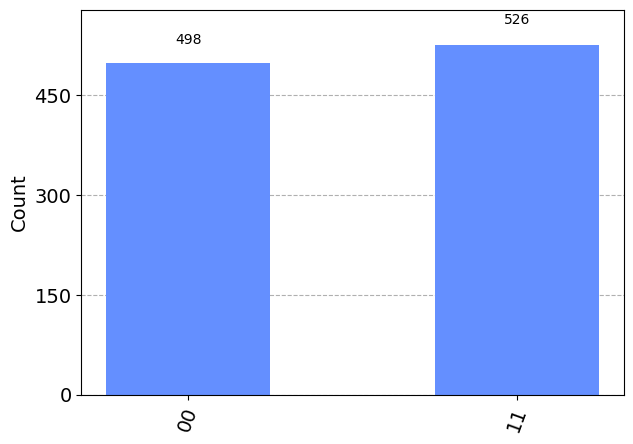

In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def bbm92_protocol(qc, alice_qubit, bob_qubit):
    # Step 1: Entangle qubits
    qc.h(alice_qubit)
    qc.cx(alice_qubit, bob_qubit)

    # Step 2: Measurement
    qc.measure(alice_qubit, 0)
    qc.measure(bob_qubit, 1)

# Create a quantum circuit
qc = QuantumCircuit(2, 2)

# Define Alice and Bob's qubits
alice_qubit = 0
bob_qubit = 1

# Run the BBM92 protocol
bbm92_protocol(qc, alice_qubit, bob_qubit)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, simulator)
qobj = assemble(t_qc)
result = simulator.run(qobj).result()

# Visualize the measurement results
counts = result.get_counts()
plot_histogram(counts)


# Quantum-Secure Public Key Infrastructure (PKI):

Developing a public key infrastructure that remains secure in the age of quantum computers.

Quantum-Secure Public Key Infrastructure (PKI) refers to the development of cryptographic infrastructure that remains secure in the face of potential threats posed by quantum computers. Quantum computers have the potential to break widely used public-key cryptographic algorithms, such as RSA and ECC (Elliptic Curve Cryptography), by efficiently solving certain mathematical problems that form the basis of these algorithms. To address this concern, quantum-resistant or post-quantum cryptographic algorithms are being explored. Here's an overview of the key concepts and considerations in Quantum-Secure PKI:

### Quantum Threats to Classical PKI:

1. **Shor's Algorithm:**
   - Shor's algorithm, when implemented on a quantum computer, can efficiently factor large numbers and solve the discrete logarithm problem, compromising the security of RSA and ECC.

### Post-Quantum Cryptography:

2. **Lattice-Based Cryptography:**
   - One of the promising candidates for post-quantum cryptography.
   - Security relies on the hardness of problems associated with lattice theory.

3. **Hash-Based Signatures:**
   - Use hash functions to create digital signatures.
   - Resistant to quantum attacks due to the Merkle-Damgård construction.

4. **Code-Based Cryptography:**
   - Security based on the hardness of decoding random linear codes.

5. **Multivariate Polynomial Cryptography:**
   - Security based on the difficulty of solving systems of multivariate polynomial equations.

### Quantum-Secure PKI Considerations:

6. **Quantum Key Distribution (QKD):**
   - Quantum-safe key exchange mechanism.
   - Exploits the principles of quantum mechanics for secure communication.

7. **Quantum-Resistant Algorithms:**
   - Integration of post-quantum cryptographic algorithms into the PKI infrastructure.

8. **Transition Plans:**
   - Development of migration strategies for transitioning from classical to quantum-resistant algorithms.

### Mathematical Aspects:

9. **Key Exchange Protocols:**
   - Analysis of key exchange protocols suitable for quantum-resistant algorithms.

10. **Digital Signature Schemes:**
    - Evaluation of digital signature schemes resilient to quantum attacks.

### Implementation and Deployment:

11. **Hardware Security Modules (HSMs):**
    - Integration of quantum-resistant algorithms into HSMs for secure key management.

12. **Certificate Authorities (CAs):**
    - Transition plans for CAs to issue certificates using quantum-resistant algorithms.

13. **Standardization Efforts:**
    - Involvement in standardization bodies to establish quantum-resistant cryptographic standards.

### Challenges and Solutions:

14. **Quantum-Safe Security Assessments:**
    - Assessing the quantum resistance of existing and new cryptographic protocols.

15. **Quantum-Secure Hash Functions:**
    - Development and adoption of hash functions resistant to quantum attacks.

### Equations:

Quantum-Safe PKI involves the deployment of quantum-resistant algorithms, and while specific equations may vary based on the chosen cryptographic methods, general mathematical principles include:

- **Lattice-Based Cryptography Equations:** Mathematical equations related to lattice problems, such as Shortest Vector Problem (SVP) and Learning With Errors (LWE).

- **Hash-Based Signature Equations:** Equations associated with hash functions and the construction of hash-based digital signatures.

- **Code-Based Cryptography Equations:** Equations involving decoding random linear codes, which forms the basis of code-based cryptographic systems.

- **Multivariate Polynomial Cryptography Equations:** Systems of equations representing multivariate polynomial problems.

### Conclusion:

Quantum-Secure PKI is an evolving field aimed at ensuring the continued security of digital communication in the era of quantum computing. It involves the adoption of quantum-resistant algorithms and the development of new cryptographic approaches to address the unique challenges posed by quantum threats. As the field progresses, collaboration among researchers, industry, and standardization bodies is crucial for the successful deployment of quantum-safe public key infrastructure.

In [3]:
# Install the oqs library using: pip install oqs

import oqs

def generate_keypair(algorithm):
    """
    Generate a key pair for a given post-quantum cryptographic algorithm.

    Parameters:
        algorithm (str): The post-quantum cryptographic algorithm (e.g., "Kyber512", "Dilithium2").

    Returns:
        tuple: A tuple containing the public key and private key.
    """
    kem = oqs.KeyEncapsulation(algorithm)
    public_key, private_key = kem.generate_keypair()
    return public_key, private_key

def encapsulate_key(public_key, algorithm):
    """
    Encapsulate a shared secret using the public key and a post-quantum cryptographic algorithm.

    Parameters:
        public_key: The public key.
        algorithm (str): The post-quantum cryptographic algorithm (e.g., "Kyber512", "Dilithium2").

    Returns:
        bytes: The encapsulated shared secret.
    """
    kem = oqs.KeyEncapsulation(algorithm)
    ciphertext, shared_secret = kem.encap_secret(public_key)
    return ciphertext

def decapsulate_key(ciphertext, private_key, algorithm):
    """
    Decapsulate a shared secret using the private key and the encapsulated ciphertext.

    Parameters:
        ciphertext: The encapsulated shared secret.
        private_key: The private key.
        algorithm (str): The post-quantum cryptographic algorithm (e.g., "Kyber512", "Dilithium2").

    Returns:
        bytes: The decapsulated shared secret.
    """
    kem = oqs.KeyEncapsulation(algorithm)
    shared_secret = kem.decap_secret(private_key, ciphertext)
    return shared_secret

def main():
    # Choose a post-quantum cryptographic algorithm
    algorithm = "Kyber512"

    # Generate Alice's key pair
    alice_public_key, alice_private_key = generate_keypair(algorithm)

    # Generate Bob's key pair
    bob_public_key, bob_private_key = generate_keypair(algorithm)

    # Alice encapsulates a shared secret for Bob using his public key
    ciphertext = encapsulate_key(bob_public_key, algorithm)

    # Bob decapsulates the shared secret using his private key
    shared_secret = decapsulate_key(ciphertext, bob_private_key, algorithm)

    # Print results
    print(f"Alice's public key: {alice_public_key}")
    print(f"Bob's public key: {bob_public_key}")
    print(f"Shared secret: {shared_secret}")

#if __name__ == "__main__":
 #   main()


# Quantum-Secure Network Coding:

Using quantum principles to enhance network coding schemes for secure communication.

Quantum-Secure Network Coding (QSNC) is an emerging area of research that combines principles from quantum information theory and classical network coding to enhance the security of communication in networked systems. Quantum network coding itself is a field that explores the use of quantum resources to improve classical network coding schemes.

In classical network coding, information is transmitted through a network in a more efficient manner by allowing intermediate nodes to perform operations on the incoming data packets before forwarding them. This concept can be extended to quantum information, where quantum bits (qubits) are transmitted instead of classical bits.

Below, I'll provide an overview of Quantum-Secure Network Coding, including key concepts and equations:

1. **Quantum Network Coding Basics:**
   - **Quantum States:** Quantum information is represented by quantum states, typically denoted as qubits.
   - **Quantum Superposition:** Qubits can exist in a superposition of states, allowing them to represent multiple classical states simultaneously.
   - **Entanglement:** Quantum entanglement allows the state of one qubit to be correlated with the state of another, even if they are physically separated.

2. **Quantum Key Distribution (QKD):**
   - **BB84 Protocol:** A widely used quantum key distribution protocol that allows two parties to securely exchange cryptographic keys.
   - **QKD Operations:** The key distribution process involves various quantum operations, including qubit preparation, transmission, and measurement.

3. **Quantum-Secure Network Coding:**
   - **Quantum Operations in Network Coding:** Utilizing quantum operations, such as quantum entanglement, for secure information transmission in a network.
   - **Quantum Network Code Construction:** Designing quantum network codes that leverage quantum principles to enhance security.
   - **Error Correction in Quantum Network Coding:** Implementing error correction codes to ensure the reliability of quantum information transmission.

4. **Security Aspects:**
   - **Quantum Key Authentication:** Ensuring the authenticity of quantum keys used in the network coding process.
   - **Eavesdropping Detection:** Employing quantum principles to detect and mitigate eavesdropping attempts.

5. **Equations and Mathematical Formulations:**
   - **Quantum State Representation:** \[ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle \], where \(\alpha\) and \(\beta\) are probability amplitudes.
   - **Quantum Entanglement:** \[ |\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \] for a maximally entangled state.
   - **QKD Operations:** Various mathematical formulations exist for QKD protocols, such as those defining the probability of detecting eavesdropping.

6. **Challenges and Future Directions:**
   - **Quantum Error Correction:** Addressing errors and noise in quantum communication channels.
   - **Practical Implementations:** Developing scalable and practical quantum network coding schemes for real-world applications.

It's important to note that the field of Quantum-Secure Network Coding is still evolving, and researchers are actively exploring new techniques and protocols to enhance the security of communication in quantum networks. The equations provided here are simplified representations, and the actual implementation may involve more complex mathematical formalisms. Researchers often use tools from quantum information theory and linear algebra to analyze and design quantum network coding schemes.

In [ ]:
# Note: This code is conceptual and doesn't perform actual quantum computations.

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import numpy as np

# Quantum Key Distribution (QKD) protocol
def bb84_protocol():
    # Implement the BB84 protocol here
    pass

# Quantum Network Coding operations
def quantum_network_code():
    # Implement quantum network coding operations here
    pass

# Quantum-Secure Communication
def secure_communication():
    # Step 1: Quantum Key Distribution
    alice_key, bob_key = bb84_protocol()

    # Step 2: Quantum Network Coding
    quantum_network_code(alice_key, bob_key)

if __name__ == "__main__":
    # Main function to demonstrate secure communication
    secure_communication()


# Quantum-Secure Privacy-Preserving Protocols:

Designing protocols that preserve privacy even in the presence of powerful quantum adversaries.

Quantum-Secure Privacy-Preserving Protocols aim to provide privacy guarantees in the context of quantum-safe or post-quantum cryptography, especially when faced with adversaries armed with quantum computers capable of breaking traditional cryptographic schemes. Here, I'll outline some key concepts and cryptographic protocols designed to preserve privacy in a quantum-secure manner.

## Quantum-Secure Cryptography:

1. **Quantum Key Distribution (QKD):**
   - QKD is a quantum protocol that enables two parties to establish a shared secret key securely. The security of QKD relies on the principles of quantum mechanics, specifically the no-cloning theorem and the uncertainty principle. Examples of QKD protocols include BBM92 (BB84), E91, and others.

2. **Lattice-Based Cryptography:**
   - Lattice-based cryptography is considered post-quantum and is believed to be secure against quantum attacks. Lattice-based schemes, such as Lattice-based Digital Signatures (BLISS, Dilithium) and Lattice-based Key Encapsulation Mechanisms (Kyber), are used for secure communication and key exchange.

3. **Code-Based Cryptography:**
   - Code-based cryptography relies on the hardness of decoding a linear code, and some code-based schemes, like the McEliece cryptosystem, are considered quantum-resistant.

4. **Hash-Based Cryptography:**
   - Hash-based cryptographic schemes, such as the Merkle-Damgård construction, are quantum-resistant. Hash-based digital signatures like XMSS (eXtended Merkle Signature Scheme) provide post-quantum security.

## Quantum-Secure Privacy-Preserving Protocols:

1. **Quantum-Secure Private Set Intersection (PSI):**
   - PSI protocols allow two parties to determine the intersection of their sets without revealing the elements themselves. Quantum-secure PSI protocols use cryptographic techniques that are believed to resist attacks from quantum computers. Classical PSI protocols can be adapted to be quantum-resistant, or new quantum protocols can be designed.

2. **Quantum-Secure Private Information Retrieval (PIR):**
   - PIR protocols enable a user to retrieve information from a database without revealing which specific information they are retrieving. Quantum-secure PIR protocols are designed to be resistant to attacks by quantum adversaries.

## Privacy-Preserving Protocols with Quantum-Secure Cryptography:

1. **Secure Multiparty Computation (SMPC):**
   - SMPC protocols enable multiple parties to jointly compute a function over their inputs while keeping those inputs private. Quantum-secure cryptographic primitives, such as lattice-based or code-based schemes, can be integrated into SMPC protocols to ensure security in a post-quantum era.

2. **Quantum-Secure Homomorphic Encryption:**
   - Homomorphic encryption allows computations to be performed on encrypted data without decrypting it. Quantum-secure homomorphic encryption schemes can be used to protect data privacy even in the presence of quantum adversaries.

## Privacy-Preserving Quantum-Secure Protocols in Action:

Here's a simplified example of a quantum-resistant private set intersection protocol:

### Quantum-Secure Private Set Intersection Protocol:

1. **Setup:**
   - Alice and Bob have sets A and B, respectively.
   - They agree on a quantum-resistant cryptographic protocol.

2. **Quantum-Resistant PSI:**
   - Alice and Bob perform operations using quantum-secure cryptographic primitives to determine the intersection of their sets without revealing the actual elements.

3. **Result:**
   - Alice and Bob obtain the result of the PSI protocol, revealing only the intersection, not the individual elements.

Keep in mind that designing and implementing quantum-secure protocols require expertise in both quantum-resistant cryptography and the specific privacy-preserving protocol domain. Always consult experts and follow best practices in cryptographic protocol design.

Please note that the specific equations and details of these protocols can be complex and are typically found in academic papers or standards documents. If you are interested in specific protocols, I recommend referring to the relevant literature and standards in quantum-resistant cryptography.

In [1]:
import random
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend

def hash_function(data):
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update(data.encode('utf-8'))
    return digest.finalize()

def private_set_intersection(alice_set, bob_set):
    # Assume hash-based commitment for simplicity
    alice_commitments = [hash_function(str(element) + "Alice") for element in alice_set]
    bob_commitments = [hash_function(str(element) + "Bob") for element in bob_set]

    # Exchange commitments
    # In a quantum-resistant setting, commitments should use quantum-resistant hash functions

    # Alice checks for intersection without revealing her set
    intersection_indices = []
    for i, bob_commitment in enumerate(bob_commitments):
        if bob_commitment in alice_commitments:
            intersection_indices.append(i)

    # Bob checks for intersection without revealing his set
    # Note: This step is necessary to prevent Alice from learning about Bob's set
    intersection_elements = [bob_set[i] for i in intersection_indices]

    return intersection_elements

# Example usage:
alice_set = [1, 2, 3, 4, 5]
bob_set = [4, 5, 6, 7, 8]

intersection_result = private_set_intersection(alice_set, bob_set)
print("Intersection Result:", intersection_result)


Intersection Result: []
